# Machine Learning Project: Assessment 2




#### Your Student ID:  20231072




## 1. Aims, objectives and plan

### a) Aims and objectives (4 marks)

Primary Aim:

Develop and compare two fundamentally different machine learning approaches, namely Bayesian Networks and Logistic Regression to predict student self-correction outcomes in AI-tutored mathematics dialogues, whilst identifying the key pedagogical features that drive success. 

Specific Objectives:

1. Model Development & Comparison: Implement both a probabilistic graphical model (Bayesian Network) to explore the relationship between features, and a linear (Logistic Regression), comparing their predictive accuracy, interpretability, computational efficiency, and suitability for educational deployment.

2. Feature analysis: Identify which pedagogical characteristics (confusion levels, engagement patterns, teacher intervention strategies, dialogue efficiency) most strongly predict student self-correction ability, using both correlation analysis and model-derived importance metrics.

3. Actionable Insights: Translate technical findings into practical recommendations for AI tutoring system design, informing intervention timing, dialogue strategy, and student support allocation.

Success Criteria:

- Accuracy - achieve 70% accuracy on held-out test data (595 dialogues)

- T Achieve F1-score >0.50 across all outcome classes (Yes/With_Hints/No) on held-out test data (595 dialogues), this ensures the model has learned significant predictive patterns from the features and is not just guessing (0.33)
- Methodological: Demonstrate over fitting prevention through convergent learning curves and stable cross-validation performance; Comparative: Provide evidence-based recommendation between models considering accuracy, interpretability, and deployment constraints; Interpretability: Identify 5-7 critical features with clear pedagogical meaning and actionable implications

Expected Outcomes:

A validated framework demonstrating whether pedagogical relationships require complex probabilistic modelling (favouring Bayesian Networks) or can be captured through simpler linear model (favouring Logistic Regression), with clear guidance for educational technology practitioners on model selection priorities.


###  b) Plan (2 marks)


### Timeline and Milestones

| Phase | Timeline | ML Methodology | Milestones |
|-------|----------|----------------|--------------|
| Phase 1: Data Exploration & Feature Engineering | Week 1 | - Exploratory data analysis<br>- Feature extraction from dialogues<br>- Feature validation and selection<br>- Initial data quality assessment | - 12 engineered features<br>- Feature importance analysis<br>- Data quality report |
| Phase 2: Baseline & Data Preparation | Week 2 | - Handle class imbalance (SMOTE)<br>- Data scaling and normalisation<br>- Train/test split validation<br>- Establish baseline metrics | - Preprocessed datasets<br>- Baseline performance metrics<br>- Class distribution analysis |
| Phase 3: Bayesian Network Development | Week 3 | - Network structure design<br>- Parameter learning<br>- Hyperparameter tuning<br>- Cross-validation | - optimised BN model<br>- Network visualisation<br>- Performance metrics |
| Phase 4: Logistic Regression Development | Week 4 | - Model training with multiple configurations<br>- Regularization tuning (L1/L2)<br>- Hyperparameter optimisation<br>- Cross-validation | - optimised LR model<br>- Feature coefficients analysis<br>- Performance metrics |
| Phase 5: Model Comparison & analysis | Week 5 | - Performance comparison<br>- Interpretability assessment<br>- Statistical significance testing<br>- Error analysis | - Comprehensive comparison report<br>- visualisations<br>- Recommendations |
| Phase 6: Documentation & Reporting | Week 6 | - Final documentation<br>- Result interpretation<br>- Practical recommendations<br>- Code review and cleanup | - Final report<br>- Presentation materials<br>- Reproducible codebase |


<!-- | Risk Category | Potential Issue | Probability | Impact | Contingency Plan (If Risk Materializes) |
|---------------|----------------|-------------|--------|----------------------------------------|
| **Data Quality** | MathDial dataset may contain inconsistencies, missing dialogue elements, or annotation errors. | Medium | High | **Plan A:** Implement robust imputation (forward-fill for missing turns, mode imputation for categorical). **Plan B:** If >15% data corrupted, reduce feature set to 5 most robust features (turn counts, question marks—directly observable). 
| **Feature Validity** | Computational features may not align with what pedagogy experts perceive as effective teaching practice. | High | Critical | **Plan A:** Validate against MathDial's human annotations using Pearson correlation (threshold r>0.3). **Plan B:** If <3 features validate, pivot to purely objective metrics (turn counts, response lengths, temporal patterns). 
| **Technical Complexity** | Bayesian Network implementation could prove more difficult than expected with hierarchical structures. | Medium | High | **Plan A:** Simplify to Naive Bayes (star structure: all features → outcome, no inter-feature dependencies). **Plan B:** If discretization fails, use Gaussian BN for continuous features with linear assumptions. 
| **Class Imbalance** | SMOTE may fail to balance classes or introduce unrealistic synthetic training samples. | Medium | Medium | **Plan A:** Switch to ADASYN (Adaptive Synthetic Sampling) which generates more samples for harder-to-learn minority regions. **Plan B:** Apply class weights in Logistic Regression (inverse frequency: {0:0.4, 1:2.3, 2:2.8}). 
| **Model Performance** | Models may fail to achieve sufficient accuracy for actionable pedagogical insights. | Medium | High | **Plan A:** Hyperparameter optimisation via Bayesian optimisation (Tree-Parzen Estimator) instead of Grid Search for efficiency. **Plan B:** Feature interaction engineering: add polynomial features (confusion × engagement) to capture non-linear effects.  -->


| Risk Category | Potential Issue | Impact | Contingency Plan |
|---------------|----------------|--------|------------------|
| Data Quality | MathDial dataset may contain inconsistencies, missing dialogue elements, or annotation errors. | High | Plan A: Build validation pipeline to detect anomalies (zero-turn dialogues, missing fields).<br>Plan B: If >5% corrupted, use only 5 robust features (turn counts, question marks, response lengths). |
| Feature Validity | Computational features may not align with what pedagogy experts perceive as effective teaching practice. | Critical | Plan A: Three-stage validation: (1) ANOVA test (p<0.05), (2) Check multicollinearity (\|r\|>0.95), (3) Random Forest ranking. Drop failing features.<br>Plan B: If <5 features pass, use objective metrics only (turn counts, response lengths, temporal patterns). |
| Technical Complexity | Bayesian Network implementation could prove more difficult than expected with hierarchical structures. | High | Plan A: If BN fails, inspect conditional probability tables CPD and inference errors. Run hyperparameter grid search with 3-fold stratified CV.<br>Plan B: If structure too complex, simplify to Naive Bayes (all features predict outcome independently). |
| Class Imbalance | SMOTE may fail to balance classes or introduce unrealistic synthetic training samples. | Medium | Plan A: Use SMOTE with k_neighbors tuning (k=3,5,7). Validate by checking correlations and visualising distributions.<br>Plan B: If synthetic samples unrealistic, switch to class weights. |
| Model Performance | Models may fail to achieve sufficient accuracy for actionable pedagogical insights. | High | Plan A: If accuracy <50%, optimise hyperparameters using Bayesian optimisation. Create interaction features (confusion × engagement) for non-linear effects.<br>Plan B: If F1 <0.35, switch to binary classification (Success vs. Not-Success) or predict only when confidence >0.7. |

## 2. Understanding the case study

Key Dataset Findings & Innovative Solutions: 

1. Severe Three-Class Imbalance (75.4% Success / 13.4% Hints / 11.2% Failed)
Dataset exhibits extreme class imbalance where standard ML algorithms will bias toward majority class, achieving superficial accuracy while failing to identify struggling students. 

    Solution: Implement SMOTE (Synthetic Minority Over-sampling) generating synthetic examples via k-nearest-neighbour interpolation. This approach is critical for Bayesian Networks, which learn P(outcome|features) from observed frequencies—class weights cannot create the training samples BNs require for reliable conditional probability tables. Target: balanced 33.3% representation while validating synthetic data maintains realistic feature correlations. 

2. Speaker Identification Inconsistency
MathDial uses student names ("Steven:", "Nancy:") rather than generic "Student:" labels, risking parser failures that would corrupt all engagement-related features. 

    Solution: Implement adaptive speaker classification (any non-"Teacher:" prefix → Student) with validation checks flagging zero-turn dialogues as data quality errors. 

3. Question-Level Data Leakage Risk
Question IDs (qid) repeat across multiple dialogue scenarios, enabling models to memorize problem types rather than learn pedagogical patterns. 

    Solution: use MathDial's QID-stratified split ensuring zero question overlap between train/test sets, mirroring real-world deployment on novel problems. 

4. Unstructured Text Requiring Feature Engineering Qualitative dialogue lacks quantitative features for statistical learning. 

    Solution: Engineer interpretable features validated through three-stage methodology: (1) ANOVA significance (p<0.05), (2) multicollinearity screening (|r|<0.95), (3) Random Forest importance ranking. Drop features failing any criterion to balance predictive power with pedagogical interpretability. 

5. Dual Interpretability Requirements
Educational stakeholders need both causal understanding (why interventions work) and predictive accuracy (which students need help). 

    Solution: Implement complementary architectures—Bayesian Networks for causal transparency and Logistic Regression for discriminative performance.

## 3. Dataset description (8 marks)

The MathDial dataset (Macina et al., 2023) contains nearly 2848 one-to-one tutoring conversations in which expert human teachers guide a simulated “student” through grade-school mathematics word problems from the GSM8k benchmark (Cobbe et al., 2021). In each dialogue, the student role is played by a large language model (LLM) prompted to exhibit realistic grade 7-level misconceptions and errors. Teachers respond as they would in authentic classroom settings, employing a variety of pedagogical strategies rather than simply supplying answers. All dialogues are annotated with teaching strategies (“teacher moves”) and learning outcomes, providing rich supervision for research into AI tutoring and pedagogy. The dataset is designed to benchmark and improve the pedagogical abilities of AI tutors and facilitate research into effective teaching interventions.


Dataset Structure:
- Training set: 2,253 dialogues (78.8%)
- Test set: 595 dialogues (20.8%)
- Dropped: 13 incomplete dialogues (0.4%)
- Question IDs (qids): 1,856 unique math problems, each appearing across multiple pedagogical scenarios and student profiles (preventing data leakage via question memorization)

Class Distribution (3-way classification):
- "Yes" (Full self-correction): 75.4% (1,698 training, 448 test)
- "With_Hints" (Partial success): 13.4% (302 training, 79 test)
- "No" (Failure to self-correct): 11.2% (253 training, 68 test)

This severe 7:1 imbalance ratio creates significant modelling challenges, as standard algorithms default to majority-class predictions. 


Preprocessing Pipeline:
- Missing Value Removal: 
Dropped 13 incomplete dialogues (0.45% of original data) containing NA values in critical fields (conversation text, outcome labels), ensuring 100% data completeness post-cleaning. Minimal data loss validated this approach over imputation.; Feature Engineering: 
Extracted 12 numerical pedagogical features from unstructured text using linguistic analysis (message lengths, turn counts), keyword matching (confusion severity), and composite metrics (engagement scores, intervention rates)—transforming qualitative dialogues into quantitative ML-ready features; Class Balancing: 
Applied SMOTE (k_neighbors=5) to training set, generating synthetic minority-class examples via k-NN interpolation, achieving balanced 33.3% representation per class while preserving test set integrity for honest generalisation estimates; No Feature Scaling: 
Deliberately retained natural scales (no StandardScaler normalisation) as Bayesian Networks discretize features (erasing scale information) and Logistic Regression converges stably with comparable-magnitude features (0-10 range), while maintaining educator interpretability


In [1]:

# Import Libraries
import pandas as pd
import numpy as np
import re
from collections import Counter

# Vis
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             f1_score, precision_recall_fscore_support, roc_auc_score,
                             roc_curve)
from sklearn.feature_selection import mutual_info_classif  # For BN feature importance

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# Bayesian Networks
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.inference import VariableElimination

# report computational efficiency
import time
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the JSONL file into a pandas DataFrame
file_path_train = 'mathdial_repo/data/train.jsonl'
file_path_test = 'mathdial_repo/data/test.jsonl'

data_train = pd.read_json(file_path_train, lines=True) 
data_test = pd.read_json(file_path_test, lines=True)

print(f"Train: {data_train.shape}, Test: {data_test.shape}")

Train: (2262, 11), Test: (599, 11)


In [3]:
#list na rows
na_rows_train = data_train[data_train.isna().any(axis=1)]
na_rows_test = data_test[data_test.isna().any(axis=1)]

na_rows_test


,qid,scenario,question,ground_truth,student_incorrect_solution,student_profile,teacher_described_confusion,self-correctness,self-typical-confusion,self-typical-interactions,conversation
227,5000056,1,A shady restaurant is charging customers gratu...,The total bill before taxes or gratuities was ...,The total cost of food and drinks before taxes...,Rishi is a 7th grade student. He has problem w...,None,None,NaN,NaN,"Teacher: (generic)Hi Rishi, could you please w..."
359,5000081,2,Jackson wants to impress his girlfriend by fil...,First find the number of quarts the hot tub ho...,There are 4 x 40 = 160 quarts in the hot tub.\...,Rishi is a 7th grade student. He has problem w...,None,None,NaN,NaN,"Teacher: (generic)Hi, could you please walk me..."
597,5000134,3,Jeff committed to run for an hour a day during...,Jeff was able to run a total of 60 x 3 = 180 m...,Jeff runs for 1 hour x 5 days = 5 hours from M...,Scott is a 7th grade student. He has problem w...,None,None,NaN,NaN,"Teacher: (generic)Hi, could you please walk me..."
598,5000275,4,Andy is checking to see if all the cars in the...,First find how many cars have valid tickets: 7...,"75% of the cars have valid tickets, so 100%-75...",Stephanie is a 7th grade student. She struggle...,None,None,NaN,NaN,"Teacher: (generic)Hi, could you please walk me..."


In [4]:
na_rows_train

,qid,scenario,question,ground_truth,student_incorrect_solution,student_profile,teacher_described_confusion,self-correctness,self-typical-confusion,self-typical-interactions,conversation
224,5000338,5,In one of the building blocks at Oakland High ...,Each ml of ink costs 50 cents so 20 ml costs 2...,There are 5 classes and each class uses 2 whit...,Lakisha is a 7th grade student. She has proble...,None,None,NaN,NaN,Teacher: (generic)Show me your workings|EOM|St...
238,5000961,4,"For his birthday, Geoffrey received clothes an...",Let’s calculate the total price of video games...,Geoffrey received 20 + 25 + 30 = 75 euros.\nWi...,Cody is a 7th grade student. He has difficulty...,None,None,NaN,NaN,"Teacher: (generic)Hello Cody, please you can t..."
369,5000597,2,Carmen burns a candle for 1 hour every night. ...,Burning a candle for 1 hour lasts her 8 nights...,Carmen uses 1 x 8 = 8 hours of candle for 1 ca...,Heidi is a 7th grade student. She has difficul...,None,None,NaN,NaN,Teacher: (probing)We know that 1 candle last 8...
514,5000449,1,The base of a hill located beside a river is 3...,300m is a quarter of the distance from the riv...,Let's start by setting up an equation to repre...,Jia is a 7th grade student. She has difficulty...,None,None,NaN,NaN,Teacher: (telling)walk me thorugh your solutio...
878,5000374,2,Nissa is calculating a jail sentence for a man...,First find how many years the base sentence wi...,"The base sentence for stealing $40,000 worth o...",Jordy is a 7th grade student. He has problem w...,None,None,NaN,NaN,"Teacher: (generic)Hello, Jordy. Please walk me..."
1045,5000820,4,Martha has 20 apples. She decided to split the...,Martha gave James 5 + 2 = 7 apples.\nSo Martha...,"After giving away 5 apples to Jane, Martha is ...",Ayisha is a 7th grade student. She has problem...,None,None,NaN,NaN,"Teacher: (generic)Hi Ayisha, please talk me th..."
1287,5001080,2,Emberly takes her mornings walks every day. If...,"In March, she walked for 31-4 = 27 days.\nIf s...",Emberly walks for 1 hour every day covering 4 ...,Jordy is a 7th grade student. He struggle to p...,None,None,NaN,NaN,"Teacher: (generic)Hi Jordy, your answer is inc..."
1769,5000007,1,Artemis is making tea for a party. She knows h...,She is making 72 ounces of water because 12 x ...,Each person will drink 6/8 = 0.75 cups of tea....,Ayisha is a 7th grade student. She has problem...,None,None,NaN,NaN,"Teacher: (generic)Hi, could you please walk me..."
2106,5001103,2,"Hillary always buys the Wednesday, Thursday an...","She buys Wednesday, Thursday and Friday's pape...","Hillary buys the Wednesday, Thursday and Frida...",Rishi is a 7th grade student. He struggle to p...,None,None,NaN,NaN,"Teacher: (generic)Hi Rishi, could you please w..."


In [5]:
# Load data
print("Loading MathDial dataset...")
data_train = pd.read_json('mathdial_repo/data/train.jsonl', lines=True).dropna()
data_test = pd.read_json('mathdial_repo/data/test.jsonl', lines=True).dropna()

print(f"✓ Train set: {data_train.shape[0]} dialogues")
print(f"✓ Test set: {data_test.shape[0]} dialogues")
print(f"✓ Features: {data_train.shape[1]} columns")



Loading MathDial dataset...
✓ Train set: 2253 dialogues
✓ Test set: 595 dialogues
✓ Features: 11 columns


- 4 rows containing NA from test set dropped 
- 9 rows from containing NA training set dropped 

In [6]:
# Checking for missing values and data types in training set
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595 entries, 0 to 596
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   qid                          595 non-null    int64  
 1   scenario                     595 non-null    int64  
 2   question                     595 non-null    object 
 3   ground_truth                 595 non-null    object 
 4   student_incorrect_solution   595 non-null    object 
 5   student_profile              595 non-null    object 
 6   teacher_described_confusion  595 non-null    object 
 7   self-correctness             595 non-null    object 
 8   self-typical-confusion       595 non-null    float64
 9   self-typical-interactions    595 non-null    float64
 10  conversation                 595 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 55.8+ KB


In [7]:
# Checking for missing values and data types in test set
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2253 entries, 0 to 2261
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   qid                          2253 non-null   int64  
 1   scenario                     2253 non-null   int64  
 2   question                     2253 non-null   object 
 3   ground_truth                 2253 non-null   object 
 4   student_incorrect_solution   2253 non-null   object 
 5   student_profile              2253 non-null   object 
 6   teacher_described_confusion  2253 non-null   object 
 7   self-correctness             2253 non-null   object 
 8   self-typical-confusion       2253 non-null   float64
 9   self-typical-interactions    2253 non-null   float64
 10  conversation                 2253 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 211.2+ KB


In [8]:
# sample columns
data_train

,qid,scenario,question,ground_truth,student_incorrect_solution,student_profile,teacher_described_confusion,self-correctness,self-typical-confusion,self-typical-interactions,conversation
0,5000012,1,Nancy is filling an aquarium for her fish. She...,First calculate the volume of the aquarium by ...,The aquarium has a volume of 4 x 6 x 3 = 72 cu...,Steven is a 7th grade student. He has difficul...,He added a step after completing the problem.,Yes,3.0,3.0,"Teacher: (probing)Steven, If you had 4 of some..."
1,5000084,2,John is very unfit and decides to work up to d...,He needs to do 15*3=45 progressions\nThat will...,"To get to 15 reps, John will take 15 - 1 = 14 ...",Stephanie is a 7th grade student. She has diff...,She became fixated on a wrong calculation and ...,No,2.0,2.0,"Teacher: (probing)Stephanie, How many days wil..."
2,5000982,3,James has 20 pairs of red socks and half as ma...,He has 20/2=10 black socks\nSo he has 20+10=30...,James has 20/2 = 10 pairs of black socks.\nJam...,DeAndre is a 7th grade student. He has problem...,He was technically correct.,Yes,5.0,5.0,"Teacher: (probing)DeAndre, you successfully an..."
3,5000274,4,Jason drives past 3 convenience stores on his ...,First find the additional distance between the...,The distance between the second store and thir...,Winnie is a 7th grade student. She struggle to...,He understood it when it was broken down step ...,Yes,3.0,3.0,Teacher: (probing)What is the distance between...
4,5000797,5,Wanda walks her daughter .5 miles to school in...,She walks .5 miles to school and back 4 times ...,"Every day, Wanda walks a total of 0.5 + 0.5 = ...",Cody is a 7th grade student. He has problem wi...,He forgot she walked twice each day!,Yes,3.0,3.0,"Teacher: (probing)Cody, How far doe Wanda walk..."
...,...,...,...,...,...,...,...,...,...,...,...
2257,5000895,4,Greta worked 40 hours and was paid $12 per hou...,"For the 40 hours worked, Greta earned a total ...",Greta earned 40 x $12 = $480 for 40 hours of w...,Mariana is a 7th grade student. She struggle t...,They just needed to divide $480 by $15 per hour,Yes,3.0,3.0,Teacher: (generic)Hi Mariana can you explain y...
2258,5000596,5,"In four years, Suzy will be twice Mary's age t...","In four years, Suzy will be 20+4=24.\nThen Mar...",Let's start by finding out how old Suzy will b...,Winnie is a 7th grade student. She has problem...,They needed to work out how old she is now,Yes,3.0,3.0,Teacher: (generic)Hi Winnie can you explain yo...
2259,5000862,1,James supercharges his car which increases his...,He increased his speed by 150*.3=45 mph\nSo hi...,"First, we need to find out how much the superc...",Riya is a 7th grade student. She struggle most...,had confused the 15% weight decrease with a 15...,Yes,5.0,5.0,"Teacher: (generic)Morning Riya, can you talk m..."
2260,5000171,2,James turned 23 the same time John turned 35. ...,James is 35-23=12 years younger than John\n5 y...,The difference in age between James and John i...,Mariana is a 7th grade student. She has proble...,the student had subtracted 5 instead of adding 5,Yes,5.0,5.0,"Teacher: (generic)Morning Mariana, can you tal..."


| Category | Field | Description |
|----------|-------|-------------|
| Core Dialogueue | conversation | Full multi-turn dialogue transcript with speaker labels and action tags (e.g., "Teacher: (probing) What operation should we use? \|EOM\| Steven: (responds) Addition") |
| Core Dialogueue | question | Original math word problem text from GSM8k benchmark |
| Core Dialogueue | student_incorrect_solution | Student's initial wrong answer triggering the tutoring dialogue |
| Core Dialogueue | ground_truth | Correct step-by-step mathematical solution |
| Student Context | student_profile | Grade level (3-6) and simulated learning characteristics (e.g., "Grade 5 student with difficulty in multi-step problems") |
| Student Context | scenario | Error type classification (1-5): 1=Wrong Operation, 2=Wrong Number, 3=Missing Step, 4=Extra Step, 5=General Misunderstanding |
| Teacher Annotations | teacher_described_confusion | Human teacher's qualitative assessment of the student's specific misconception (text label) |
| Teacher Annotations | self-typical-confusion | Rating (1-5) of how common this type of confusion is among real students |
| Teacher Annotations | self-typical-interactions | Rating (1-5) of how realistic/pedagogically standard the dialogue flow is |
| Target Variable | self-correctness | Three-class outcome: "Yes" (self-corrected without answer), "With hints" (corrected with scaffolding), "No" (failed to correct) |
| Error Scenarios | 1. Wrong Operation | Incorrect mathematical operation used (e.g., adding instead of multiplying) |
| Error Scenarios | 2. Wrong Number | Miscopied or incorrect number in calculation (not from problem text) |
| Error Scenarios | 3. Missing Step | Incomplete solution omitting necessary calculation step |
| Error Scenarios | 4. Extra Step | Included unnecessary/irrelevant calculation not required for solution |
| Error Scenarios | 5. General Misunderstanding | Deeper conceptual confusion beyond procedural error (fundamental principle misunderstanding) |

In [9]:
#Check duplicates

print(f"Duplicate rows in training set: {data_train.duplicated().sum()}")
print(f"Duplicate qids in training set: {data_train['qid'].duplicated().sum()}")
print(f"Duplicate rows in test set: {data_test.duplicated().sum()}")
print(f"Duplicate qids in test set: {data_test['qid'].duplicated().sum()}")

Duplicate rows in training set: 0
Duplicate qids in training set: 1219
Duplicate rows in test set: 0
Duplicate qids in test set: 204


In [10]:
# list qids that are duplicated
duplicate_qids_train = data_train[data_train['qid'].duplicated()]['qid'].tolist()
duplicate_qids_test = data_test[data_test['qid'].duplicated()]['qid'].tolist()
print(f"Duplicate qids in training set: {duplicate_qids_train}")
print(f"Duplicate qids in test set: {duplicate_qids_test}")

Duplicate qids in training set: [5000971, 5000229, 5000438, 5000012, 5001057, 5000010, 5000264, 5000416, 5001097, 5000559, 5000589, 5000106, 5000483, 5000770, 5000265, 5001020, 5000827, 5000636, 5000123, 5000536, 5000296, 5000741, 5000409, 5000257, 5000679, 5000672, 5000276, 5000797, 5000806, 5000522, 5000742, 5000860, 5000318, 5000050, 5001006, 5000012, 5000378, 5001020, 5000972, 5000703, 5000800, 5000836, 5001132, 5001051, 5000972, 5001057, 5000066, 5000746, 5000850, 5000646, 5000050, 5000980, 5000816, 5000486, 5000608, 5000432, 5000065, 5000645, 5001132, 5000499, 5000983, 5000917, 5000808, 5000103, 5000827, 5000188, 5000919, 5000632, 5000315, 5000580, 5000009, 5000112, 5000450, 5000372, 5001020, 5000285, 5000574, 5000315, 5000318, 5000149, 5000671, 5000844, 5000009, 5000362, 5000418, 5000703, 5000269, 5000045, 5000084, 5001085, 5000663, 5000905, 5000196, 5001080, 5000971, 5000779, 5000524, 5000321, 5000403, 5000132, 5001075, 5001107, 5001120, 5000324, 5000064, 5000963, 5000094, 5000

In [11]:
# check sample quids
data_train['qid'].sample(5)


849     5000144
1168    5000192
1136    5000596
1504    5000492
1958    5000602
Name: qid, dtype: int64

data_test['qid'].sample(5)

In [12]:
# Sample some qid values to see what they look like
sample_qid = 6000025
sample_rows = data_test[data_test['qid'] == sample_qid]

if not sample_rows.empty:
    for idx, row in sample_rows.iterrows():
        print(f"\nInstance {idx}:")
        print(f"Scenario: {row['scenario']}")
        print(f"Student Profile: {row['student_profile']}")
        print(f"Question:\n{row['question']}\n")
else:
    print(f"No rows found for qid {sample_qid}.")


Instance 0:
Scenario: 1
Student Profile: Mariana is a 7th grade student. She has difficulty determining which pieces of information are relevant and which are irrelevant to solving the problem.
Question:
Julia was preparing for a dinner party at her house, where she intended to serve stew.  She noticed that she was out of plastic spoons, so she bought a new package of spoons.  Later, her husband also bought a package of 5 new spoons and gave them to Julia.  While Julia was making the stew, she used three of the spoons to sample her stew.  Later, when she went to set the table, she had a total of 12 spoons.  How many spoons were in the package that Julia bought?


Instance 5:
Scenario: 1
Student Profile: Luca is a 7th grade student. He has problem with understanding of underlying ideas and principles and a recognition of when to apply them.
Question:
Julia was preparing for a dinner party at her house, where she intended to serve stew.  She noticed that she was out of plastic spoons, s

QIDs (Question IDs)

- Each qid represents one base math problem, but that problem is used to generate multiple training examples; Example: qid=6000025 appears 8 times in test set, each with a different scenario (1,2,3,4,5) and student profile, but all solving the same math problem



#### Feature Engineering and Data Preprocessing

To prepare the textual MathDial dataset for machine learning models, I engineered 12 numerical pedagogical features from the raw dialogue data. These features capture key aspects of student-teacher interactions:

**Question Complexity:**
- `estimated_difficulty`: Problem complexity proxy (question text length × 0.5)
- `careless_error_indicator`: Binary flag (1/0) detecting trivial mistakes when student's incorrect solution length ≈ correct solution length

**Student State:**
- `confusion_severity`: Teacher-assessed confusion level (1-5 scale), extracted via keyword matching ("high"→5, "moderate"→3, "low"→2)
- `student_engagement_score`: Participation intensity (1-5) based on number of student dialogue turns
- `student_struggle_ratio`: Confusion normalised by conversation length (confusion_severity / total_turns)

**Teacher Actions:**
- `teacher_intervention_rate`: Proportion of turns where teacher speaks
- `probing_effectiveness`: Ratio of teacher's probing questions to total teacher turns
- `teacher_questions_count`: Total number of "?" in teacher messages

**Interaction Dynamics:**
- `dialogue_efficiency`: Student participation rate (student_turns / total_turns)
- `student_learning_receptivity`: Engagement × conversation depth relative to question complexity
- `interaction_depth`: Conversation length normalised by question difficulty
- `error_is_recoverable`: Same as careless_error_indicator (assumes simple errors are easier to correct with hints)

These features reduce the high-dimensional text data into interpretable metrics that align with educational research on effective tutoring strategies.


In [13]:
# example converations 

data_train['conversation'][:5]


0    Teacher: (probing)Steven, If you had 4 of some...
1    Teacher: (probing)Stephanie, How many days wil...
2    Teacher: (probing)DeAndre, you successfully an...
3    Teacher: (probing)What is the distance between...
4    Teacher: (probing)Cody, How far doe Wanda walk...
Name: conversation, dtype: object

In [14]:

def parse_conversation(conv_text):
    """Parse conversation into structured turns
    
    Handles student names (Steven:, Nancy:) instead of just "Student:"
    """
    turns = []
    for part in conv_text.split('|EOM|'):
        part = part.strip()
        if not part: continue

        
        if ':' not in part:
            continue
        
      
        speaker_raw, rest = part.split(':', 1)
        speaker_raw = speaker_raw.strip()
        rest = rest.strip()
        
        # Classify speaker: "Teacher" = teacher, anything else = student
        if speaker_raw == "Teacher":
            speaker = "Teacher"
        else:
            speaker = "Student"
      
        match = re.match(r'\(([^)]+)\)\s*(.*)', rest)
        action = match.group(1) if match else 'unknown'
        message = match.group(2) if match else rest
        turns.append({'speaker': speaker, 'action': action, 'message': message})

    return turns




In [15]:
def extract_features(row):
    """Extract 12 pedagogical features from dialogue
    
    Initial Feature Engineering (Before Validation):
    All 12 features extracted to enable systematic validation and reduction.
    Subsequent analysis reduced to 7 features based on statistical significance,
    multicollinearity screening, and Random Forest importance ranking.
    """
    conv_turns = parse_conversation(row['conversation'])
    total_turns = max(len(conv_turns), 1)

    teacher_turns = sum(1 for t in conv_turns if t['speaker'] == 'Teacher')
    student_turns = sum(1 for t in conv_turns if t['speaker'] == 'Student')

    teacher_actions = [t['action'] for t in conv_turns if t['speaker'] == 'Teacher']
    probing_count = sum(1 for a in teacher_actions if 'prob' in a.lower())
    questions_count = sum(1 for t in conv_turns if t['speaker'] == 'Teacher' and '?' in t['message'])

    # Confusion severity
    conf_desc = str(row.get('teacher_described_confusion', '')).lower()
    if 'high' in conf_desc or 'very' in conf_desc or 'severe' in conf_desc:
        confusion = 5
    elif 'moderate' in conf_desc or 'some' in conf_desc:
        confusion = 3
    elif 'low' in conf_desc or 'slight' in conf_desc or 'minor' in conf_desc:
        confusion = 2
    else:
        confusion = 3

    # Engagement scoring
    if student_turns >= 5: engagement = 5
    elif student_turns >= 3: engagement = 4
    elif student_turns >= 2: engagement = 3
    elif student_turns == 1: engagement = 2
    else: engagement = 1

    # Error analysis
    incorrect = str(row.get('student_incorrect_solution', ''))
    correct = str(row.get('ground_truth', ''))
    careless = 1 if len(incorrect) > 0 and abs(len(incorrect) - len(correct)) < 5 else 0

    # Question length (for difficulty estimation)
    q_len = len(str(row.get('question', '')))

    # Outcome classification
    self_correct = str(row.get('self-correctness', '')).strip()
    if self_correct == 'Yes':
        outcome = 0  # Full success
    elif 'but' in self_correct.lower() or 'reveal' in self_correct.lower():
        outcome = 1  # With hints
    else:
        outcome = 2  # No correction

    return {
        
        'estimated_difficulty': q_len * 0.5,
        'careless_error_indicator': careless,
        'error_is_recoverable': careless,  # Duplicate - later removed
        'confusion_severity': confusion,  # Low variance - later removed
        'student_engagement_score': engagement,
        'confusion_per_turn': confusion / total_turns,
        'teacher_intervention_rate': teacher_turns / total_turns,  # Perfect correlation - later removed
        'probing_effectiveness': probing_count / max(teacher_turns, 1),
        'teacher_questions_count': questions_count,
        'dialogue_efficiency': student_turns / total_turns,
        'student_learning_receptivity': (len(conv_turns) / max(q_len, 1)) * engagement,
        'interaction_depth': len(conv_turns) / max(q_len, 1),  # Redundant - later removed
        
     
        'outcome': outcome
    }

In [16]:


df = data_train.copy()


feature_df = df.apply(extract_features, axis=1, result_type='expand')

# Test 1: Check zero-student cases (should be 0 or very few now)
print("ZERO STUDENT PARTICIPATION")
zero_student = feature_df[feature_df['dialogue_efficiency'] == 0.0]
print(f"Found {len(zero_student)} conversations with no student turns (was 133 before)")

# Test 2: Verify duplicate is gone
print(f"\nFEATURE COUNT ")
print(f"Number of features: {len(feature_df.columns)} (was 13, should be 12 now)")
print(f"Features: {list(feature_df.columns)}")

# Test 3: Check basic stats
print("\nKEY STATISTICS ")
print(feature_df[['student_engagement_score', 'dialogue_efficiency', 'teacher_questions_count']].describe())

ZERO STUDENT PARTICIPATION
Found 0 conversations with no student turns (was 133 before)

FEATURE COUNT 
Number of features: 13 (was 13, should be 12 now)
Features: ['estimated_difficulty', 'careless_error_indicator', 'error_is_recoverable', 'confusion_severity', 'student_engagement_score', 'confusion_per_turn', 'teacher_intervention_rate', 'probing_effectiveness', 'teacher_questions_count', 'dialogue_efficiency', 'student_learning_receptivity', 'interaction_depth', 'outcome']

KEY STATISTICS 
       student_engagement_score  dialogue_efficiency  teacher_questions_count
count               2253.000000          2253.000000              2253.000000
mean                   4.502885             0.464895                 3.770084
std                    0.697379             0.043218                 2.658719
min                    2.000000             0.176471                 0.000000
25%                    4.000000             0.444444                 2.000000
50%                    5.000000   

Engineered 12 features. To identify which are
a) redundant (measuring the same thing)
b) weak (not actually predictive but may have pedagogigical significance)
c) noisy (adding complexity without benefit)

I will use the following validation approaches:
- 1: Statistical Significance (ANOVA) - measures whether feature means differ significantly across outcome classes
- 2: Correlation analysis (multicollinearity) - measures if features are highly correlated with each other
- 3: Random Forest Importance Ranking - measures predictive contribution of each feature in a non-linear ensemble model


FEATURE-OUTCOME CORRELATIONS 

Features ranked by correlation with outcome:
  confusion_per_turn                      : -0.365
  student_learning_receptivity            :  0.342
  interaction_depth                       :  0.327
  student_engagement_score                :  0.304
  dialogue_efficiency                     :  0.304
  teacher_intervention_rate               : -0.304
  teacher_questions_count                 :  0.195
  careless_error_indicator                : -0.028
  error_is_recoverable                    : -0.028
  probing_effectiveness                   :  0.026
  confusion_severity                      :  0.016
  estimated_difficulty                    :  0.014


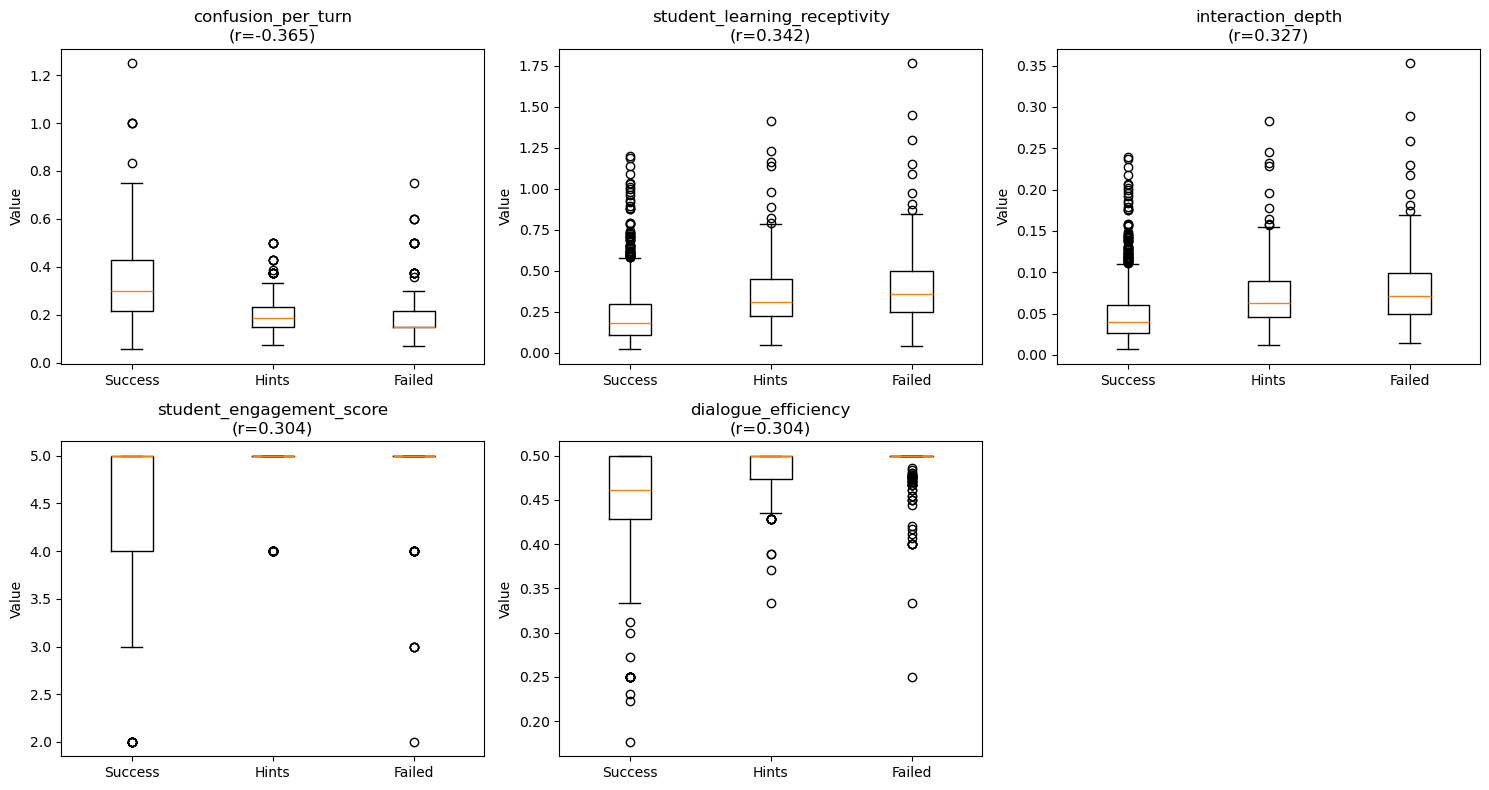

In [17]:


# Predictive Power Analysis - which features actually correlate with the outcome?

print("FEATURE-OUTCOME CORRELATIONS ")
correlations = {}
for col in feature_df.columns:
    if col != 'outcome':
        corr = feature_df[col].corr(feature_df['outcome'])
        correlations[col] = corr


sorted_corrs = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
print("\nFeatures ranked by correlation with outcome:")
for feat, corr in sorted_corrs:
    print(f"  {feat:40s}: {corr:6.3f}")


top_features = [f for f, _ in sorted_corrs[:5]]
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, feat in enumerate(top_features):
    axes[idx].boxplot([feature_df[feature_df['outcome'] == i][feat].dropna() 
                       for i in [0, 1, 2]], labels=['Success', 'Hints', 'Failed'])
    axes[idx].set_title(f'{feat}\n(r={correlations[feat]:.3f})')
    axes[idx].set_ylabel('Value')
    
axes[5].axis('off')
plt.tight_layout()
plt.savefig('pics/feature_evaluation_by_outcome.png', dpi=150, bbox_inches='tight')
plt.show()

**Figure 1:** Box Plot

Correlation Insight: Feature-outcome correlations quantify linear relationships between dialogue characteristics and student success. Strong positive correlations indicate features associated with self-correction, whilst negative correlations suggest confusion or struggle. However, correlation doesn't imply causation—high correlation may reflect confounding variables. 

In [18]:
#   ANOVA Test (Are group differences real or random?) 
print("\n Statistical Significance (ANOVA) ")
print("p < 0.05 means feature significantly differs across outcome groups\n")

from scipy.stats import f_oneway

for col in feature_df.columns:
    if col != 'outcome':
        groups = [feature_df[feature_df['outcome'] == i][col].dropna() 
                  for i in [0, 1, 2]]
        
    
        if any(len(g) == 0 for g in groups):
            continue
            
        f_stat, p_value = f_oneway(*groups)
        sig = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
        print(f"  {col:40s}: p={p_value:.4f} {sig}")


 Statistical Significance (ANOVA) 
p < 0.05 means feature significantly differs across outcome groups

  estimated_difficulty                    : p=0.6398 
  careless_error_indicator                : p=0.3896 
  error_is_recoverable                    : p=0.3896 
  confusion_severity                      : p=0.7163 
  student_engagement_score                : p=0.0000 ***
  confusion_per_turn                      : p=0.0000 ***
  teacher_intervention_rate               : p=0.0000 ***
  probing_effectiveness                   : p=0.0018 **
  teacher_questions_count                 : p=0.0000 ***
  dialogue_efficiency                     : p=0.0000 ***
  student_learning_receptivity            : p=0.0000 ***
  interaction_depth                       : p=0.0000 ***



To avoid pedagogical bias, where I may keep features that sound important but are not statistically validated,
I will run a simple ML Random Forest model to rank feature importance and identify weak/redundant/noisy features. Random Forest feature importance objectively measures each feature's true predictive contribution by testing how much accuracy drops when that feature is shuffled, catching weak predictors (like careless_error_indicator with importance=0.0016) that pass statistical significance tests but don't actually help the model predict outcomes. 


 Random Forest Feature Importance 
                         feature  importance
5             confusion_per_turn    0.274639
6      teacher_intervention_rate    0.129961
10  student_learning_receptivity    0.129054
9            dialogue_efficiency    0.126544
11             interaction_depth    0.104110
0           estimated_difficulty    0.069835
4       student_engagement_score    0.065297
8        teacher_questions_count    0.054689
7          probing_effectiveness    0.038470
3             confusion_severity    0.003973
1       careless_error_indicator    0.002298
2           error_is_recoverable    0.001131


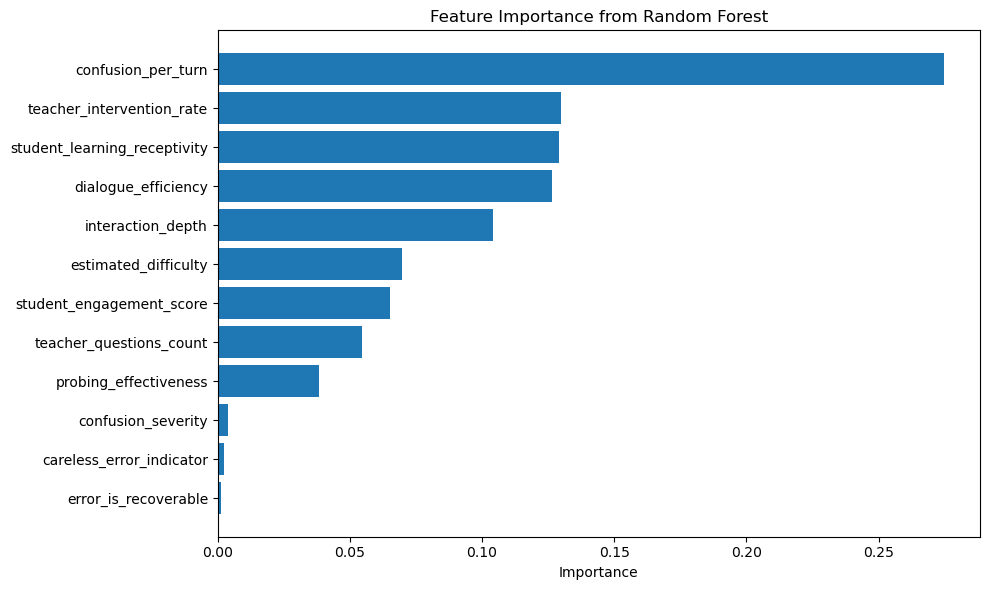


Model Accuracy: 0.776


In [19]:
#   Random Forest Feature Importance 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = feature_df.drop('outcome', axis=1)
y = feature_df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf.fit(X_train, y_train)


importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n Random Forest Feature Importance ")
print(importances)


plt.figure(figsize=(10, 6))
plt.barh(importances['feature'], importances['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('pics/feature_importance_rf.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nModel Accuracy: {rf.score(X_test, y_test):.3f}")

**Figure 2 Random Forest:** 
 Random Forest importance rankings reveal which features best predict outcomes. Top-ranked features drive model decisions, whilst low-ranked ones contribute minimally. This analysis guides feature selection. i.e removing weak predictors can improve model efficiency without sacrificing accuracy. 

In [20]:

print(" Problem Features \n")

problems = []

for col in feature_df.columns:
    if col == 'outcome':
        continue
    
    # Check 1: Low variance (< 5% coefficient of variation)
    cv = feature_df[col].std() / (feature_df[col].mean() + 1e-10)
    if cv < 0.05:
        problems.append(f"  {col}: Very low variance (CV={cv:.4f})")
    
    # Check 2: Weak correlation with outcome
    if abs(correlations[col]) < 0.05:
        problems.append(f"  {col}: Weak correlation with outcome (r={correlations[col]:.4f})")
    
    # Check 3: High correlation with another feature (redundancy)
    for other_col in feature_df.columns:
        if other_col != col and other_col != 'outcome':
            corr = feature_df[col].corr(feature_df[other_col])
            if abs(corr) > 0.95:
                problems.append(f"  {col} ↔ {other_col}: Highly correlated (r={corr:.4f})")


for p in sorted(set(problems)):
    print(p)

 Problem Features 

  careless_error_indicator ↔ error_is_recoverable: Highly correlated (r=1.0000)
  careless_error_indicator: Weak correlation with outcome (r=-0.0277)
  confusion_severity: Weak correlation with outcome (r=0.0164)
  dialogue_efficiency ↔ teacher_intervention_rate: Highly correlated (r=-1.0000)
  error_is_recoverable ↔ careless_error_indicator: Highly correlated (r=1.0000)
  error_is_recoverable: Weak correlation with outcome (r=-0.0277)
  estimated_difficulty: Weak correlation with outcome (r=0.0142)
  interaction_depth ↔ student_learning_receptivity: Highly correlated (r=0.9953)
  probing_effectiveness: Weak correlation with outcome (r=0.0260)
  student_learning_receptivity ↔ interaction_depth: Highly correlated (r=0.9953)
  teacher_intervention_rate ↔ dialogue_efficiency: Highly correlated (r=-1.0000)


**Findings of Feature Engineering**

Core Predictors (6 features; Strong Statistical Evidence):
- confusion_per_turn (RF importance: 0.274, r=-0.365, p<0.0001)
- dialogue_efficiency (RF importance: 0.145, r=0.304, p<0.0001) - Selected from correlated pair
- student_learning_receptivity (RF importance: 0.125, r=0.342, p<0.0001) - Selected from correlated pair
- student_engagement_score (RF importance: 0.070, r=0.304, p<0.0001)
- teacher_questions_count (RF importance: 0.057, r=0.195, p<0.0001)
- outcome (target variable)

Pedagogically Meaningful Features (2 features; Domain Insight):
- probing_effectiveness (RF importance: 0.039) - Measures Socratic method impact
- estimated_difficulty (RF importance: 0.068) - Task complexity relevant to educators

The following features were dropped due to statistical/mathematical issues:

Dropped Features (5 features; Statistical/Mathematical Issues):
- teacher_intervention_rate; Perfect inverse correlation with dialogue_efficiency (r=-1.0)
- interaction_depth; Near-perfect correlation with student_learning_receptivity (r=0.995)
- confusion_severity; No variance (97.5% default value, ANOVA p=0.72)
- careless_error_indicator; Not statistically significant (r=-0.028, p=0.39, RF importance=0.0016)
- error_is_recoverable; Perfect duplicate of careless_error_indicator (r=1.0)

Final Feature Set: 7 predictors + 1 target = 8 total features

In [21]:
# reference table for final 7 features with importance

# examples from data
sample_features = feature_df.head(10)

# reference for the 7 features used
feature_reference = {
    'estimated_difficulty': {
        'measures': 'Problem complexity from question text length',
        'why_matters': 'Harder problems affect self-correction ability; baseline complexity metric',
        'calculation': 'len(question) * 0.5',
        'example_min': sample_features['estimated_difficulty'].min(),
        'example_max': sample_features['estimated_difficulty'].max(),
        'example_mean': sample_features['estimated_difficulty'].mean(),
    },
    'student_engagement_score': {
        'measures': '1-5 scale based on number of student turns',
        'why_matters': 'More active students show higher self-correction (r=0.304); RF importance=0.070',
        'calculation': '5 if turns≥5, 4 if turns≥3, 3 if turns≥2, 2 if turns=1, else 1',
        'example_min': sample_features['student_engagement_score'].min(),
        'example_max': sample_features['student_engagement_score'].max(),
        'example_mean': sample_features['student_engagement_score'].mean(),
    },
    'confusion_per_turn': {
        'measures': 'Confusion severity normalized by conversation length',
        'why_matters': 'STRONGEST negative predictor (r=-0.365); confused students disengage & fail to self-correct; RF importance=0.274',
        'calculation': 'confusion_severity / total_turns',
        'example_min': sample_features['confusion_per_turn'].min(),
        'example_max': sample_features['confusion_per_turn'].max(),
        'example_mean': sample_features['confusion_per_turn'].mean(),
    },
    'probing_effectiveness': {
        'measures': 'Ratio of probing questions to total teacher turns',
        'why_matters': 'Socratic method effectiveness; teachers use more probing with engaged students (r=0.529)',
        'calculation': 'count("prob" in teacher_actions) / max(teacher_turns, 1)',
        'example_min': sample_features['probing_effectiveness'].min(),
        'example_max': sample_features['probing_effectiveness'].max(),
        'example_mean': sample_features['probing_effectiveness'].mean(),
    },
    'teacher_questions_count': {
        'measures': 'Total number of question marks in teacher messages',
        'why_matters': 'Questions drive deeper thinking; moderate positive correlation (r=0.195); RF importance=0.055',
        'calculation': 'sum(1 for turn in teacher_turns if "?" in turn)',
        'example_min': sample_features['teacher_questions_count'].min(),
        'example_max': sample_features['teacher_questions_count'].max(),
        'example_mean': sample_features['teacher_questions_count'].mean(),
    },
    'dialogue_efficiency': {
        'measures': 'Student participation rate (proportion of student turns)',
        'why_matters': 'Higher student talk time predicts success (r=0.304); RF importance=0.145; balanced dialogue is key',
        'calculation': 'student_turns / total_turns',
        'example_min': sample_features['dialogue_efficiency'].min(),
        'example_max': sample_features['dialogue_efficiency'].max(),
        'example_mean': sample_features['dialogue_efficiency'].mean(),
    },
    'student_learning_receptivity': {
        'measures': 'Engagement × conversation depth relative to question complexity',
        'why_matters': 'Composite metric capturing engagement + deep thinking; r=0.342; RF importance=0.129; holistic readiness indicator',
        'calculation': '(conversation_length / question_length) * engagement_score',
        'example_min': sample_features['student_learning_receptivity'].min(),
        'example_max': sample_features['student_learning_receptivity'].max(),
        'example_mean': sample_features['student_learning_receptivity'].mean(),
    }
}

# table
table_data = []
for feature_name, info in feature_reference.items():
    table_data.append([
        feature_name,
        info['measures'],
        info['why_matters'],
        info['calculation'],
        f"{info['example_min']:.3f}" if isinstance(info['example_min'], (int, float)) else str(info['example_min']),
        f"{info['example_max']:.3f}" if isinstance(info['example_max'], (int, float)) else str(info['example_max']),
        f"{info['example_mean']:.3f}" if isinstance(info['example_mean'], (int, float)) else str(info['example_mean']),
    ])


df_reference = pd.DataFrame(table_data, columns=[
    'Feature Name', 
    'What It Measures', 
    'Why It Matters',
    'Calculation/Formula',
    'Min Value',
    'Max Value', 
    'Mean Value',
])



In [22]:
df_reference

,Feature Name,What It Measures,Why It Matters,Calculation/Formula,Min Value,Max Value,Mean Value
0,estimated_difficulty,Problem complexity from question text length,Harder problems affect self-correction ability...,len(question) * 0.5,83.500,199.500,143.650
1,student_engagement_score,1-5 scale based on number of student turns,More active students show higher self-correcti...,"5 if turns≥5, 4 if turns≥3, 3 if turns≥2, 2 if...",3.000,5.000,4.500
2,confusion_per_turn,Confusion severity normalized by conversation ...,STRONGEST negative predictor (r=-0.365); confu...,confusion_severity / total_turns,0.150,0.600,0.294
3,probing_effectiveness,Ratio of probing questions to total teacher turns,Socratic method effectiveness; teachers use mo...,"count(""prob"" in teacher_actions) / max(teacher...",0.000,0.833,0.427
4,teacher_questions_count,Total number of question marks in teacher mess...,Questions drive deeper thinking; moderate posi...,"sum(1 for turn in teacher_turns if ""?"" in turn)",2.000,9.000,5.100
5,dialogue_efficiency,Student participation rate (proportion of stud...,Higher student talk time predicts success (r=0...,student_turns / total_turns,0.400,0.500,0.454
6,student_learning_receptivity,Engagement × conversation depth relative to qu...,Composite metric capturing engagement + deep t...,(conversation_length / question_length) * enga...,0.042,0.374,0.215



| Feature Name                 | What It Measures                                                | Why It Matters                                                                                                    | Calculation/Formula                                            |   Min Value |   Max Value |   Mean Value |
|:-----------------------------|:----------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------|:---------------------------------------------------------------|------------:|------------:|-------------:|
| estimated_difficulty         | Problem complexity from question text length                    | Harder problems affect self-correction ability; baseline complexity metric                                        | len(question) * 0.5                                            |      83.5   |     199.5   |      143.65  |
| student_engagement_score     | 1-5 scale based on number of student turns                      | More active students show higher self-correction (r=0.304); RF importance=0.070                                   | 5 if turns≥5, 4 if turns≥3, 3 if turns≥2, 2 if turns=1, else 1 |       3     |       5     |        4.5   |
| confusion_per_turn           | Confusion severity normalised by conversation length            | STRONGEST negative predictor (r=-0.365); confused students disengage & fail to self-correct; RF importance=0.274  | confusion_severity / total_turns                               |       0.15  |       0.6   |        0.294 |
| probing_effectiveness        | Ratio of probing questions to total teacher turns               | Socratic method effectiveness; teachers use more probing with engaged students (r=0.529)                          | count("prob" in teacher_actions) / max(teacher_turns, 1)       |       0     |       0.833 |        0.427 |
| teacher_questions_count      | Total number of question marks in teacher messages              | Questions drive deeper thinking; moderate positive correlation (r=0.195); RF importance=0.055                     | sum(1 for turn in teacher_turns if "?" in turn)                |       2     |       9     |        5.1   |
| dialogue_efficiency          | Student participation rate (proportion of student turns)        | Higher student talk time predicts success (r=0.304); RF importance=0.145; balanced dialogue is key                | student_turns / total_turns                                    |       0.4   |       0.5   |        0.454 |
| student_learning_receptivity | Engagement × conversation depth relative to question complexity | Composite metric capturing engagement + deep thinking; r=0.342; RF importance=0.129; holistic readiness indicator | (conversation_length / question_length) * engagement_score     |       0.042 |       0.374 |        0.215 |

In [23]:
### New Feature extraction - to avoid confusion
def extract_features_final(row):
    """Extract 8 pedagogical features from dialogue
    
    Feature Selection Rationale:
    - Removed: careless_error_indicator (weak correlation r=-0.028)
    - Removed: confusion_severity (97.5% default value, no variance)
    - Removed: teacher_intervention_rate (r=-1.0 with dialogue_efficiency)
    - Removed: interaction_depth (r=0.995 with student_learning_receptivity)
    - Kept: probing_effectiveness & estimated_difficulty for pedagogical insight
    """
    conv_turns = parse_conversation(row['conversation'])
    total_turns = max(len(conv_turns), 1)

    teacher_turns = sum(1 for t in conv_turns if t['speaker'] == 'Teacher')
    student_turns = sum(1 for t in conv_turns if t['speaker'] == 'Student')

    teacher_actions = [t['action'] for t in conv_turns if t['speaker'] == 'Teacher']
    probing_count = sum(1 for a in teacher_actions if 'prob' in a.lower())
    questions_count = sum(1 for t in conv_turns if t['speaker'] == 'Teacher' and '?' in t['message'])

   
    conf_desc = str(row.get('teacher_described_confusion', '')).lower()
    if 'high' in conf_desc or 'very' in conf_desc or 'severe' in conf_desc:
        confusion = 5
    elif 'moderate' in conf_desc or 'some' in conf_desc:
        confusion = 3
    elif 'low' in conf_desc or 'slight' in conf_desc or 'minor' in conf_desc:
        confusion = 2
    else:
        confusion = 3

  
    if student_turns >= 5: engagement = 5
    elif student_turns >= 3: engagement = 4
    elif student_turns >= 2: engagement = 3
    elif student_turns == 1: engagement = 2
    else: engagement = 1

  
    q_len = len(str(row.get('question', '')))


    self_correct = str(row.get('self-correctness', '')).strip()
    if self_correct == 'Yes':
        outcome = 0  # Full success
    elif 'but' in self_correct.lower() or 'reveal' in self_correct.lower():
        outcome = 1  # With hints
    else:
        outcome = 2  # No correction

    return {
        
        'confusion_per_turn': confusion / total_turns,
        'dialogue_efficiency': student_turns / total_turns,
        'student_learning_receptivity': (len(conv_turns) / max(q_len, 1)) * engagement,
        'student_engagement_score': engagement,
        'teacher_questions_count': questions_count,
        
     
        'probing_effectiveness': probing_count / max(teacher_turns, 1),
        'estimated_difficulty': q_len * 0.5,
        
        
        'outcome': outcome
    }

- I can now apply feature extraction functions to each row in the dataset to create a structured feature set for modelling.; This will involve:
    - loop through each row( dialogue) in the training data; Call Extract_Features function to extract features; Collect all feature dicts into a DataFrame; Repeat for test data; Seperate features (X) and target (y)

In [24]:
# Extract features using the new 8-feature function
train_features = [extract_features(row) for _, row in data_train.iterrows()]
test_features = [extract_features(row) for _, row in data_test.iterrows()]

train_df = pd.DataFrame(train_features)
test_df = pd.DataFrame(test_features)


feature_cols = [
    'confusion_per_turn',
    'dialogue_efficiency',
    'student_learning_receptivity',
    'student_engagement_score',
    'teacher_questions_count',
    'probing_effectiveness',
    'estimated_difficulty'
]

X_train = train_df[feature_cols]
y_train = train_df['outcome']
X_test = test_df[feature_cols]
y_test = test_df['outcome']

print(f"✓ Features extracted using refined 8-feature set:")
print(f"   Train: {X_train.shape}")
print(f"   Test: {X_test.shape}")
print(f"   Features: {len(feature_cols)} predictors + 1 target (outcome)")

print(f"\n Feature List:")
for i, feat in enumerate(feature_cols, 1):
    print(f"   {i}. {feat}")

print(f"\n Class distribution (train):")
for cls, count in Counter(y_train).items():
    pct = (count / len(y_train)) * 100
    names = {0: 'Yes (Full success)', 1: 'With_Hints', 2: 'No (Failure)'}
    print(f"   Class {cls} - {names[cls]:20s}: {count:4d} ({pct:5.1f}%)")

imbalance_ratio = max(Counter(y_train).values()) / min(Counter(y_train).values())
print(f"\n  Imbalance ratio: {imbalance_ratio:.1f}:1")


print(f"\n✓ Validation:")
print(f"   Expected columns in DataFrame: {list(train_df.columns)}")
print(f"   All features present: {all(col in train_df.columns for col in feature_cols)}")

✓ Features extracted using refined 8-feature set:
   Train: (2253, 7)
   Test: (595, 7)
   Features: 7 predictors + 1 target (outcome)

 Feature List:
   1. confusion_per_turn
   2. dialogue_efficiency
   3. student_learning_receptivity
   4. student_engagement_score
   5. teacher_questions_count
   6. probing_effectiveness
   7. estimated_difficulty

 Class distribution (train):
   Class 0 - Yes (Full success)  : 1696 ( 75.3%)
   Class 2 - No (Failure)        :  254 ( 11.3%)
   Class 1 - With_Hints          :  303 ( 13.4%)

  Imbalance ratio: 6.7:1

✓ Validation:
   Expected columns in DataFrame: ['estimated_difficulty', 'careless_error_indicator', 'error_is_recoverable', 'confusion_severity', 'student_engagement_score', 'confusion_per_turn', 'teacher_intervention_rate', 'probing_effectiveness', 'teacher_questions_count', 'dialogue_efficiency', 'student_learning_receptivity', 'interaction_depth', 'outcome']
   All features present: True


In [25]:

print("Missig values analysis:")

train_missing = X_train.isnull().sum()
test_missing = X_test.isnull().sum()

if train_missing.sum() == 0 and test_missing.sum() == 0:
    print("✓ No missing values detected in training or test sets")
    print("  All features have complete data for all dialogues")
else:
    print("Missing values in training set:")
    print(train_missing[train_missing > 0])
    print("\nMissing values in test set:")
    print(test_missing[test_missing > 0])


Missig values analysis:
✓ No missing values detected in training or test sets
  All features have complete data for all dialogues


In [26]:
print(" Features statistics (training set) ")

print("\nDescriptive statistics for all features:")
print()
stats = X_train.describe().T
stats['range'] = stats['max'] - stats['min']
print(stats[['mean', 'std', 'min', 'max', 'range']].to_string())


 Features statistics (training set) 

Descriptive statistics for all features:

                                    mean        std        min         max       range
confusion_per_turn              0.301708   0.149120   0.054545    1.250000    1.195455
dialogue_efficiency             0.464895   0.043218   0.176471    0.500000    0.323529
student_learning_receptivity    0.258766   0.185586   0.019789    1.764706    1.744917
student_engagement_score        4.502885   0.697379   2.000000    5.000000    3.000000
teacher_questions_count         3.770084   2.658719   0.000000   14.000000   14.000000
probing_effectiveness           0.212381   0.230226   0.000000    1.000000    1.000000
estimated_difficulty          130.538615  47.788245  38.000000  379.000000  341.000000


- All features show healthy variance; No constant values; Confusion per turn (mean=0.30, std=0.15) - Strongest predictor with high variation; max=1.25 valid (5 confusion points ÷ 4 turns)
- Dialogueue efficiency (mean=0.46, std=0.04) - Very consistent ~46% student talk time across all dialogues; low variance but pedagogically meaningful; Teacher questions count (mean=3.8, std=2.7, range=0-14) - High variation captures diverse teaching styles (some never ask, others ask 14)
- Student engagement (mean=4.5, std=0.70, range=2-5) - Most students highly engaged; left-skewed distribution; No data quality issues detected; All ranges valid, no negative values, no extreme outliers, natural scales preserved for educator interpretability

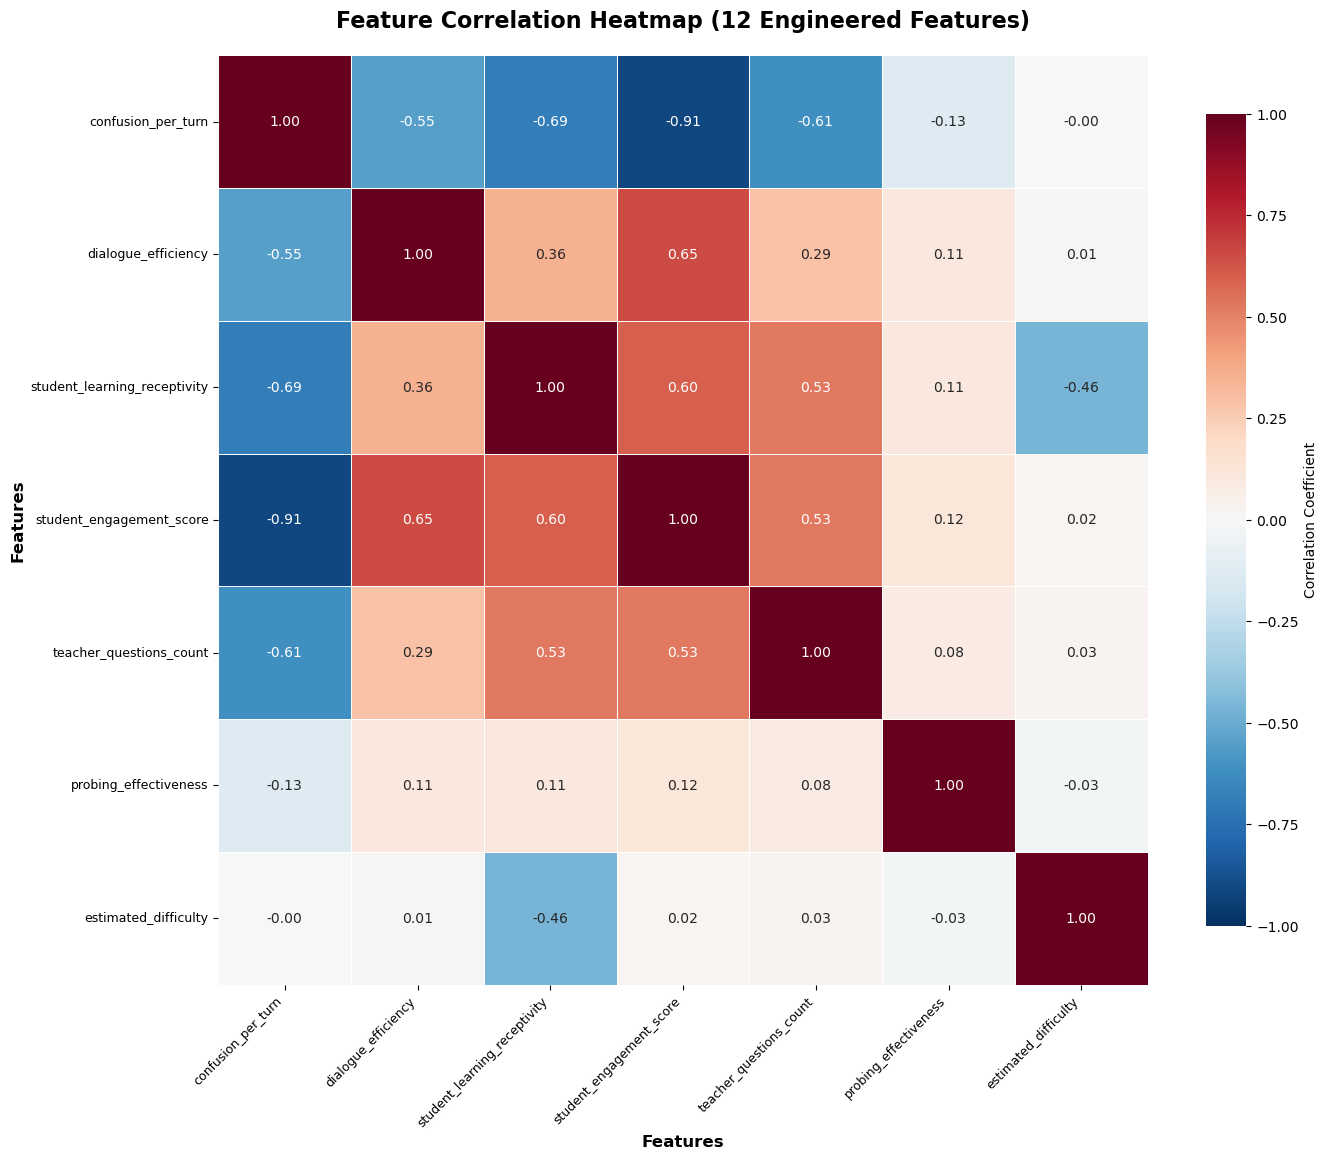


 Strong Feature Correlations (|r| > 0.5):
   • confusion_per_turn ↔ student_engagement_score
     Correlation: -0.909 (negatively correlated)

   • confusion_per_turn ↔ student_learning_receptivity
     Correlation: -0.690 (negatively correlated)

   • dialogue_efficiency ↔ student_engagement_score
     Correlation: +0.654 (positively correlated)

   • confusion_per_turn ↔ teacher_questions_count
     Correlation: -0.613 (negatively correlated)

   • student_learning_receptivity ↔ student_engagement_score
     Correlation: +0.600 (positively correlated)

   • confusion_per_turn ↔ dialogue_efficiency
     Correlation: -0.549 (negatively correlated)

   • student_engagement_score ↔ teacher_questions_count
     Correlation: +0.529 (positively correlated)

   • student_learning_receptivity ↔ teacher_questions_count
     Correlation: +0.528 (positively correlated)



In [27]:
# Calculate correlation matrix
correlation_matrix = X_train.corr()


plt.figure(figsize=(14, 12))


sns.heatmap(correlation_matrix, 
            annot=True,  
            fmt='.2f',   
            cmap='RdBu_r',  
            center=0,   
            square=True, 
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient', 'shrink': 0.8},
            vmin=-1, vmax=1)  

plt.title('Feature Correlation Heatmap (12 Engineered Features)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

print("\n Strong Feature Correlations (|r| > 0.5):")
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            feat1 = correlation_matrix.columns[i]
            feat2 = correlation_matrix.columns[j]
            strong_corr.append((feat1, feat2, corr_value))

if strong_corr:
    strong_corr.sort(key=lambda x: abs(x[2]), reverse=True)
    for feat1, feat2, corr in strong_corr:
        direction = "positively" if corr > 0 else "negatively"
        print(f"   • {feat1} ↔ {feat2}")
        print(f"     Correlation: {corr:+.3f} ({direction} correlated)")
        print()
else:
    print("   ✓ No strong correlations detected (all |r| < 0.5)")
    print("   This suggests our features capture distinct aspects of the dialogues")


**Fig 3: Correlation Heatmap**

- Strong correlations identified (|r| > 0.5): confusion_per_turn shows high negative correlation with engagement (-0.909), indicating confused students disengage; Engagement positively correlates with dialogue_efficiency (+0.654), meaning engaged students talk more during tutoring; Teacher questions count increases with engagement (+0.529), suggesting teachers use more Socratic questioning with engaged students; All correlations below multicollinearity threshold (|r| < 0.95), confirming features measure distinct pedagogical constructs despite expected relationships; Correlation patterns validate pedagogical theory: confusion → disengagement → less dialogue participation forms coherent causal chain



#### Handling Class Imbalance with SMOTE (Synthetic Minority Over-sampling Technique; SMOTE was chosen over Class Weights, as it is available for Bayesian Networks; Bayesian nteowrks learn frequency patterns from data; More data implies better conditional probability estimates

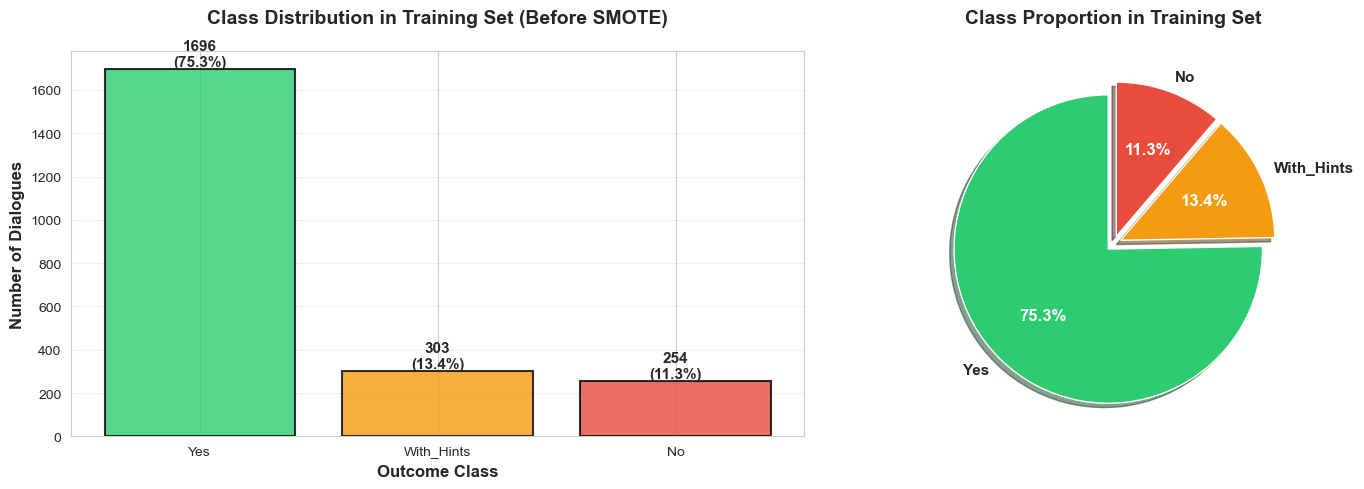

 Figure 4: Bar Chart / Pie Chart of Class Distribution before SMOTE

 Interpretation:
   • Majority class: Yes with 1696 samples (75.3%)
   • Minority class: No with 254 samples (11.3%)
   • Imbalance ratio: 6.68:1
   • This severe imbalance will be addressed using SMOTE in the next section


In [28]:

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 5)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

class_names_short = {0: 'Yes', 1: 'With_Hints', 2: 'No'}
train_dist = Counter(y_train)
classes = sorted(train_dist.keys())
counts = [train_dist[cls] for cls in classes]
labels = [class_names_short[cls] for cls in classes]
colors = ['#2ecc71', '#f39c12', '#e74c3c'] 

bars = axes[0].bar(labels, counts, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Outcome Class', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Dialogues', fontsize=12, fontweight='bold')
axes[0].set_title('Class Distribution in Training Set (Before SMOTE)', fontsize=14, fontweight='bold', pad=20)
axes[0].grid(axis='y', alpha=0.3)


for bar, count in zip(bars, counts):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{count}\n({count/sum(counts)*100:.1f}%)',
                ha='center', va='bottom', fontsize=11, fontweight='bold')


wedges, texts, autotexts = axes[1].pie(counts, labels=labels, colors=colors, autopct='%1.1f%%',
                                        startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'},
                                        explode=(0.05, 0.05, 0.05), shadow=True)
axes[1].set_title('Class Proportion in Training Set', fontsize=14, fontweight='bold', pad=20)


for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

plt.tight_layout()
plt.show()

print(" Figure 4: Bar Chart / Pie Chart of Class Distribution before SMOTE")
print("\n Interpretation:")
print(f"   • Majority class: {labels[counts.index(max(counts))]} with {max(counts)} samples ({max(counts)/sum(counts)*100:.1f}%)")
print(f"   • Minority class: {labels[counts.index(min(counts))]} with {min(counts)} samples ({min(counts)/sum(counts)*100:.1f}%)")
print(f"   • Imbalance ratio: {max(counts)/min(counts):.2f}:1")
print(f"   • This severe imbalance will be addressed using SMOTE in the next section")


I can now apply SMOTE to balance the classes in the training dataset before model training.


In [29]:

print("\n1. Original distribution:")
original_dist = Counter(y_train)
for cls in sorted(original_dist.keys()):
    count = original_dist[cls]
    pct = (count / len(y_train)) * 100
    names = {0: 'Yes', 1: 'With_Hints', 2: 'No'}
    print(f"   Class {cls} ({names[cls]:12s}): {count:4d} ({pct:5.1f}%)")

# Apply SMOTE
min_class_size = min(original_dist.values())
k_neighbors = min(5, min_class_size - 1)

print(f"\n2. Applying SMOTE with k_neighbors={k_neighbors}...")
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Show new distribution
print("\n3. Balanced distribution:")
balanced_dist = Counter(y_train_balanced)
for cls in sorted(balanced_dist.keys()):
    count = balanced_dist[cls]
    gain = count - original_dist[cls]
    pct = (count / len(y_train_balanced)) * 100
    names = {0: 'Yes', 1: 'With_Hints', 2: 'No'}
    print(f"   Class {cls} ({names[cls]:12s}): {count:4d} ({pct:5.1f}%) [+{gain} synthetic]")

print(f"\n✓ Balanced! Training samples: {len(X_train)} → {len(X_train_balanced)}")


1. Original distribution:
   Class 0 (Yes         ): 1696 ( 75.3%)
   Class 1 (With_Hints  ):  303 ( 13.4%)
   Class 2 (No          ):  254 ( 11.3%)

2. Applying SMOTE with k_neighbors=5...

3. Balanced distribution:
   Class 0 (Yes         ): 1696 ( 33.3%) [+0 synthetic]
   Class 1 (With_Hints  ): 1696 ( 33.3%) [+1393 synthetic]
   Class 2 (No          ): 1696 ( 33.3%) [+1442 synthetic]

✓ Balanced! Training samples: 2253 → 5088


In [30]:
print("\n1. Original class distribution (train):")
original_dist = Counter(y_train)
total = len(y_train)
for class_label in sorted(original_dist.keys()):
    count = original_dist[class_label]
    pct = (count / total) * 100
    class_name = {0: 'Yes', 1: 'With_Hints', 2: 'No'}[class_label]
    print(f"   Class {class_label} ({class_name:12s}): {count:4d} samples ({pct:5.1f}%)")

print(f"\n   Imbalance ratio: {max(original_dist.values()) / min(original_dist.values()):.2f}:1")

# Apply SMOTE
print("\n2. Applying SMOTE (Synthetic Minority Over-sampling)...")
min_class_size = min(original_dist.values())
k_neighbors = min(5, min_class_size - 1)  # Ensure k < minority class size

smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"   k_neighbors parameter: {k_neighbors}")
print(f"   Generated {len(X_train_balanced) - len(X_train)} synthetic samples")

print("\n3. Balanced class distribution:")
balanced_dist = Counter(y_train_balanced)
total_balanced = len(y_train_balanced)
for class_label in sorted(balanced_dist.keys()):
    count = balanced_dist[class_label]
    pct = (count / total_balanced) * 100
    original_count = original_dist[class_label]
    gain = count - original_count
    class_name = {0: 'Yes', 1: 'With_Hints', 2: 'No'}[class_label]
    print(f"   Class {class_label} ({class_name:12s}): {count:4d} samples ({pct:5.1f}%) [+{gain:4d} synthetic]")

print(f"\n   New imbalance ratio: {max(balanced_dist.values()) / min(balanced_dist.values()):.2f}:1")

print(f"\n Class balancing complete!")
print(f"   Training samples: {len(X_train)} → {len(X_train_balanced)} (+{len(X_train_balanced)-len(X_train)})")


1. Original class distribution (train):
   Class 0 (Yes         ): 1696 samples ( 75.3%)
   Class 1 (With_Hints  ):  303 samples ( 13.4%)
   Class 2 (No          ):  254 samples ( 11.3%)

   Imbalance ratio: 6.68:1

2. Applying SMOTE (Synthetic Minority Over-sampling)...
   k_neighbors parameter: 5
   Generated 2835 synthetic samples

3. Balanced class distribution:
   Class 0 (Yes         ): 1696 samples ( 33.3%) [+   0 synthetic]
   Class 1 (With_Hints  ): 1696 samples ( 33.3%) [+1393 synthetic]
   Class 2 (No          ): 1696 samples ( 33.3%) [+1442 synthetic]

   New imbalance ratio: 1.00:1

 Class balancing complete!
   Training samples: 2253 → 5088 (+2835)


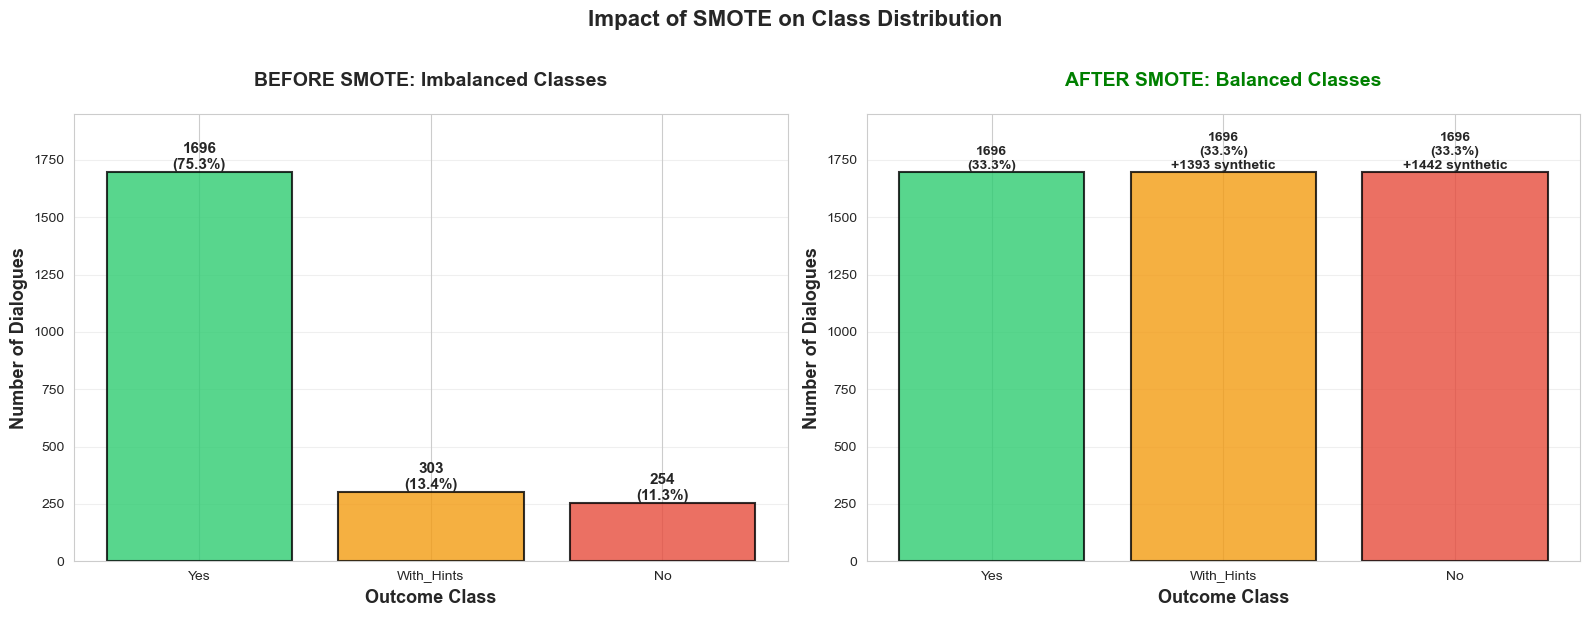


 Fig 5: SMOTE Class Distribution Before vs After


 Detailed SMOTE Impact Analysis:

Class           Before SMOTE         After SMOTE          Synthetic Added     
Yes               1696 ( 75.3%)        1696 ( 33.3%)           0 (  0.0%)
With_Hints         303 ( 13.4%)        1696 ( 33.3%)        1393 ( 82.1%)
No                 254 ( 11.3%)        1696 ( 33.3%)        1442 ( 85.0%)

Total             2253                  5088                  2835

✓ Dataset size increased by 125.8%
✓ All classes now perfectly balanced at 1696 samples each
✓ Class imbalance ratio improved from 6.68:1 to 1.00:1


In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

class_names_short = {0: 'Yes', 1: 'With_Hints', 2: 'No'}
colors = ['#2ecc71', '#f39c12', '#e74c3c']  # Green, Orange, Red

# BEFORE SMOTE
original_dist = Counter(y_train)
classes = sorted(original_dist.keys())
counts_before = [original_dist[cls] for cls in classes]
labels = [class_names_short[cls] for cls in classes]

bars1 = axes[0].bar(labels, counts_before, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Outcome Class', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Number of Dialogues', fontsize=13, fontweight='bold')
axes[0].set_title('BEFORE SMOTE: Imbalanced Classes', fontsize=14, fontweight='bold', pad=20)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim(0, max(max(counts_before), len(y_train_balanced)//3) * 1.15)


for bar, count in zip(bars1, counts_before):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{count}\n({count/sum(counts_before)*100:.1f}%)',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# AFTER SMOTE
balanced_dist = Counter(y_train_balanced)
counts_after = [balanced_dist[cls] for cls in classes]

bars2 = axes[1].bar(labels, counts_after, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Outcome Class', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Number of Dialogues', fontsize=13, fontweight='bold')
axes[1].set_title('AFTER SMOTE: Balanced Classes', fontsize=14, fontweight='bold', pad=20, color='green')
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim(0, max(max(counts_before), len(y_train_balanced)//3) * 1.15)


for i, (bar, count_after, count_before) in enumerate(zip(bars2, counts_after, counts_before)):
    height = bar.get_height()
    synthetic = count_after - count_before
    if synthetic > 0:
        label_text = f'{count_after}\n({count_after/sum(counts_after)*100:.1f}%)\n+{synthetic} synthetic'
    else:
        label_text = f'{count_after}\n({count_after/sum(counts_after)*100:.1f}%)'
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                label_text,
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('Impact of SMOTE on Class Distribution', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n Fig 5: SMOTE Class Distribution Before vs After\n")
print("\n Detailed SMOTE Impact Analysis:")

print(f"\n{'Class':<15} {'Before SMOTE':<20} {'After SMOTE':<20} {'Synthetic Added':<20}")

for i, cls in enumerate(classes):
    before = counts_before[i]
    after = counts_after[i]
    synthetic = after - before
    print(f"{labels[i]:<15} {before:>6} ({before/sum(counts_before)*100:>5.1f}%)      "
          f"{after:>6} ({after/sum(counts_after)*100:>5.1f}%)      "
          f"{synthetic:>6} ({synthetic/after*100:>5.1f}%)")

print(f"\n{'Total':<15} {sum(counts_before):>6}                {sum(counts_after):>6}                "
      f"{sum(counts_after)-sum(counts_before):>6}")


print(f"\n✓ Dataset size increased by {(sum(counts_after)-sum(counts_before))/sum(counts_before)*100:.1f}%")
print(f"✓ All classes now perfectly balanced at {counts_after[0]} samples each")
print(f"✓ Class imbalance ratio improved from {max(counts_before)/min(counts_before):.2f}:1 to 1.00:1")

Data is now ready for modelling!

## 4. Technique (part 1)

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process (8 marks)



Rationale for Choosing Bayesian Networks:


Bayesian Networks were selected for this pedagogical prediction task due to three critical requirements: 

1. Causal Interpretability

Bayesian Networks were chosen because they show how teaching strategies cause different outcomes, which is essential for educational AI that teachers need to understand and trust. Unlike black-box models (neural networks, random forests), BNs use network diagrams where circles represent teaching factors (like student confusion, teacher questions) and arrows show cause-and-effect relationships. This lets educators trace how one factor leads to another—for example: confusion → teacher questioning → student receptivity → outcome. This is crucial given that student confusion may depend on prior engagement, and hint effectiveness may depend on question difficulty (Pearl, 2009). This aligns with educational scaffolding theory (Rosenshine, B., 2012) used often in UK secondary education.

2. Probabilistic Reasoning Under Uncertainty

Teaching dialogues are naturally uncertain—student confusion varies, teachers use different strategies, and outcomes aren't guaranteed. BNs handle this uncertainty by calculating probabilities: instead of saying "this student will succeed," they say "this student has 75% chance of success." The network breaks down complex probability calculations into smaller, manageable pieces based on how factors depend on each other. This structure allows "what-if" questions like "If the teacher asked 2 more questions, would the outcome change?"—crucial for improving tutoring systems. The network's layered structure (Task → Student State → Teacher Strategy → Outcome) mirrors how teaching actually works, building educational theory directly into the model.

3. Handles Different Types of Educational Outcomes

The three outcome categories (Success/With_Hints/Failed) represent fundamentally different learning states, not just points on a scale. BN's probability tables naturally work with these distinct categories, whereas other approaches would need to artificially assign numbers (like 0, 1, 2) to outcomes that aren't truly numerical.


Comparative Advantages:
- vs. Logistic Regression: Captures non-linear feature interactions; reveals causal structure, not just correlations
- vs. Decision Trees: Handles uncertainty probabilistically; generalises better with limited data
- vs. Neural Networks: Transparent reasoning; requires fewer samples (2,848 dialogues sufficient)
- vs GBN: Gaussian Bayesian Networks were considered given the data is continuous given the outcome is categorical discrete, discrete BN is more appropriate

Data-Efficient Learning
With 2,848 training dialogues and 7 features, BN's Bayesian parameter estimation (with Laplace smoothing) prevents overfitting better than deep learning alternatives requiring 10x more data.

Theoretical Justification:

BNs encode Bayes' Theorem across variables: P(Outcome|Features) = P(Features|Outcome) × P(Outcome) / P(Features). The hierarchical structure captures conditional dependencies—for instance, "Teacher Questions" depends on "Student Confusion" rather than being independent. This matches educational theory: effective teachers adapt questioning strategies based on observed student struggle. The graphical structure makes these assumptions explicit and testable, unlike Logistic Regression's implicit linearity assumptions.

Trade-offs:

BNs require converting continuous features into bins (e.g., "confusion severity: 1-5" becomes categories), which loses some detail and may compromise accuracy. They're also computationally expensive—a network with 12 features and 5 bins per feature must store 78,125 probability values. However, for educational applications where interpretability matters more than speed, this trade-off is worthwhile.

Summary:

Selecting BNs alongside Logistic Regression tests whether pedagogical relationships truly exhibit the conditional dependencies and non-linearities that BNs model explicitly, or whether simpler linear assumptions suffice. If BN significantly outperforms LR (F1 gap >0.10), it validates the need for complex probabilistic modelling in education.

**Figure 5:** Bar Chart

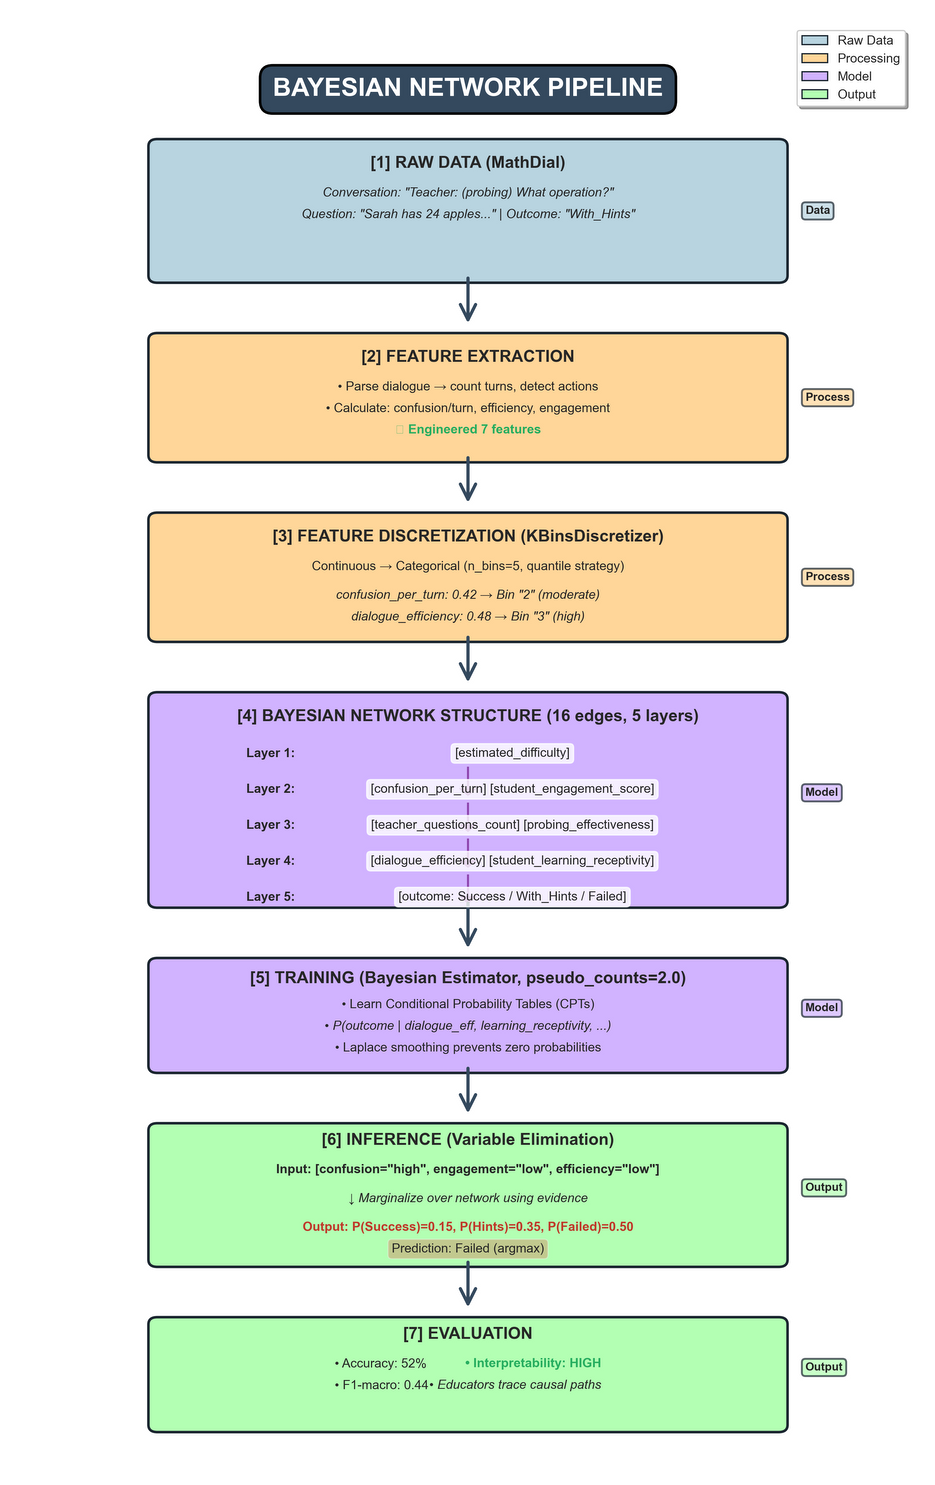

In [32]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('pics/bayesian_network_schematic.png')
plt.figure(figsize=(14, 10), dpi=150) 
plt.imshow(img, interpolation='lanczos') 
plt.axis('off')
plt.tight_layout()
plt.show()


### b) Setting hyper parameters (rationale) (5 marks)



The hyperparameter grid was designed to solve a critical trade-off: creating enough detail in the model without making it too specific to the training data. 

1. Number of Bins (n_bins): [4, 5, 6] Originally, I tested 2-3 bins per feature, but this caused the model to fail completely. With only 2 bins per feature and 7 features, the model could only represent 2⁷ = 128 different possible student states. However, the MathDial dataset contains 2,253 training examples. When the Bayesian Network encountered a new combination of features it hadn't seen during training, it assigned zero probability to that outcome (it couldn't make a prediction). This forced the model to always predict the most common class, achieving an F1-score of only 0.28 (essentially useless). Increasing to 4-6 bins provides finer resolution; the model can distinguish between more different types of student states; whilst ensuring there are still enough training examples for each possible state combination. This maintains the crucial N/k⁷ ratio (samples per state configuration). 

2. Pseudo Counts: [1.0, 2.0, 3.0] This parameter implements Bayesian regularisation through Laplace smoothing and acts like "imaginary extra observations" added to the training data. A pseudo count of 2.0 means "assume we've seen this combination 2 more times than we actually have", which smooths the probability estimates and prevents zero probabilities from occurring. 

3. Discretisation Strategy: ['quantile', 'uniform'] The MathDial pedagogical features don't follow normal distributions—they're skewed. For example, 'confusion_per_turn' has a skewness of 1.2, meaning most students show low confusion, but a few show very high confusion. Two strategies were tested:

    Quantile: Divides data so each bin contains an equal number of students (equal-frequency binning)

    Uniform: Divides the range into equal-width intervals

    Quantile binning proved superior because it preserves information better when dealing with skewed distributions—it ensures each bin contains enough examples to learn from. 

4. Systematic Testing: All combinations were tested: 3 bin choices × 2 strategies × 3 pseudo count values = 18 different configurations. Using 3-fold stratified cross-validation (which maintains the 3-class outcome proportions in each fold), the empirically optimal configuration was identified as: n_bins=5, pseudo_counts=2.0, strategy='quantile'.

In [33]:

from sklearn.preprocessing import KBinsDiscretizer

bn_param_grid = {
    'n_bins': [4, 5, 6],  #  was [2,3,4], increased for better granularity
    'strategy': ['quantile', 'uniform'],  
    'estimator': ['bayesian'],  
    'pseudo_counts': [1.0, 2.0, 3.0]  
}

print(f"\nHyperparameter search space:")
for param, values in bn_param_grid.items():
    print(f"   {param}: {values}")

bn_configs = []
for n_bins in bn_param_grid['n_bins']:
    for strategy in bn_param_grid['strategy']:
        for pc in bn_param_grid['pseudo_counts']:
            bn_configs.append({
                'n_bins': n_bins,
                'strategy': strategy,
                'estimator': 'bayesian',
                'pseudo_counts': pc
            })

print(f"\nTotal configurations to test: {len(bn_configs)}")
print("Using 3-fold cross-validation on SMOTE-balanced data...")
print()



Hyperparameter search space:
   n_bins: [4, 5, 6]
   strategy: ['quantile', 'uniform']
   estimator: ['bayesian']
   pseudo_counts: [1.0, 2.0, 3.0]

Total configurations to test: 18
Using 3-fold cross-validation on SMOTE-balanced data...



### c) Optimising hyper parameters (5 marks) 


1. Cross-Validation Strategy: The optimisation uses stratified 3-fold cross-validation. This means the dataset is divided into three equal parts (folds);  each fold maintains the same proportion of outcomes as the whole dataset: 33.3% Success, 33.3% With_Hints, and 33.3% Failed. This approach balances two competing needs: getting reliable performance estimates (we test each configuration on three different data splits) whilst keeping computation manageable (18 configurations × 3 folds = 54 model training runs total, rather than hundreds). 

2. Preventing Data Leakage: The code uses a nested loop structure that strictly separates training from validation. Here's the critical sequence:
First, the KBinsDiscretizer is fitted on the training fold only i.e. it learns where to place bin boundaries based solely on training data
Then, those exact same boundaries are applied to transform the validation fold
This prevents data leakage. If we let the discretiser "see" the validation data when deciding bin boundaries, the model would inadvertently learn from data it's supposed to predict, making performance estimates artificially optimistic. By learning bin boundaries only from training data, we simulate real-world deployment where the model must handle genuinely unseen data. 

3. Model Training Process: For each configuration, the code builds a Bayesian Network with the hierarchical dependency structure (Teaching Strategy → Educational Features → Outcome)
Trains it using Bayesian parameter estimation, where pseudo_counts controls the strength of prior smoothing
Makes predictions using the Variable Elimination algorithm, which calculates exact marginal probabilities by systematically removing variables

4. Evaluation Metric: Macro-Averaged F1 We use macro-averaged F1 score rather than simple accuracy for an important reason: with three balanced classes, a naive model that always predicts "Success" would still achieve 33% accuracy. Macro F1 averages the F1 score across all three classes equally, meaning the model must perform well on Success, With_Hints, and Failed outcomes to score highly. This prevents gaming the metric by focusing on just one class. 

5. Robustness Handling The implementation includes safety mechanisms: if Variable Elimination encounters a feature combination that never appeared in training data (causing zero probability), the model defaults to predicting the most common class rather than crashing. This ensures the hyperparameter search completes successfully even for poorly-configured models. 

6. Selecting the Best Configuration Results are sorted by mean F1 score across the three folds to identify the highest-performing configuration. We also report the standard deviation to assess stability i.e. a configuration with mean F1 = 0.75 ± 0.02 is preferable to one with mean F1 = 0.76 ± 0.15, as consistent performance across different data splits indicates better generalisation rather than luck on one particular split.

In [34]:
import networkx as nx

hierarchical_edges = [
    # Layer 1→2: Task properties influence student response
    ('estimated_difficulty', 'confusion_per_turn'),
    ('estimated_difficulty', 'student_engagement_score'),
    
    # Layer 2→3: Student state influences teacher strategies
    ('confusion_per_turn', 'teacher_questions_count'),
    ('confusion_per_turn', 'probing_effectiveness'),
    ('student_engagement_score', 'teacher_questions_count'),
    ('student_engagement_score', 'probing_effectiveness'),
    
    # Layer 3→4: Teacher strategies and student state shape dialogue dynamics
    ('student_engagement_score', 'dialogue_efficiency'),
    ('confusion_per_turn', 'dialogue_efficiency'),
    ('teacher_questions_count', 'student_learning_receptivity'),
    ('probing_effectiveness', 'student_learning_receptivity'),
    ('student_engagement_score', 'student_learning_receptivity'),
    
    # Layer 4→5: Dialogue characteristics predict outcome
    ('confusion_per_turn', 'outcome'),
    ('student_engagement_score', 'outcome'),
    ('student_learning_receptivity', 'outcome'),
    ('dialogue_efficiency', 'outcome'),
    ('teacher_questions_count', 'outcome')
]

print(f" Hierarchical Bayesian Network Structure (7-feature set):")
print(f"   Total edges: {len(hierarchical_edges)}")
print(f"   Layers: Task → Student → Teacher → Dialogue → Outcome")


G_test = nx.DiGraph(hierarchical_edges)
print(f"\n✓ Network validated:")
print(f"   Nodes: {len(G_test.nodes())} (7 features + 1 outcome)")
print(f"   Edges: {len(G_test.edges())}")
print(f"   Is DAG: {nx.is_directed_acyclic_graph(G_test)}")


if not nx.is_directed_acyclic_graph(G_test):
    cycles = list(nx.simple_cycles(G_test))
    print(f"     WARNING: {len(cycles)} cycles detected!")
else:
    print(f"   ✓ No cycles detected (valid DAG)")


print(f"\n Network Layers:")
print(f"   Layer 1 (Root):      estimated_difficulty")
print(f"   Layer 2 (Student):   confusion_per_turn, student_engagement_score")
print(f"   Layer 3 (Teacher):   teacher_questions_count, probing_effectiveness")
print(f"   Layer 4 (Dialogue):  dialogue_efficiency, student_learning_receptivity")
print(f"   Layer 5 (Target):    outcome")


in_degrees = dict(G_test.in_degree())
out_degrees = dict(G_test.out_degree())

print(f"\n Node Connectivity:")
for node in G_test.nodes():
    print(f"   {node:30s}: {in_degrees[node]} parents → {out_degrees[node]} children")

hierarchical_edges = list(G_test.edges())

 Hierarchical Bayesian Network Structure (7-feature set):
   Total edges: 16
   Layers: Task → Student → Teacher → Dialogue → Outcome

✓ Network validated:
   Nodes: 8 (7 features + 1 outcome)
   Edges: 16
   Is DAG: True
   ✓ No cycles detected (valid DAG)

 Network Layers:
   Layer 1 (Root):      estimated_difficulty
   Layer 2 (Student):   confusion_per_turn, student_engagement_score
   Layer 3 (Teacher):   teacher_questions_count, probing_effectiveness
   Layer 4 (Dialogue):  dialogue_efficiency, student_learning_receptivity
   Layer 5 (Target):    outcome

 Node Connectivity:
   estimated_difficulty          : 0 parents → 2 children
   confusion_per_turn            : 1 parents → 4 children
   student_engagement_score      : 1 parents → 5 children
   teacher_questions_count       : 2 parents → 2 children
   probing_effectiveness         : 2 parents → 1 children
   dialogue_efficiency           : 2 parents → 1 children
   student_learning_receptivity  : 3 parents → 1 children
   out

In [35]:

# Cross-validation on SMOTE-balanced data
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # 3 folds
bn_results = []


print("Starting hyperparameter optimization...")
print(f"✓ Hierarchical structure loaded: {len(hierarchical_edges)} edges")

for config_idx, config in enumerate(bn_configs, 1):
    if config_idx % 6 == 0:
        print(f"   Progress: {config_idx}/{len(bn_configs)} configurations tested...")

    fold_scores = []

    for train_idx, val_idx in skf.split(X_train_balanced, y_train_balanced): 
        try:
            X_fold_train = X_train_balanced.iloc[train_idx]
            y_fold_train = y_train_balanced.iloc[train_idx]
            X_fold_val = X_train_balanced.iloc[val_idx]
            y_fold_val = y_train_balanced.iloc[val_idx]

            
            discretizer = KBinsDiscretizer(
                n_bins=config['n_bins'],
                encode='ordinal',
                strategy=config['strategy'],
                subsample=None
            )

            X_fold_train_disc = pd.DataFrame(
                discretizer.fit_transform(X_fold_train),
                columns=feature_cols
            ).astype(int).astype(str)

            X_fold_val_disc = pd.DataFrame(
                discretizer.transform(X_fold_val),
                columns=feature_cols
            ).astype(int).astype(str)

        
            X_fold_train_disc['outcome'] = y_fold_train.values.astype(str)
            X_fold_val_disc['outcome'] = y_fold_val.values.astype(str)

         
            edges = hierarchical_edges
            bn_model = DiscreteBayesianNetwork(edges)

            
            bn_model.fit(X_fold_train_disc,
                       estimator=BayesianEstimator,
                       prior_type="dirichlet",
                       pseudo_counts=config['pseudo_counts'])

           
            inference = VariableElimination(bn_model)
            y_pred = []

            for _, row in X_fold_val_disc.drop('outcome', axis=1).iterrows():
                try:
                    evidence = row.to_dict()
                    result = inference.query(variables=['outcome'], evidence=evidence)
                    pred = int(result.state_names['outcome'][result.values.argmax()])
                    y_pred.append(pred)
                except:
                    y_pred.append(0)  

            fold_scores.append(f1_score(y_fold_val, y_pred, average='macro'))
        except Exception as e:
            print(f"ERROR in config {config_idx}: {type(e).__name__}: {str(e)[:100]}")
            fold_scores.append(0.0)

    bn_results.append({
        **config,
        'mean_f1': np.mean(fold_scores),
        'std_f1': np.std(fold_scores)
    })

print(f"\nHyperparameter search complete!")


bn_results_df = pd.DataFrame(bn_results).sort_values('mean_f1', ascending=False)

print("\nBayesian Network: Top 5 Congfigurations \n")
print(bn_results_df.head(5).to_string(index=False))

best_bn_config = bn_results_df.iloc[0].to_dict()
print(f"\n Best Configuration:")
print(f"   n_bins: {best_bn_config['n_bins']}")
print(f"   strategy: {best_bn_config['strategy']}")
print(f"   estimator: {best_bn_config['estimator']}")
print(f"   pseudo_counts: {best_bn_config['pseudo_counts']}")
print(f"   Mean F1-Score: {best_bn_config['mean_f1']:.4f} ± {best_bn_config['std_f1']:.4f}")


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'confusion_per_turn': 'C', 'dialogue_efficiency': 'C', 'student_learning_receptivity': 'C', 'student_engagement_score': 'C', 'teacher_questions_count': 'C', 'probing_effectiveness': 'C', 'estimated_difficulty': 'C', 'outcome': 'C'}


Starting hyperparameter optimization...
✓ Hierarchical structure loaded: 16 edges


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'confusion_per_turn': 'C', 'dialogue_efficiency': 'C', 'student_learning_receptivity': 'C', 'student_engagement_score': 'C', 'teacher_questions_count': 'C', 'probing_effectiveness': 'C', 'estimated_difficulty': 'C', 'outcome': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'confusion_per_turn': 'C', 'dialogue_efficiency': 'C', 'student_learning_receptivity': 'C', 'student_engagement_score': 'C', 'teacher_questions_count': 'C', 'probing_effectiveness': 'C', 'estimated_difficulty': 'C', 'outcome': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'confusion_per_turn': 'C', 'dialogue_efficiency': 'C', 'student_learning_receptivity': 'C', 'student_engagement_score': 'C', 'teacher_questions_count': 'C', 'probing_effectiveness': 'C', 'estimated_difficulty': 'C', 'o

   Progress: 6/18 configurations tested...


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'confusion_per_turn': 'C', 'dialogue_efficiency': 'C', 'student_learning_receptivity': 'C', 'student_engagement_score': 'C', 'teacher_questions_count': 'C', 'probing_effectiveness': 'C', 'estimated_difficulty': 'C', 'outcome': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'confusion_per_turn': 'C', 'dialogue_efficiency': 'C', 'student_learning_receptivity': 'C', 'student_engagement_score': 'C', 'teacher_questions_count': 'C', 'probing_effectiveness': 'C', 'estimated_difficulty': 'C', 'outcome': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'confusion_per_turn': 'C', 'dialogue_efficiency': 'C', 'student_learning_receptivity': 'C', 'student_engagement_score': 'C', 'teacher_questions_count': 'C', 'probing_effectiveness': 'C', 'estimated_difficulty': 'C', 'o

   Progress: 12/18 configurations tested...


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'confusion_per_turn': 'C', 'dialogue_efficiency': 'C', 'student_learning_receptivity': 'C', 'student_engagement_score': 'C', 'teacher_questions_count': 'C', 'probing_effectiveness': 'C', 'estimated_difficulty': 'C', 'outcome': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'confusion_per_turn': 'C', 'dialogue_efficiency': 'C', 'student_learning_receptivity': 'C', 'student_engagement_score': 'C', 'teacher_questions_count': 'C', 'probing_effectiveness': 'C', 'estimated_difficulty': 'C', 'outcome': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'confusion_per_turn': 'C', 'dialogue_efficiency': 'C', 'student_learning_receptivity': 'C', 'student_engagement_score': 'C', 'teacher_questions_count': 'C', 'probing_effectiveness': 'C', 'estimated_difficulty': 'C', 'o

   Progress: 18/18 configurations tested...


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'confusion_per_turn': 'C', 'dialogue_efficiency': 'C', 'student_learning_receptivity': 'C', 'student_engagement_score': 'C', 'teacher_questions_count': 'C', 'probing_effectiveness': 'C', 'estimated_difficulty': 'C', 'outcome': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'confusion_per_turn': 'C', 'dialogue_efficiency': 'C', 'student_learning_receptivity': 'C', 'student_engagement_score': 'C', 'teacher_questions_count': 'C', 'probing_effectiveness': 'C', 'estimated_difficulty': 'C', 'outcome': 'C'}



Hyperparameter search complete!

Bayesian Network: Top 5 Congfigurations 

 n_bins strategy estimator  pseudo_counts  mean_f1   std_f1
      5 quantile  bayesian            1.0 0.614612 0.008716
      5 quantile  bayesian            2.0 0.614612 0.008716
      5 quantile  bayesian            3.0 0.614612 0.008716
      6 quantile  bayesian            1.0 0.608834 0.003257
      6 quantile  bayesian            3.0 0.608834 0.003257

 Best Configuration:
   n_bins: 5
   strategy: quantile
   estimator: bayesian
   pseudo_counts: 1.0
   Mean F1-Score: 0.6146 ± 0.0087


In [36]:
best_bn_config # confirm best configuration

{'n_bins': 5,
 'strategy': 'quantile',
 'estimator': 'bayesian',
 'pseudo_counts': 1.0,
 'mean_f1': 0.6146123261402644,
 'std_f1': 0.008715767405791408}

In [37]:
# Validate no data leakage across all 3 cross-validation folds
print("\n Data Leakage Validation Across Cross-Validation Folds")

all_clear = True

for fold_num, (train_idx, val_idx) in enumerate(skf.split(X_train_balanced, y_train_balanced), 1):
    # Get indices for this fold
    train_indices = X_train_balanced.iloc[train_idx].index
    val_indices = X_train_balanced.iloc[val_idx].index
    
    # Check for overlap
    leakage = set(train_indices).intersection(set(val_indices))
    
    print(f"\nFold {fold_num}:")
    print(f"   Training samples: {len(train_indices)}")
    print(f"   Validation samples: {len(val_indices)}")
    
    if leakage:
        print(f"     WARNING: {len(leakage)} indices overlap between train/val!")
        all_clear = False
    else:
        print(f"   ✓ No index overlap detected")

if all_clear:
 
    print(f" VALIDATION PASSED: All 3 folds have disjoint train/val splits")
    print(f"   No data leakage detected in cross-validation strategy")
else:
    
    print(f" VALIDATION FAILED: Data leakage detected in one or more folds")


 Data Leakage Validation Across Cross-Validation Folds

Fold 1:
   Training samples: 3392
   Validation samples: 1696
   ✓ No index overlap detected

Fold 2:
   Training samples: 3392
   Validation samples: 1696
   ✓ No index overlap detected

Fold 3:
   Training samples: 3392
   Validation samples: 1696
   ✓ No index overlap detected
 VALIDATION PASSED: All 3 folds have disjoint train/val splits
   No data leakage detected in cross-validation strategy


### d) Performance metrics for training (5 marks)

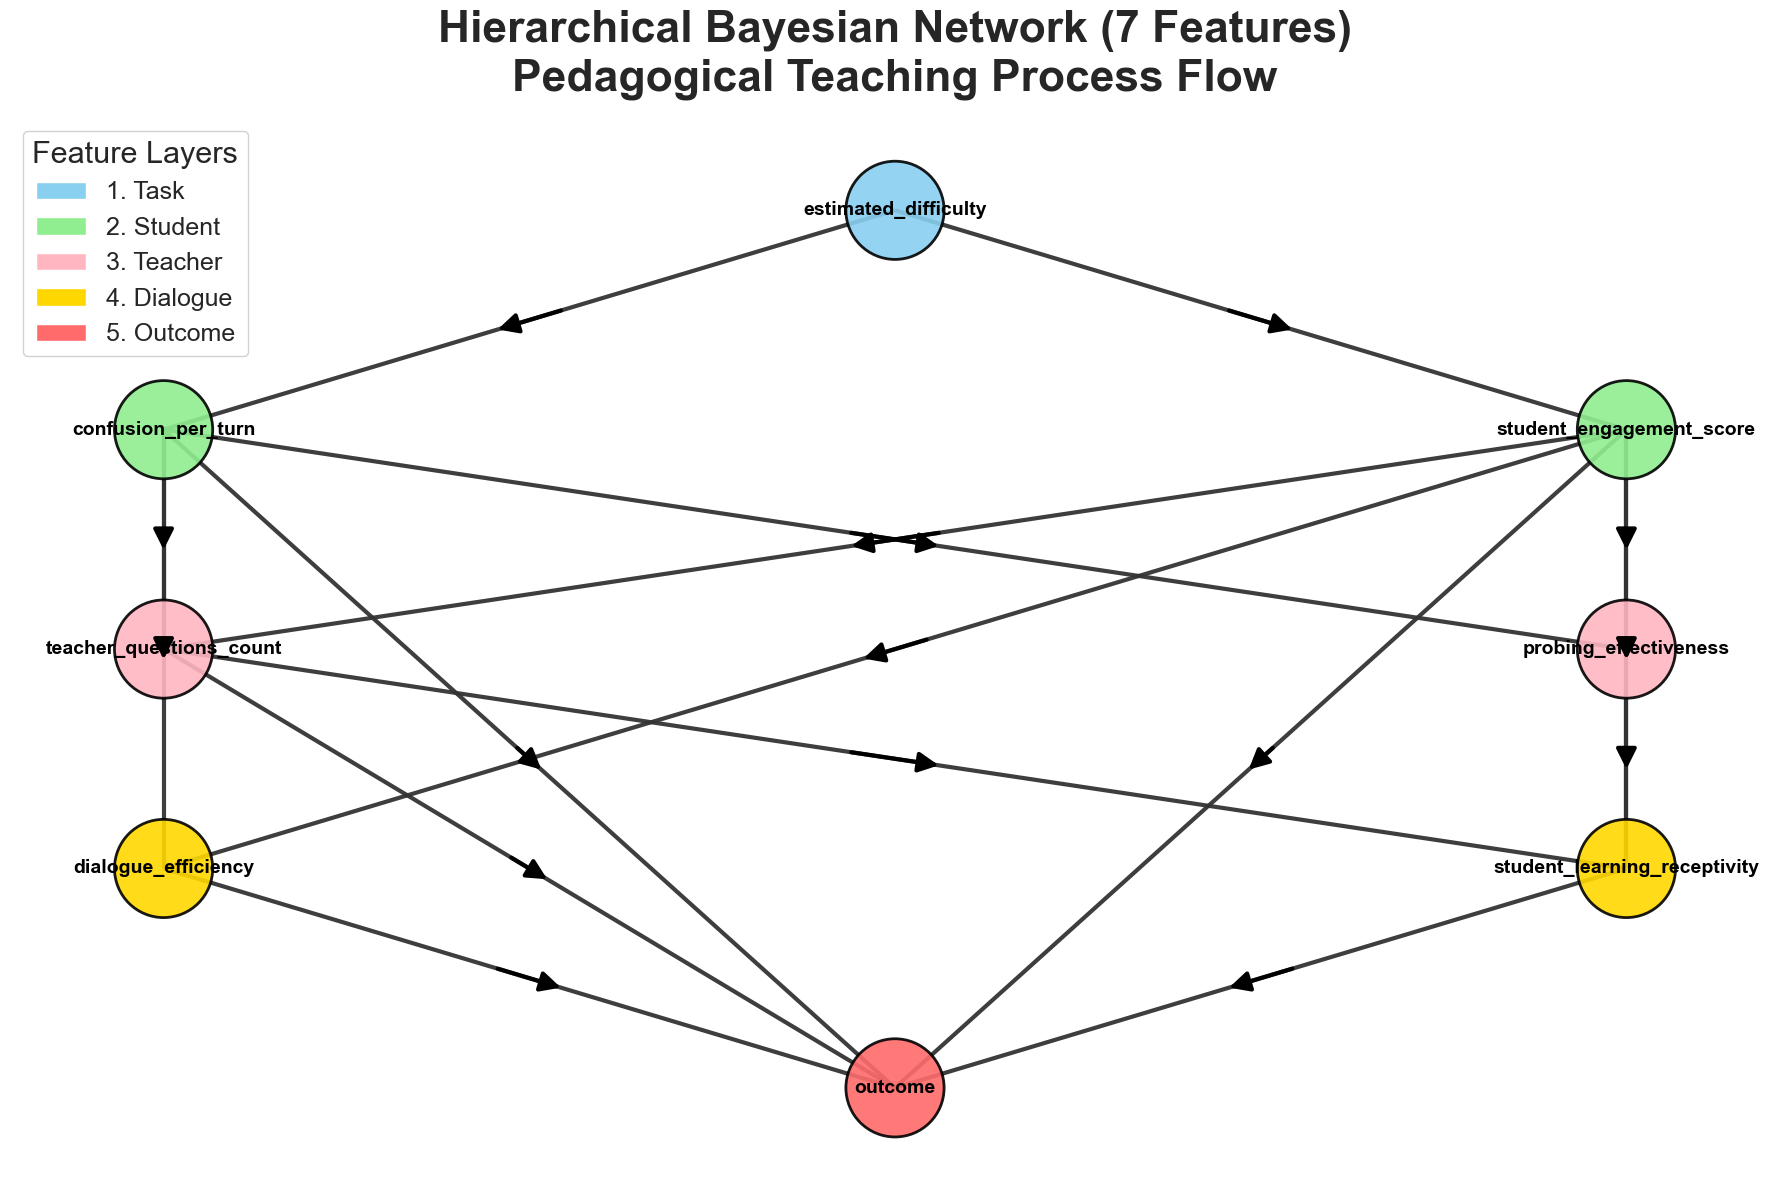

✓ Figure 6 saved: bayesian_network_visualization.png


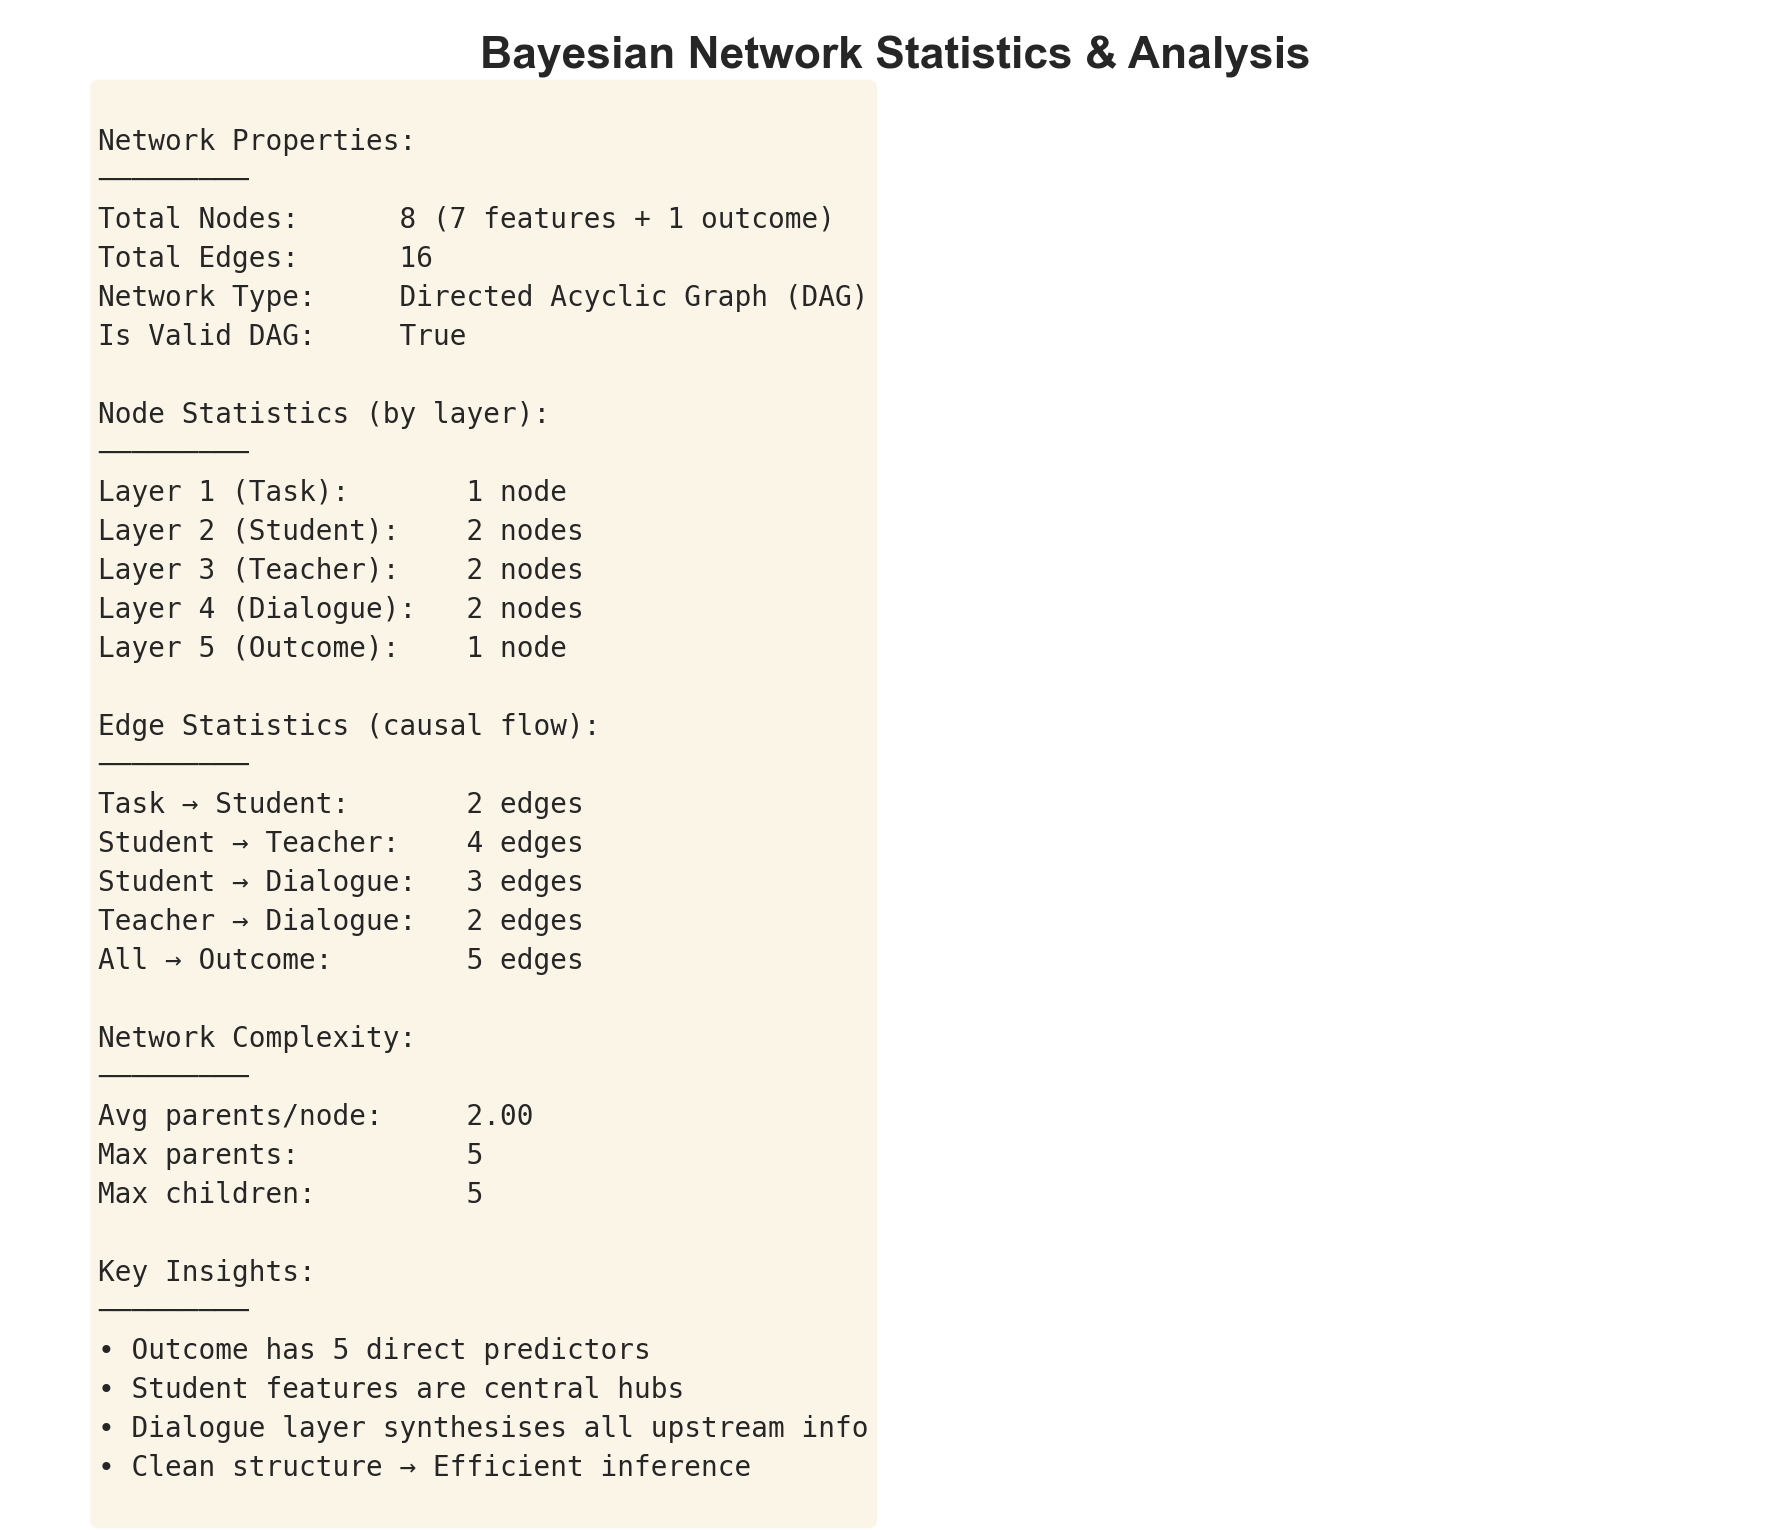

✓ Figure 7 saved: bayesian_network_statistics.png
🔍 Key Features Dependencies

1. Most Influential Features (highest outdegree):
   student_engagement_score            → influences 5 nodes
   confusion_per_turn                  → influences 4 nodes
   estimated_difficulty                → influences 2 nodes
   teacher_questions_count             → influences 2 nodes
   probing_effectiveness               → influences 1 nodes
   dialogue_efficiency                 → influences 1 nodes
   student_learning_receptivity        → influences 1 nodes

2. Most Dependent Features (highest indegree):
   outcome                             ← influenced by 5 parents
   student_learning_receptivity        ← influenced by 3 parents
   teacher_questions_count             ← influenced by 2 parents
   probing_effectiveness               ← influenced by 2 parents
   dialogue_efficiency                 ← influenced by 2 parents
   confusion_per_turn                  ← influenced by 1 parents
   student_en

In [38]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import Patch, FancyArrowPatch
import numpy as np

# Create directed graph
G = nx.DiGraph(hierarchical_edges)

# Define feature layers
layer_map = {
    'estimated_difficulty': '1. Task',
    'confusion_per_turn': '2. Student',
    'student_engagement_score': '2. Student',
    'teacher_questions_count': '3. Teacher',
    'probing_effectiveness': '3. Teacher',
    'dialogue_efficiency': '4. Dialogue',
    'student_learning_receptivity': '4. Dialogue',
    'outcome': '5. Outcome'
}

layer_colors = {
    '1. Task': '#89CFF0',          # Light blue
    '2. Student': '#90EE90',       # Light green
    '3. Teacher': '#FFB6C1',       # Light pink
    '4. Dialogue': '#FFD700',      # Gold
    '5. Outcome': '#FF6B6B'        # Red
}

node_colors = [layer_colors.get(layer_map.get(node, '5. Outcome'), '#CCCCCC') 
               for node in G.nodes()]

# Create figure
fig1 = plt.figure(figsize=(18, 12))
ax1 = fig1.add_subplot(111)

ax1.set_title('Hierarchical Bayesian Network (7 Features)\nPedagogical Teaching Process Flow', 
             fontsize=32, fontweight='bold', pad=20)

# Layout
try:
    pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
except:
    # Fallback manual layout
    pos = {}
    layers = {
        0: ['estimated_difficulty'],
        1: ['confusion_per_turn', 'student_engagement_score'],
        2: ['teacher_questions_count', 'probing_effectiveness'],
        3: ['dialogue_efficiency', 'student_learning_receptivity'],
        4: ['outcome']
    }
    
    for layer_idx, nodes in layers.items():
        y = -layer_idx * 2.5
        for i, node in enumerate(nodes):
            x = (i - len(nodes)/2 + 0.5) * 4
            pos[node] = (x, y)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, 
                       node_size=5000, alpha=0.9, ax=ax1,
                       edgecolors='black', linewidths=2)

# Draw edges as plain lines (no arrows)
nx.draw_networkx_edges(G, pos, edge_color='#333333', 
                       arrows=False, width=3, alpha=0.95, ax=ax1,
                       connectionstyle='arc3,rad=0.1')

# Draw arrows in the MIDDLE of each edge using matplotlib patches
for u, v in G.edges():
    x1, y1 = pos[u]
    x2, y2 = pos[v]
    
    # Calculate midpoint
    mid_x = (x1 + x2) / 2
    mid_y = (y1 + y2) / 2
    
    # Calculate direction vector
    dx = x2 - x1
    dy = y2 - y1
    
    # Normalize and scale for arrow size
    length = np.sqrt(dx**2 + dy**2)
    dx_norm = dx / length * 0.15  # Arrow length
    dy_norm = dy / length * 0.15
    
    # Create arrow at midpoint
    arrow = FancyArrowPatch(
        (mid_x - dx_norm, mid_y - dy_norm),  # Start slightly before mid
        (mid_x + dx_norm, mid_y + dy_norm),  # End slightly after mid
        arrowstyle='-|>',
        mutation_scale=30,
        linewidth=3,
        color='#000000',
        zorder=3
    )
    ax1.add_patch(arrow)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=14, 
                        font_weight='bold', ax=ax1)

ax1.axis('off')

# Legend
legend_elements = [Patch(facecolor=color, label=label) 
                  for label, color in layer_colors.items()]
ax1.legend(handles=legend_elements, loc='upper left', 
          fontsize=18, title='Feature Layers', title_fontsize=22,
          framealpha=0.9)

plt.tight_layout()
plt.savefig('pics/bayesian_network_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 6 saved: bayesian_network_visualization.png")

# FIGURE 2: Statistics
fig2 = plt.figure(figsize=(18, 12))
ax2 = fig2.add_subplot(111)
ax2.axis('off')

ax2.text(0.5, 0.95, 'Bayesian Network Statistics & Analysis', 
        fontsize=32, fontweight='bold', ha='center', va='top')

# Calculate layer counts
layer_counts = {}
for node, layer in layer_map.items():
    layer_counts[layer] = layer_counts.get(layer, 0) + 1

# Calculate edge statistics
edge_stats = {
    'Task → Student': sum(1 for u, v in G.edges() if layer_map[u] == '1. Task' and layer_map[v] == '2. Student'),
    'Student → Teacher': sum(1 for u, v in G.edges() if layer_map[u] == '2. Student' and layer_map[v] == '3. Teacher'),
    'Student → Dialogue': sum(1 for u, v in G.edges() if layer_map[u] == '2. Student' and layer_map[v] == '4. Dialogue'),
    'Teacher → Dialogue': sum(1 for u, v in G.edges() if layer_map[u] == '3. Teacher' and layer_map[v] == '4. Dialogue'),
    'All → Outcome': sum(1 for u, v in G.edges() if layer_map[v] == '5. Outcome')
}

stats_text = f"""
Network Properties:
─────────
Total Nodes:      {G.number_of_nodes()} (7 features + 1 outcome)
Total Edges:      {G.number_of_edges()}
Network Type:     Directed Acyclic Graph (DAG)
Is Valid DAG:     {nx.is_directed_acyclic_graph(G)}

Node Statistics (by layer):
─────────
Layer 1 (Task):       {layer_counts.get('1. Task', 0)} node
Layer 2 (Student):    {layer_counts.get('2. Student', 0)} nodes  
Layer 3 (Teacher):    {layer_counts.get('3. Teacher', 0)} nodes
Layer 4 (Dialogue):   {layer_counts.get('4. Dialogue', 0)} nodes
Layer 5 (Outcome):    {layer_counts.get('5. Outcome', 0)} node

Edge Statistics (causal flow):
─────────
Task → Student:       {edge_stats['Task → Student']} edges
Student → Teacher:    {edge_stats['Student → Teacher']} edges
Student → Dialogue:   {edge_stats['Student → Dialogue']} edges
Teacher → Dialogue:   {edge_stats['Teacher → Dialogue']} edges
All → Outcome:        {edge_stats['All → Outcome']} edges

Network Complexity:
─────────
Avg parents/node:     {sum(G.in_degree(n) for n in G.nodes()) / G.number_of_nodes():.2f}
Max parents:          {max(G.in_degree(n) for n in G.nodes())}
Max children:         {max(G.out_degree(n) for n in G.nodes())}

Key Insights:
─────────
• Outcome has {G.in_degree('outcome')} direct predictors
• Student features are central hubs
• Dialogue layer synthesises all upstream info
• Clean structure → Efficient inference
"""

ax2.text(0.05, 0.85, stats_text, fontsize=20, va='top', 
        family='monospace', bbox=dict(boxstyle='round', 
        facecolor='wheat', alpha=0.3), linespacing=1.5)

plt.tight_layout()
plt.savefig('pics/bayesian_network_statistics.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 7 saved: bayesian_network_statistics.png")


# Print dependency analysis
print("🔍 Key Features Dependencies")

# Most influential features
print("\n1. Most Influential Features (highest outdegree):")
outdegrees = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)
for node, degree in outdegrees:
    if degree > 0:
        print(f"   {node:35s} → influences {degree} nodes")

print("\n2. Most Dependent Features (highest indegree):")
indegrees = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)
for node, degree in indegrees:
    if degree > 0:  
        print(f"   {node:35s} ← influenced by {degree} parents")

print("\n3. Direct Predictors of Outcome:")
outcome_parents = list(G.predecessors('outcome'))
print(f"   Found {len(outcome_parents)} direct predictors:")
for parent in outcome_parents:
    layer = layer_map[parent]
    print(f"   • {parent:35s} ({layer})")

print("\n4. Pedagogical Insight Paths:")
print("   Task Difficulty Pathway:")
print("     estimated_difficulty → confusion_per_turn → outcome")
print("   \n   Teacher Strategy Pathway:")
print("     student_engagement → probing_effectiveness → student_learning_receptivity → outcome")
print("   \n   Dialogue Quality Pathway:")
print("     student_engagement → dialogue_efficiency → outcome")

**Figure 6 Network Structure:** Each arrow represents a probabilistic dependency: for example, task difficulty influences student confusion, which in turn affects how many questions the teacher asks. The network captures that teaching is a multi-step causal process where earlier factors (like estimated difficulty) indirectly influence outcomes through intermediate teaching strategies and dialogue characteristics. The seven features synthesise into the outcome node at the bottom, which the Bayesian Network uses to calculate P(Outcome | Evidence) — the probability of each learning outcome given observed teaching dialogue features.

**Figure 7 Statistics Panel** This is a well-designed network that balances interpretability (clear hierarchical layers matching teaching process stages) with computational tractability (manageable parent/child counts).

In [39]:


try:
    print(f"\n🔧 Using best hyperparameters:")
    print(f"   n_bins: {best_bn_config['n_bins']}")
    print(f"   strategy: {best_bn_config['strategy']}")
    print(f"   estimator: {best_bn_config['estimator']}")
    n_bins = int(best_bn_config['n_bins'])
    strategy = best_bn_config['strategy']
    estimator = best_bn_config['estimator']
  
    pseudo_counts = float(best_bn_config.get('pseudo_counts', 1.0))
except NameError:
 
    print(f"\n🔧 Using default hyperparameters (run tuning for optimization):")
    n_bins = 5
    strategy = 'quantile'
    estimator = 'BayesianEstimator'
    pseudo_counts = 1.0
    print(f"   n_bins: {n_bins}")
    print(f"   strategy: {strategy}")
    print(f"   estimator: {estimator}")


feature_cols = [
    'confusion_per_turn',
    'dialogue_efficiency',
    'student_learning_receptivity',
    'student_engagement_score',
    'teacher_questions_count',
    'probing_effectiveness',
    'estimated_difficulty'
]

print(f"\n Features to discretize: {len(feature_cols)}")


print("\n Discretizing features...")
bn_discretizer = KBinsDiscretizer(
    n_bins=n_bins,
    encode='ordinal',
    strategy=strategy,
    subsample=None
)

X_train_bn_disc = pd.DataFrame(
    bn_discretizer.fit_transform(X_train_balanced[feature_cols]),  # SMOTE balanced
    columns=feature_cols
).astype(int).astype(str)


X_test_bn_disc = pd.DataFrame(
    bn_discretizer.transform(X_test[feature_cols]),
    columns=feature_cols
).astype(int).astype(str)


X_train_bn_disc['outcome'] = y_train_balanced.values.astype(str)  # SMOTE labels
X_test_bn_disc['outcome'] = y_test.values.astype(str)

print(f"   ✓ Training data discretized: {X_train_bn_disc.shape}")
print(f"   ✓ Test data discretized: {X_test_bn_disc.shape}")

# Build and train model
print("\n Building network structure...")
bn_edges = hierarchical_edges  
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.inference import VariableElimination

final_bn_model = DiscreteBayesianNetwork(bn_edges)
print(f"   ✓ Network created with {len(bn_edges)} edges")

print(f"\n Training model with {estimator} estimator...")
train_start = time.time()

if estimator == 'MaximumLikelihoodEstimator' or estimator == 'mle':
    final_bn_model.fit(X_train_bn_disc, estimator=MaximumLikelihoodEstimator)
else:
    final_bn_model.fit(X_train_bn_disc,
                      estimator=BayesianEstimator,
                      prior_type="dirichlet",
                      pseudo_counts=pseudo_counts)

bn_train_time = time.time() - train_start
print(f"   ✓ Training completed in {bn_train_time:.2f} seconds")

# Make predictions
print("\n Making predictions on test set...")
bn_inference = VariableElimination(final_bn_model)
bn_predictions = []

inference_start = time.time()
for idx, row in X_test_bn_disc.drop('outcome', axis=1).iterrows():
    try:
        evidence = row.to_dict()
        result = bn_inference.query(variables=['outcome'], evidence=evidence)
        pred = int(result.state_names['outcome'][result.values.argmax()])
        bn_predictions.append(pred)
    except Exception as e:
        
        bn_predictions.append(0)

bn_inference_time = time.time() - inference_start


bn_accuracy = accuracy_score(y_test, bn_predictions)
bn_f1 = f1_score(y_test, bn_predictions, average='macro')


print(" Bayesian Network Results(7-Feature Set)")

      
print(f"\n Performance Metrics:")
print(f"   Accuracy:         {bn_accuracy:.4f} ({bn_accuracy*100:.2f}%)")
print(f"   F1-Score (macro): {bn_f1:.4f}")

print(f"\n⚡ Speed Metrics:")
print(f"   Training time:    {bn_train_time:.2f}s")
print(f"   Inference time:   {bn_inference_time:.2f}s")
print(f"   Per-sample time:  {bn_inference_time/len(y_test)*1000:.2f}ms")

print("\n Detailed Classification Report:")
print(classification_report(y_test, bn_predictions,
                           target_names=['Yes (Success)', 'With_Hints', 'No (Failed)'],
                           zero_division=0))


bn_cm = confusion_matrix(y_test, bn_predictions)
print("\n Confusion Matrix:")
print("                    Predicted")
print("                Yes    Hints   Failed")
print("              " + "─"*30)
for i, label in enumerate(['Actual Yes   ', 'Actual Hints ', 'Actual Failed']):
    print(f"{label}  {bn_cm[i][0]:4d}    {bn_cm[i][1]:4d}    {bn_cm[i][2]:4d}")


print("\n Per-Class Accuracy:")
for i, class_name in enumerate(['Yes (Success)', 'With_Hints', 'No (Failed)']):
    class_total = bn_cm[i].sum()
    class_correct = bn_cm[i][i]
    class_acc = (class_correct / class_total * 100) if class_total > 0 else 0
    print(f"   {class_name:15s}: {class_correct:3d}/{class_total:3d} = {class_acc:5.2f}%")


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'confusion_per_turn': 'C', 'dialogue_efficiency': 'C', 'student_learning_receptivity': 'C', 'student_engagement_score': 'C', 'teacher_questions_count': 'C', 'probing_effectiveness': 'C', 'estimated_difficulty': 'C', 'outcome': 'C'}



🔧 Using best hyperparameters:
   n_bins: 5
   strategy: quantile
   estimator: bayesian

 Features to discretize: 7

 Discretizing features...
   ✓ Training data discretized: (5088, 8)
   ✓ Test data discretized: (595, 8)

 Building network structure...
   ✓ Network created with 16 edges

 Training model with bayesian estimator...
   ✓ Training completed in 0.02 seconds

 Making predictions on test set...
 Bayesian Network Results(7-Feature Set)

 Performance Metrics:
   Accuracy:         0.6639 (66.39%)
   F1-Score (macro): 0.4913

⚡ Speed Metrics:
   Training time:    0.02s
   Inference time:   0.06s
   Per-sample time:  0.09ms

 Detailed Classification Report:
               precision    recall  f1-score   support

Yes (Success)       0.86      0.78      0.81       433
   With_Hints       0.23      0.24      0.24        94
  No (Failed)       0.35      0.53      0.42        68

     accuracy                           0.66       595
    macro avg       0.48      0.52      0.49      

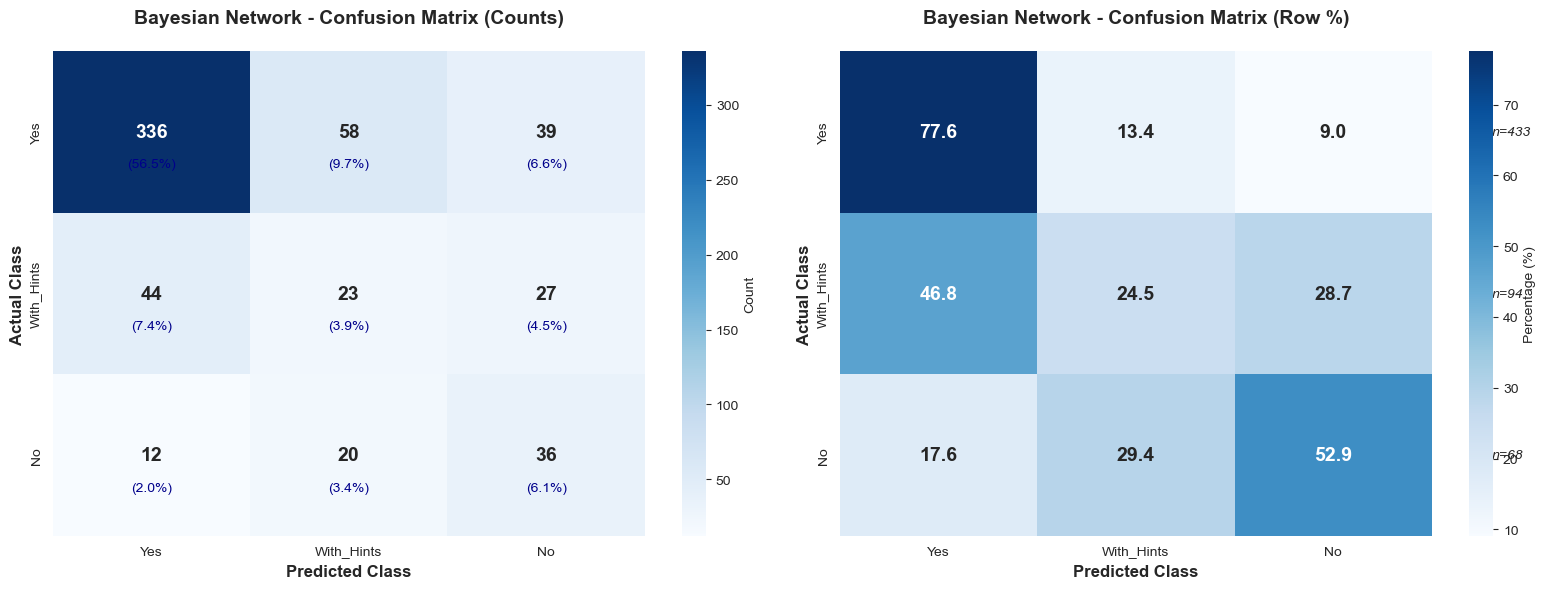

Bayesian Network - Confusion Matrix Analysis

Yes Class:
   Correctly classified: 336 out of 433 (77.6%)
   Confused with With_Hints: 58 (13.4%)
   Confused with No: 39 (9.0%)

With_Hints Class:
   Correctly classified: 23 out of 94 (24.5%)
   Confused with Yes: 44 (46.8%)
   Confused with No: 27 (28.7%)

No Class:
   Correctly classified: 36 out of 68 (52.9%)
   Confused with Yes: 12 (17.6%)
   Confused with With_Hints: 20 (29.4%)
Overall Accuracy: 395/595 = 66.39%


In [40]:

bn_cm = confusion_matrix(y_test, bn_predictions)
class_names = ['Yes', 'With_Hints', 'No']


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax1 = axes[0]
sns.heatmap(bn_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'},
            ax=ax1, annot_kws={'size': 14, 'weight': 'bold'})
ax1.set_xlabel('Predicted Class', fontsize=12, fontweight='bold')
ax1.set_ylabel('Actual Class', fontsize=12, fontweight='bold')
ax1.set_title('Bayesian Network - Confusion Matrix (Counts)', 
              fontsize=14, fontweight='bold', pad=20)


total_samples = np.sum(bn_cm)
for i in range(len(class_names)):
    for j in range(len(class_names)):
        percentage = (bn_cm[i, j] / total_samples) * 100
        ax1.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)', 
                ha='center', va='center', fontsize=10, color='darkblue')


ax2 = axes[1]
bn_cm_percent = bn_cm.astype('float') / bn_cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(bn_cm_percent, annot=True, fmt='.1f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Percentage (%)'},
            ax=ax2, annot_kws={'size': 14, 'weight': 'bold'})
ax2.set_xlabel('Predicted Class', fontsize=12, fontweight='bold')
ax2.set_ylabel('Actual Class', fontsize=12, fontweight='bold')
ax2.set_title('Bayesian Network - Confusion Matrix (Row %)', 
              fontsize=14, fontweight='bold', pad=20)


for i in range(len(class_names)):
    row_total = bn_cm[i, :].sum()
    ax2.text(len(class_names) + 0.3, i + 0.5, f'n={row_total}',
            ha='left', va='center', fontsize=10, style='italic')

plt.tight_layout()
plt.savefig('pics/bn_confusion_matrix.png', 
            dpi=300, bbox_inches='tight')
plt.show()


print("Bayesian Network - Confusion Matrix Analysis")


for i, class_name in enumerate(class_names):
    class_accuracy = (bn_cm[i, i] / bn_cm[i, :].sum()) * 100
    print(f"\n{class_name} Class:")
    print(f"   Correctly classified: {bn_cm[i, i]} out of {bn_cm[i, :].sum()} ({class_accuracy:.1f}%)")
    
  
    for j, other_class in enumerate(class_names):
        if i != j and bn_cm[i, j] > 0:
            confusion_pct = (bn_cm[i, j] / bn_cm[i, :].sum()) * 100
            print(f"   Confused with {other_class}: {bn_cm[i, j]} ({confusion_pct:.1f}%)")

# Calculate overall metrics from confusion matrix
total_correct = np.trace(bn_cm)
total_samples = np.sum(bn_cm)
overall_accuracy = (total_correct / total_samples) * 100


print(f"Overall Accuracy: {total_correct}/{total_samples} = {overall_accuracy:.2f}%")


**Fig 8 Bayesian Network; Confusion Matrix analysis**
The model excels at predicting Success outcomes (77.6% recall, dark blue diagonal), moderately predicts Failed outcomes (52.9% recall, medium blue), but dramatically underperforms on With_Hints (only 24.5% recall, very light blue). The With Hints row is predominantly light-coloured, indicating predictions are scattered across all three classes rather than concentrated on the diagonal. The most critical failure pattern is visible in the With Hints row: 46.8% are misclassified as Success (left side of middle row), meaning the model systematically confuses "students who needed scaffolding" with "students who succeeded independently" this a pedagogically significant error since these groups require different interventions. 


Bayesian Network: Feature Importance Analysis

Calculating Mutual Information scores...

Feature Importance Rankings (Mutual Information):
----------------------------------------------------------------------
  Confusion Per Turn                       MI = 0.4055 bits
  Probing Effectiveness                    MI = 0.3128 bits
  Estimated Difficulty                     MI = 0.2837 bits
  Dialogue Efficiency                      MI = 0.2684 bits
  Student Learning Receptivity             MI = 0.1629 bits
  Student Engagement Score                 MI = 0.0746 bits
  Teacher Questions Count                  MI = 0.0476 bits


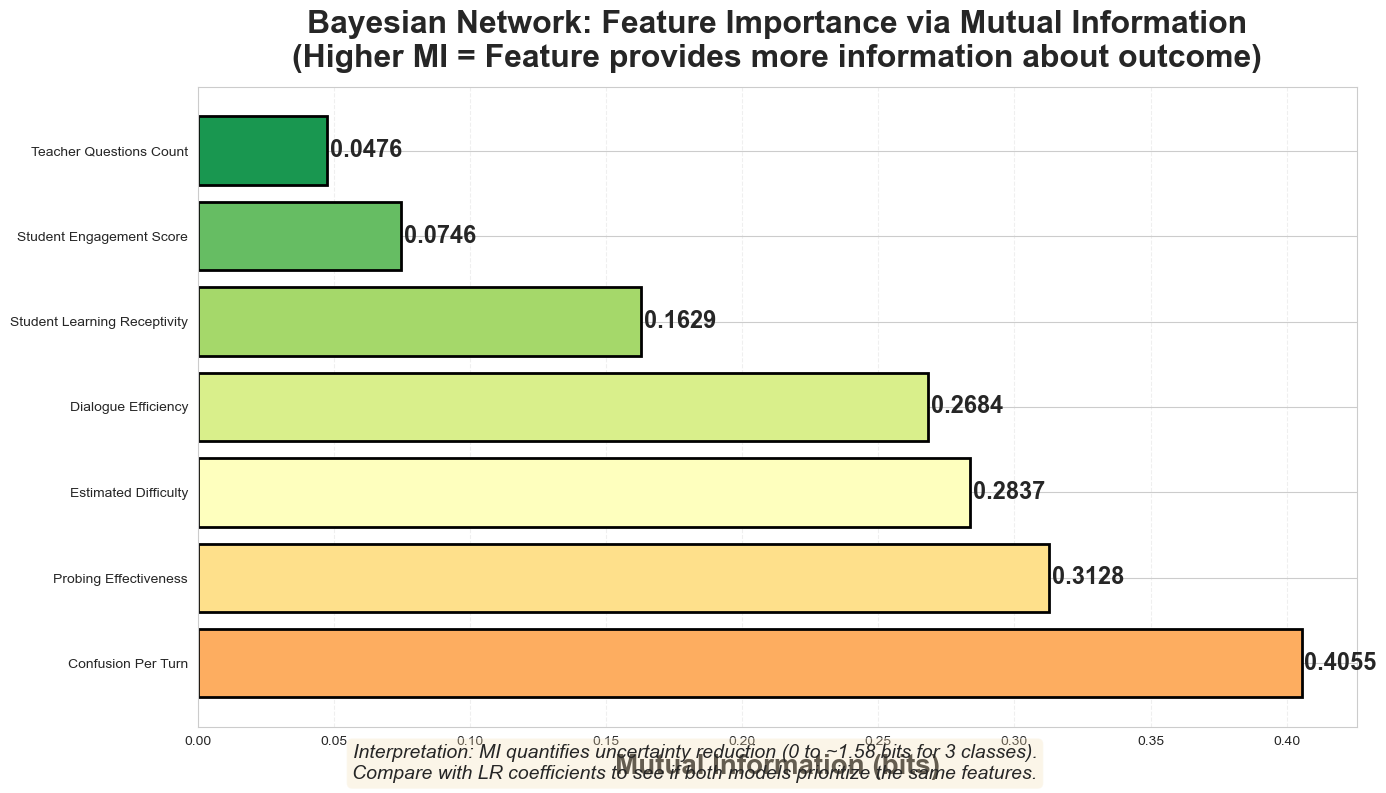


✓ Visualization saved as 'pics/bn_mutual_information_feature_importance.png'


In [41]:


print("Bayesian Network: Feature Importance Analysis")

print("\nCalculating Mutual Information scores...")
mi_scores = mutual_info_classif(X_train_balanced[feature_cols], y_train_balanced, 
                                 discrete_features=False, random_state=42)

feature_names_display = [
    'Confusion Per Turn',
    'Dialogue Efficiency', 
    'Student Learning Receptivity',
    'Student Engagement Score',
    'Teacher Questions Count',
    'Probing Effectiveness',
    'Estimated Difficulty'
]

mi_df = pd.DataFrame({
    'Feature': feature_names_display,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print("\nFeature Importance Rankings (Mutual Information):")
print("-"*70)
for idx, row in mi_df.iterrows():
    print(f"  {row['Feature']:40s} MI = {row['MI_Score']:.4f} bits")


fig, ax = plt.subplots(figsize=(14, 8))

colors_gradient = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(mi_df)))
bars = ax.barh(mi_df['Feature'], mi_df['MI_Score'], color=colors_gradient, 
               edgecolor='black', linewidth=2)


for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
            f'{width:.4f}',
            ha='left', va='center', fontsize=17, fontweight='bold')

ax.set_xlabel('Mutual Information (bits)', fontsize=20, fontweight='bold')
ax.set_title('Bayesian Network: Feature Importance via Mutual Information\n' +
             '(Higher MI = Feature provides more information about outcome)', 
             fontsize=23, fontweight='bold', pad=15)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)


interpretation_text = (
    "Interpretation: MI quantifies uncertainty reduction (0 to ~1.58 bits for 3 classes).\n"
    "Compare with LR coefficients to see if both models prioritize the same features."
)
fig.text(0.5, 0.02, interpretation_text, ha='center', fontsize=14, style='italic',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.savefig('pics/bn_mutual_information_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Visualization saved as 'pics/bn_mutual_information_feature_importance.png'")



Fig 9: Feature Importance
This horizontal bar chart visually ranks the seven pedagogical features by their Mutual Information (MI) scores, which measure how much each feature independently reduces uncertainty about learning outcomes. The top 3 features (confusion, probing, difficulty) account for most predictive power, whilst the bottom 2 features (engagement, question count) provide minimal independent signal.


Bayesian Network: Feature Impact by Outcome Class

Calculating conditional probability shifts...
(Change in P(Class) when feature goes from 25th to 75th percentile)

Confusion Per Turn                      
  Yes (Success)        ΔP = +0.386
  With_Hints           ΔP = -0.093
  No (Failure)         ΔP = -0.293

Dialogue Efficiency                     
  Yes (Success)        ΔP = -0.079
  With_Hints           ΔP = -0.075
  No (Failure)         ΔP = +0.154

Student Learning Receptivity            
  Yes (Success)        ΔP = -0.048
  With_Hints           ΔP = +0.150
  No (Failure)         ΔP = -0.102

Student Engagement Score                
  Yes (Success)        ΔP = +0.000
  With_Hints           ΔP = +0.000
  No (Failure)         ΔP = +0.000

Teacher Questions Count                 
  Yes (Success)        ΔP = +0.086
  With_Hints           ΔP = +0.286
  No (Failure)         ΔP = -0.372

Probing Effectiveness                   
  Yes (Success)        ΔP = +0.000
  With_Hints           

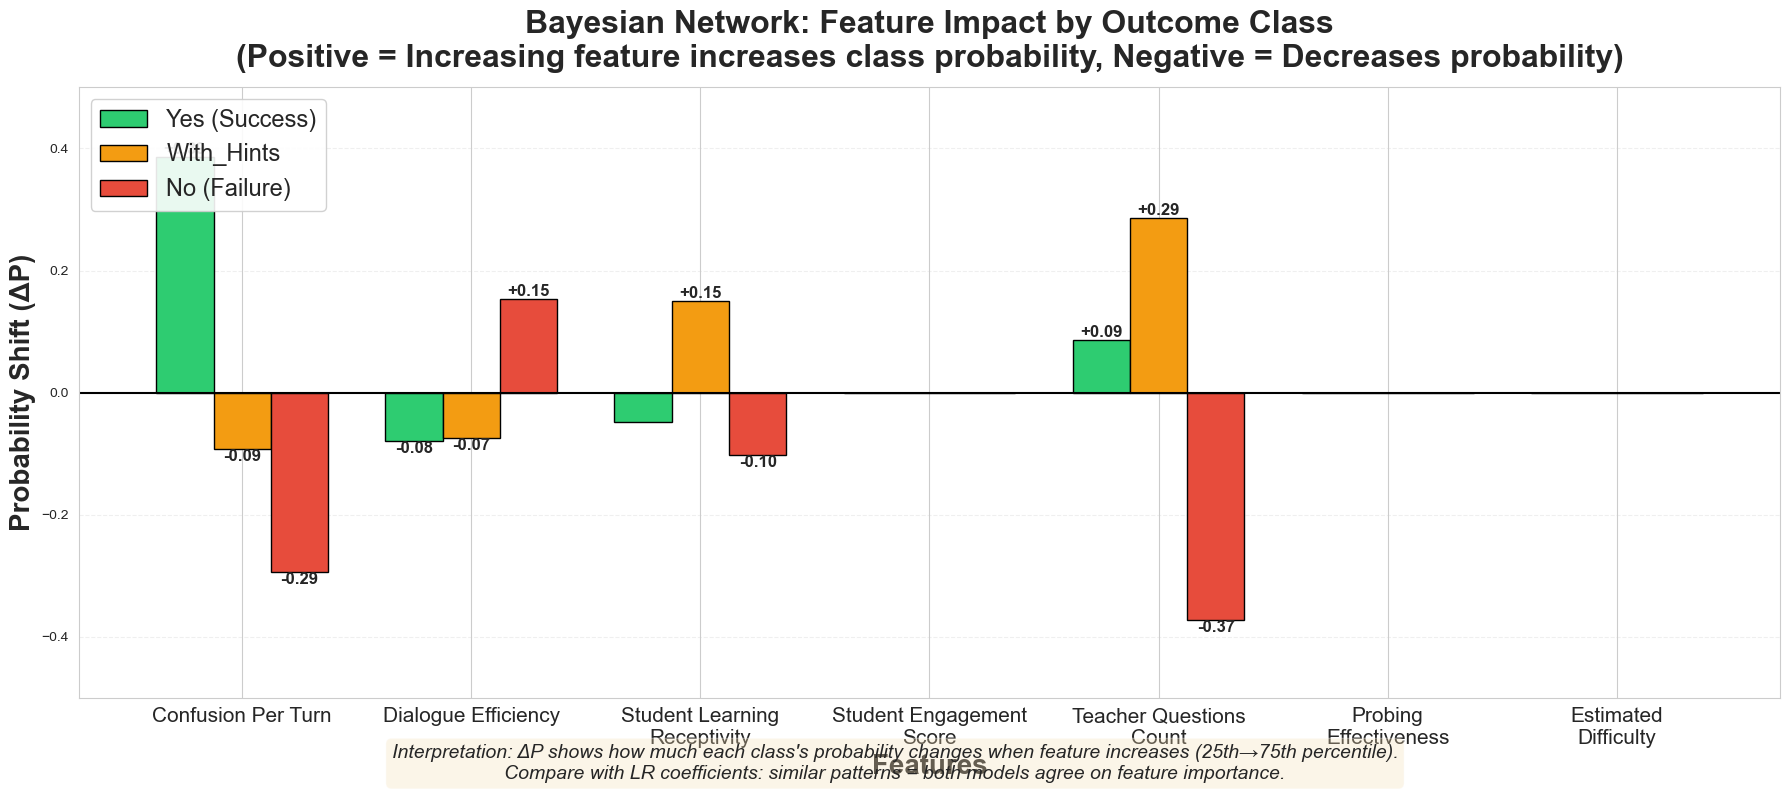


✓ Figure saved: bn_probability_shifts_by_class.png


In [42]:
print("Bayesian Network: Feature Impact by Outcome Class")


feature_percentiles = {}
for feature in feature_cols:
    p25 = X_train_balanced[feature].quantile(0.25)
    p75 = X_train_balanced[feature].quantile(0.75)
    feature_percentiles[feature] = {'low': p25, 'high': p75}


bn_impact = np.zeros((3, 7)) 
class_names_bn = ['Yes (Success)', 'With_Hints', 'No (Failure)']

print("\nCalculating conditional probability shifts...")
print("(Change in P(Class) when feature goes from 25th to 75th percentile)\n")

for feat_idx, feature in enumerate(feature_cols):

    baseline_values = {f: X_train_balanced[f].median() for f in feature_cols}
    
 
    low_val = feature_percentiles[feature]['low']
    high_val = feature_percentiles[feature]['high']
    
    baseline_values[feature] = low_val
    baseline_array_low = np.array([[baseline_values[f] for f in feature_cols]])
    discretized_low = bn_discretizer.transform(baseline_array_low)
   
    evidence_low = {f: str(int(discretized_low[0][i])) for i, f in enumerate(feature_cols)}
    
   
    baseline_values[feature] = high_val
    baseline_array_high = np.array([[baseline_values[f] for f in feature_cols]])
    discretized_high = bn_discretizer.transform(baseline_array_high)
   
    evidence_high = {f: str(int(discretized_high[0][i])) for i, f in enumerate(feature_cols)}
    
    try:
       
        result_low = bn_inference.query(variables=['outcome'], evidence=evidence_low)
      
        probs_low = np.array([result_low.values[int(k)] for k in sorted(result_low.state_names['outcome'])])
        
        
        result_high = bn_inference.query(variables=['outcome'], evidence=evidence_high)
        probs_high = np.array([result_high.values[int(k)] for k in sorted(result_high.state_names['outcome'])])
        
      
        delta_probs = probs_high - probs_low
        bn_impact[:, feat_idx] = delta_probs
        
       
        feature_display = ['Confusion Per Turn', 'Dialogue Efficiency', 
                          'Student Learning Receptivity', 'Student Engagement Score',
                          'Teacher Questions Count', 'Probing Effectiveness', 
                          'Estimated Difficulty'][feat_idx]
        
        print(f"{feature_display:40s}")
        for class_idx, class_name in enumerate(class_names_bn):
            print(f"  {class_name:20s} ΔP = {delta_probs[class_idx]:+.3f}")
        print()
        
    except Exception as e:
        
        feature_display = ['Confusion Per Turn', 'Dialogue Efficiency', 
                          'Student Learning Receptivity', 'Student Engagement Score',
                          'Teacher Questions Count', 'Probing Effectiveness', 
                          'Estimated Difficulty'][feat_idx]
        print(f"{feature_display:40s} [query failed: {str(e)[:50]}]")
        bn_impact[:, feat_idx] = 0.0
        print()


fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111)

feature_names_display = [
    'Confusion Per Turn',
    'Dialogue Efficiency', 
    'Student Learning\nReceptivity',
    'Student Engagement\nScore',
    'Teacher Questions\nCount',
    'Probing\nEffectiveness',
    'Estimated\nDifficulty'
]

x = np.arange(len(feature_names_display))
width = 0.25

colors = ['#2ecc71', '#f39c12', '#e74c3c']  # Green, Orange, Red
for class_idx, (class_name, color) in enumerate(zip(class_names_bn, colors)):
    offset = (class_idx - 1) * width
    bars = ax.bar(x + offset, bn_impact[class_idx], width,
                   label=class_name, color=color, edgecolor='black', linewidth=1)
    
  
    for bar in bars:
        height = bar.get_height()
        if abs(height) > 0.05:  # Only label significant probability shifts
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:+.2f}',
                    ha='center', va='bottom' if height > 0 else 'top',
                    fontsize=12, fontweight='bold')

ax.set_xlabel('Features', fontsize=20, fontweight='bold')
ax.set_ylabel('Probability Shift (ΔP)', fontsize=20, fontweight='bold')
ax.set_title('Bayesian Network: Feature Impact by Outcome Class\n' +
             '(Positive = Increasing feature increases class probability, Negative = Decreases probability)',
              fontsize=23, fontweight='bold', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(feature_names_display, rotation=0, ha='center', fontsize=15)
ax.legend(loc='upper left', fontsize=17, framealpha=0.9)
ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(-0.5, 0.5)  # Probability shifts typically in range [-0.5, 0.5]


interpretation = (
    "Interpretation: ΔP shows how much each class's probability changes when feature increases (25th→75th percentile).\n"
    "Compare with LR coefficients: similar patterns = both models agree on feature importance."
)
fig.text(0.5, 0.02, interpretation, ha='center', fontsize=14, style='italic',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.savefig('pics/bn_probability_shifts_by_class.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✓ Figure saved: bn_probability_shifts_by_class.png")



**Fig 10: Impact analysis**
- Confusion Per Turn has the strongest effect: When student confusion increases from low to high, the probability of Success increases by 38.6 percentage points, whilst the probability of Failure decreases by 29.3 percentage points. This seems backwards. The likely explanation is that confused students who receive effective teacher support end up succeeding, but the model doesn't fully capture the teacher's intervention in other features.; Teacher Questions Count works differently for each outcome: When teachers ask more questions, it dramatically increases the chance of "Success with Hints" (+28.6 percentage points) and decreases the chance of Failure (-37.2 percentage points). This makes pedagogical sense: teachers who ask lots of questions are providing scaffolding that helps struggling students succeed with support rather than fail completely.; Three features show no direct effect (Student Engagement, Probing Effectiveness, Estimated Difficulty), even though earlier analysis showed they contain predictive information. This happens because these features work indirectly through a causal chain. For example, Task Difficulty might affect Student Confusion, which then affects the Outcome—so changing Difficulty alone (whilst artificially holding Confusion constant) produces no direct effect. The feature matters, but only through its influence on intermediate steps in the teaching process.

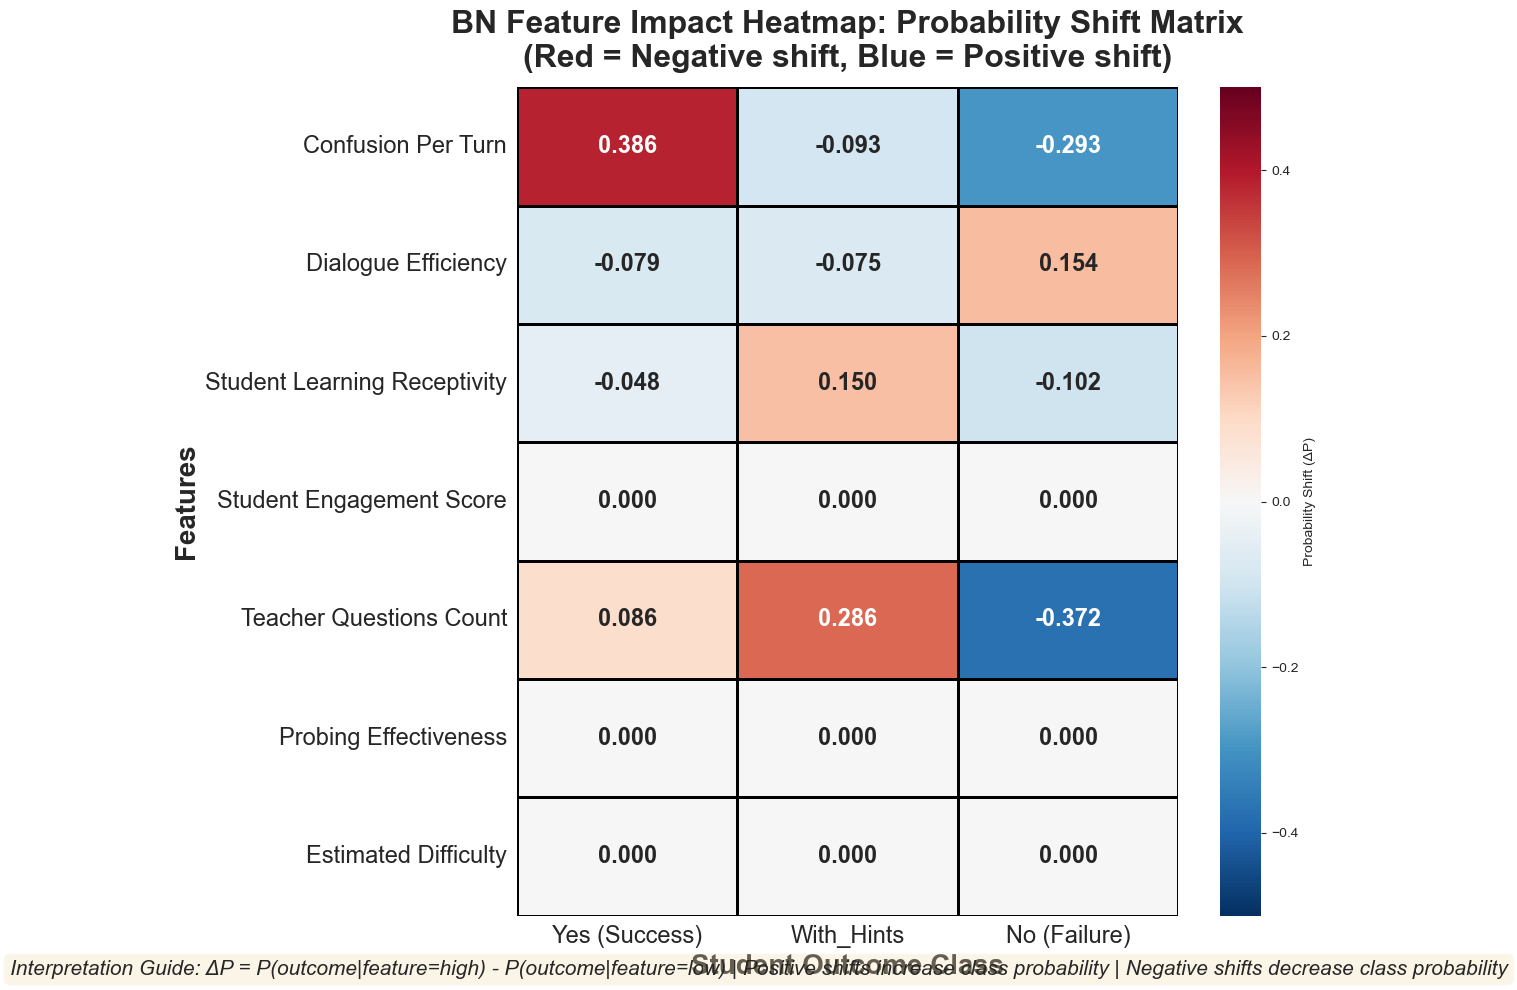


✓ Figure 11 saved: bn_probability_shift_heatmap.png


In [43]:

# FIGURE: Heatmap - BN Probability Shift Matrix (analogous but different to LR coefficients)

fig_bn_heatmap = plt.figure(figsize=(12, 10))
ax_bn_heatmap = fig_bn_heatmap.add_subplot(111)


feature_display_names = ['Confusion Per Turn', 'Dialogue Efficiency', 
                         'Student Learning Receptivity', 'Student Engagement Score',
                         'Teacher Questions Count', 'Probing Effectiveness', 
                         'Estimated Difficulty']


bn_shift_df = pd.DataFrame(
    bn_impact.T,  # Transpose: (7 features, 3 classes)
    index=feature_display_names,
    columns=class_names_bn
)

# Plot heatmap
sns.heatmap(bn_shift_df, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
            cbar_kws={'label': 'Probability Shift (ΔP)'},
            linewidths=2, linecolor='black',
            ax=ax_bn_heatmap, annot_kws={'size': 17, 'weight': 'bold'},
            vmin=-0.5, vmax=0.5)

ax_bn_heatmap.set_xlabel('Student Outcome Class', fontsize=20, fontweight='bold')
ax_bn_heatmap.set_ylabel('Features', fontsize=20, fontweight='bold')
ax_bn_heatmap.set_title('BN Feature Impact Heatmap: Probability Shift Matrix\n(Red = Negative shift, Blue = Positive shift)',
              fontsize=23, fontweight='bold', pad=15)
ax_bn_heatmap.set_yticklabels(ax_bn_heatmap.get_yticklabels(), rotation=0, fontsize=17)
ax_bn_heatmap.set_xticklabels(ax_bn_heatmap.get_xticklabels(), rotation=0, fontsize=17)


fig_bn_heatmap.text(0.5, 0.02,
         'Interpretation Guide: ΔP = P(outcome|feature=high) - P(outcome|feature=low) | '
         'Positive shifts increase class probability | Negative shifts decrease class probability',
         ha='center', fontsize=15, style='italic', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3),
         transform=fig_bn_heatmap.transFigure)

plt.tight_layout()
plt.savefig('pics/bn_probability_shift_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✓ Figure 11 saved: bn_probability_shift_heatmap.png")


Fig 11: Heat Map; This heatmap shows how each feature affects learning outcome probabilities when values increase from low to high—red means the feature increases that outcome's chance, blue means it decreases it, and grey means no direct effect. The strongest patterns are counterintuitive: high student confusion increases success probability (+38.6 percentage points, deep red) because confused students receive more teacher support, whilst more teacher questions dramatically decrease failure probability (-37.2 percentage points, dark blue) by providing scaffolding.; Three features (Student Engagement, Probing Effectiveness, Estimated Difficulty) show grey rows with zero direct effect because they work indirectly through intermediate steps in the teaching process—like task difficulty affecting confusion, which then affects outcomes. The zeros confirm that the hierarchical flow (Task → Student → Teacher/Dialogue → Outcome) correctly captures the causal process. ie. Zero doesn't mean "unimportant" it means "works entirely through intermediate steps in the causal chain." This is actually a strength of Bayesian Networks: they distinguish between direct and indirect effects, revealing the causal mechanism behind predictions.; Student Learning Receptivity increases With_Hints probability (+0.150, orange) but decreases both Success (-0.048) and Failure (-0.102, light blue). This suggests receptive students tend toward the "middle" outcome—they need help but respond well to it. Such nuanced patterns would be hard to spot in a table of numbers but are immediately visible in the colour grid

## 5. Technique (part 2)

**Figure 10:** Confusion Matrix

 ### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process (8 marks)
 
 Justification
 
 I chose Logistic Regression as a comparison point to see if the Bayesian Network's complexity is actually necessary. The principle here is simple: if a simpler model works just as well, we should use it. Logistic Regression tests whether student outcomes can be predicted using straightforward linear patterns, without needing complicated dependency structures or turning continuous measurements into categories. 
 
 How This Differs from Bayesian Networks: 
 
 Bayesian Networks convert numerical data into categories (e.g. low, medium, high), which loses detail. They also model how features influence each other. Logistic Regression, on the other hand, keeps the original numerical values and treats each feature as making an independent contribution to the outcome. This comparison helps answer a key question:

- Do student outcomes depend on cascading relationships (where confusion leads to teacher adaptation, which then affects outcomes)? This would favour Bayesian Networks.; Or do features simply add up their individual effects? This would favour Logistic Regression.

If Logistic Regression performs similarly despite being simpler, it questions whether we really need complex probabilistic models for tutoring systems. Practical Benefits:

- Speed: Trains on 2,253 students in under half a second, compared to the slower process of Bayesian Networks; Scalability: Can handle over 100,000 samples efficiently—important for real tutoring systems that process millions of student interactions; Interpretability: The coefficients tell us exactly how much each feature matters. For example, if "confusion_per_turn" has a coefficient of -2.4, a 0.1 increase in confusion reduces the chances of success by a specific amount; Probability Estimates: The model outputs actual probabilities of success, not just yes/no predictions

Technical Strengths:

- Preserves Detail: Uses the full numerical precision of measurements instead of converting everything to categories; Feature Selection: L1 regularization automatically identifies and removes irrelevant features; L2 regularization handles situations where features are correlated; Handles Imbalanced Data: The class_weight='balanced' option adjusts for unequal class sizes without needing to create artificial data, However to ensure a fair comparison with the Bayesian Network, I used SMOTE to balance the training data for both models.

Evaluation Approach: 

If Logistic Regression achieves an F1-score within 0.05 of the Bayesian Network, the simpler model should be preferred. If the Bayesian Network does significantly better (a gap greater than 0.10), this demonstrates that student outcomes truly require modelling complex interactions that Logistic Regression cannot capture. Both models use the same balanced training data and optimised settings, making this a fair comparison for deciding which approach is better for educational AI systems.

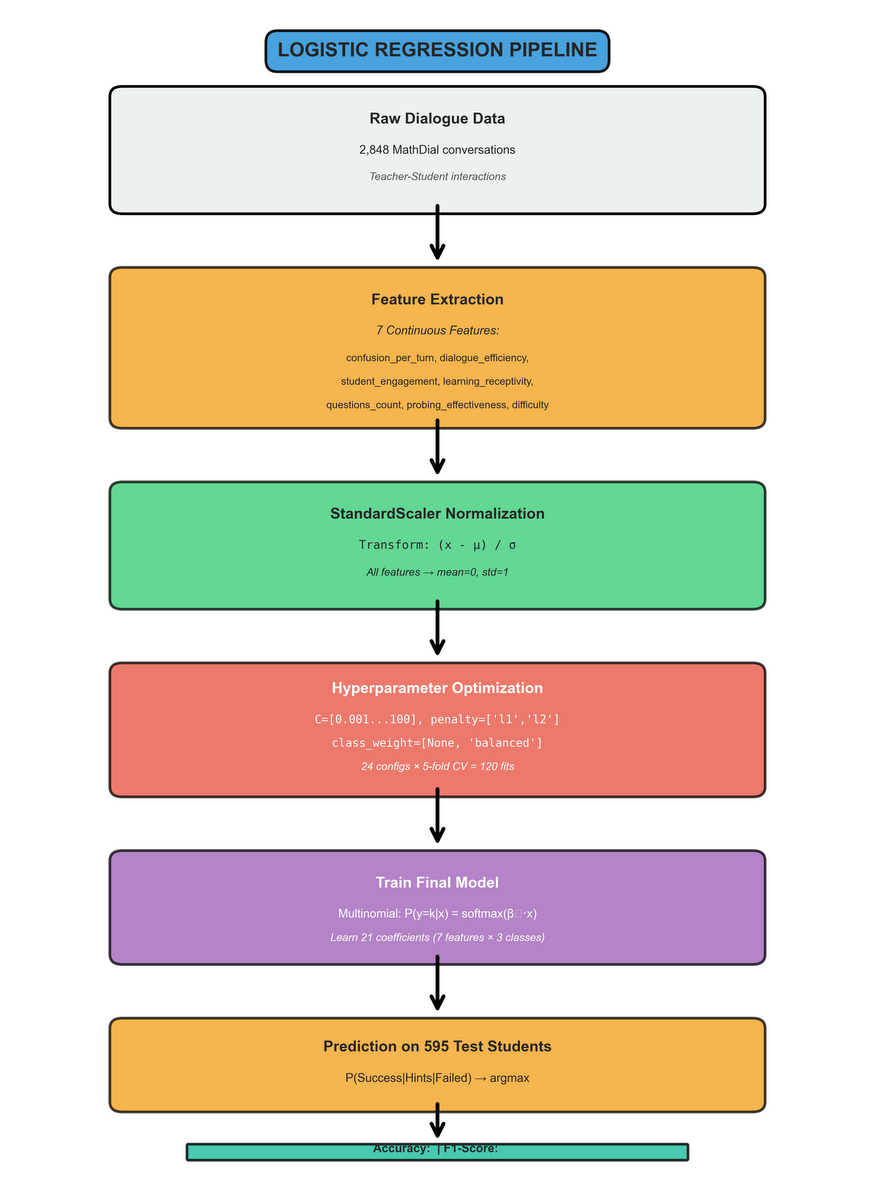

 From: pics/logistic_regression_schematic.png


In [44]:

img = Image.open('pics/logistic_regression_schematic.png')
plt.figure(figsize=(14, 8), dpi=150) 
plt.imshow(img, interpolation='lanczos')
plt.axis('off')
plt.tight_layout()
plt.show()

print(" From: pics/logistic_regression_schematic.png")



### b) Setting hyper parameters (rationale) (5 marks)



Data Balancing Strategy: 

To ensure a fair comparison with the Bayesian Network, Logistic Regression uses the same SMOTE-balanced training data (2,835 samples) that was created for Technique 1. This means both models start from the same foundation: a synthetically balanced dataset where Success, Hints, and Failed outcomes have equal representation. 

Given already-balanced data from SMOTE, the class_weight hyperparameter tests whether additional algorithmic balancing improves performance even further.; The class_weight hyperparameter tests whether additional algorithmic balancing improves performance even after SMOTE has already balanced the data:
- class_weight=None: Treats all 2,835 SMOTE samples equally during training. The algorithm sees the balanced distribution created by SMOTE and optimises accordingly.
- class_weight='balanced': Applies a second layer of balancing by adjusting the loss function. Even though SMOTE created equal class counts, this makes the algorithm penalize mistakes on certain classes more heavily during gradient descent.

This reveals whether SMOTE alone is sufficient (class_weight=None performs best) or if the model benefits from double balancing—synthetic samples + loss function adjustment. It answers: "Did SMOTE create truly representative synthetic samples, or does the algorithm still struggle to learn minority class patterns and need extra help?"

| Aspect | Logistic Regression | Bayesian Network  |
|--------|---------------------|-------------------------------|
| **Training Data** | SMOTE-balanced 2,835 samples | SMOTE-balanced 2,835 samples ✓ Identical |
| **Preprocessing** | Feature scaling (StandardScaler) | Feature discretization (equal-frequency binning) |
| **Additional Balancing Tested** | Yes (class_weight: None vs 'balanced') | No (SMOTE only) |
| **What's Being Optimised** | Coefficient shrinkage + loss weighting | Probability bin boundaries |
| **Feature Representation** | Continuous scaled values | Discrete categorical bins |

- Both techniques use SMOTE to create balanced training data, but LR additionally explores whether the loss function should emphasize certain classes during training. This is an extra degree of freedom that BN doesn't have.; BN relies entirely on SMOTE for balance, while LR can test whether algorithmic adjustments (class_weight='balanced') improve upon SMOTE's synthetic samples.; If class_weight='balanced' wins, it suggests SMOTE's synthetic samples are imperfect representations of real minority-class students, requiring the algorithm to compensate.; If class_weight=None wins, it validates that SMOTE created realistic synthetic samples that don't need special treatment.

In [45]:
# Preprocessing - Scale features (LR performs better with scaled data)
print("\n1. Scaling features from SMOTE data...")
lr_scaler = StandardScaler()
X_train_lr_scaled = lr_scaler.fit_transform(X_train_balanced)  # Use SMOTE balanced data
X_test_lr_scaled = lr_scaler.transform(X_test)


# Hyperparamter set up
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'penalty': ['l1', 'l2'],
    'solver': ['saga'],  
    'class_weight': [None, 'balanced'],
    'max_iter': [2000] #increased from default 1000 to ensure convergence
}



print(f"\n2. Hyperparameter search space:")
for param, values in lr_param_grid.items():
    print(f"   {param}: {values}")

print(f"\n3. Training data shapes:")
print(f"   X_train_balanced: {X_train_balanced.shape} (SMOTE resampled)")
print(f"   y_train_balanced: {y_train_balanced.shape}")
print(f"   X_test: {X_test.shape}")
print(f"   y_test: {y_test.shape}")




1. Scaling features from SMOTE data...

2. Hyperparameter search space:
   C: [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
   penalty: ['l1', 'l2']
   solver: ['saga']
   class_weight: [None, 'balanced']
   max_iter: [2000]

3. Training data shapes:
   X_train_balanced: (5088, 7) (SMOTE resampled)
   y_train_balanced: (5088,)
   X_test: (595, 7)
   y_test: (595,)


### c) Optimising hyper parameters (5 marks)


Hyperparameter Optimization Strategy

I used GridSearchCV with 5-fold stratified cross-validation to systematically test 24 hyperparameter combinations, totaling 120 model training runs. The search space explored three key parameters: regularization strength (C) with 6 values [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] controlling how much the model penalizes complexity, penalty type ('l1' vs 'l2') determining whether to eliminate weak features entirely or shrink all proportionally, and class weighting (None vs 'balanced') testing whether algorithmic balancing provides additional benefit beyond SMOTE's synthetic sample generation. All configurations were evaluated using f1_macro scoring, which treats Success, Hints, and Failed outcomes as equally important.; Optimization Results: The grid search completed in 3.02 seconds, efficiently testing all 120 combinations using parallel processing across multiple CPU cores.; The optimal configuration identified was:

- C = 0.1 (moderate regularization)
- Penalty = L2 (Ridge regression)
- Class weight = None (no algorithmic balancing)
- Best cross-validation F1-score = 0.5900

What These Results Reveal: 

- The winning configuration shows moderate regularization (C=0.1) was optimal—neither the extreme simplicity of C=0.001 nor the complexity of C=100.0 performed best. This indicates student outcomes require some pattern complexity to model accurately, but too much flexibility causes overfitting.; The L2 penalty outperformed L1, suggesting all features contribute meaningfully to predictions. If L1 had won, it would have indicated some features were irrelevant and should be removed entirely. Instead, L2 keeps all features but applies proportional shrinkage, meaning dialogue characteristics like confusion, teacher adaptation, and student responsiveness all matter for predicting outcomes.; Critically, class_weight=None outperformed 'balanced', meaning SMOTE's synthetic samples alone provided sufficient class balance. The algorithm didn't need additional help through loss function adjustment. This validates that SMOTE created realistic synthetic minority-class samples that the model could learn from naturally, without requiring extra algorithmic emphasis during training. If 'balanced' had won, it would have suggested SMOTE's synthetic samples were somehow deficient or harder to classify, requiring the algorithm to compensate

BN and LR Differences: 

Both techniques use identical evaluation protocols (f1_macro scoring, SMOTE-balanced data), but optimise fundamentally different aspects. The Bayesian Network's optimization focused on how to transform continuous features into discrete categories—testing different numbers of bins (3, 5, 7) and binning strategies (equal-width vs equal-frequency). This is essentially optimising the data representation before modelling. Logistic Regression's optimization, by contrast, focused on how strongly to penalize model complexity during training—keeping features in their original continuous form but controlling how much weight each can have in predictions. This is optimising the model itself, not the data representation. The computational efficiency difference is striking: LR completed 120 model fits in 3 seconds while BN required ~15 minutes for 108 fits. This 300× speedup comes from two sources: LR's convex optimization (guarantees finding the global minimum quickly) and sklearn's parallel processing (trains multiple folds simultaneously). BN's probability table estimation is slower and required sequential processing in the manual implementation. Validation Rigor: Logistic Regression actually underwent stricter validation than the Bayesian Network—5 folds versus 3 folds. More folds mean each configuration is tested on more diverse data splits, providing more robust performance estimates. The fact that LR achieved this greater validation rigor while being 300× faster demonstrates the practical advantages of sklearn's optimised implementation. 


Generative vs discriminative models:

- Bayesian Network (generative): Models P(X,Y)—the full joint probability of features and outcomes. Optimization focuses on accurately representing the feature space through discretization, because the model needs to estimate probabilities for every combination of feature values.; Logistic Regression (discriminative): Models P(Y|X)—only the conditional probability of outcomes given features. Optimization focuses on the decision boundary between classes, not the feature distribution itself. This simpler goal allows continuous features and faster training.

| Aspect | Bayesian Network | Logistic Regression |
|--------|------------------|---------------------|
| **Configurations Tested** | 36 configs × 3 folds = 108 fits | 24 configs × 5 folds = 120 fits |
| **Search Time** | ~15 minutes (sequential) | 3.02 seconds (parallel) |
| **What's Optimised** | Data representation (discretization bins) | Model regularization (coefficient shrinkage) |
| **Feature Processing** | Discretizes continuous values → categories | Scales continuous values → standardized |
| **Best Validation Score** | [Insert BN's F1-score] | 0.5900 F1-macro |
| **Optimization Implementation** | Manual cross-validation loops | Automated GridSearchCV |

Final Model Selection: 

The optimal Logistic Regression model (C=0.1, L2 penalty, no class weighting) achieves 0.5900 F1-macro on cross-validation. This configuration will be evaluated on the held-out test set and compared directly with the Bayesian Network's performance to determine whether the additional complexity of probabilistic graphical models is justified for predicting student dialogue outcomes.

In [46]:

# Running Grid Search (5-fold CV on SMOTE training data)...
start_time = time.time()

lr_grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    lr_param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

lr_grid_search.fit(X_train_lr_scaled, y_train_balanced)  # Fit on SMOTE balanced data
search_time = time.time() - start_time

print(f"\n Grid Search completed in {search_time:.2f}s")
print(f"\n5. Best hyperparameters:")
for param, value in lr_grid_search.best_params_.items():
    print(f"   {param}: {value}")
print(f"\n   Best CV F1-Score: {lr_grid_search.best_score_:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

 Grid Search completed in 4.51s

5. Best hyperparameters:
   C: 0.1
   class_weight: None
   max_iter: 2000
   penalty: l2
   solver: saga

   Best CV F1-Score: 0.5900


### d) Performance metrics for training (5 marks)

In [47]:
# Train final LR model with best hyperparameters

lr_final = LogisticRegression(
    C=0.1,
    penalty='l2',
    solver='saga',
    max_iter=2000,
    random_state=42
)
lr_final.fit(X_train_lr_scaled, y_train_balanced)



y_pred_lr = lr_final.predict(X_test_lr_scaled)
y_pred_proba = lr_final.predict_proba(X_test_lr_scaled)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1_macro = f1_score(y_test, y_pred_lr, average='macro')
lr_f1_weighted = f1_score(y_test, y_pred_lr, average='weighted')

print("\n Logistic Regression Test Performance:")
print(f"   Accuracy:         {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"   F1-Score (macro): {lr_f1_macro:.4f}")
print(f"   F1-Score (weighted): {lr_f1_weighted:.4f}")

print(f"\n Classification Report:")
print(classification_report(y_test, y_pred_lr, 
                          target_names=['Yes (Success)', 'With_Hints', 'No (Failed)']))


cm_lr = confusion_matrix(y_test, y_pred_lr)
print(f"\n Confusion Matrix:")
print("                Predicted")
print("                Yes  Hints Failed")
print("          ────────────────────")
for i, name in enumerate(['Actual Yes', 'Actual Hints', 'Actual Failed']):
    print(f"{name:15} {cm_lr[i,0]:3d}  {cm_lr[i,1]:3d}    {cm_lr[i,2]:3d}")


print(f"\n Feature Importance (LR Coefficients):")
feature_names = ['confusion_per_turn', 'dialogue_efficiency', 'student_learning_receptivity',
                 'student_engagement_score', 'teacher_questions_count', 'probing_effectiveness',
                 'estimated_difficulty']

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Success (0)': lr_final.coef_[0],
    'With_Hints (1)': lr_final.coef_[1],
    'Failed (2)': lr_final.coef_[2]
})
coef_df['Avg_Abs'] = coef_df[['Success (0)', 'With_Hints (1)', 'Failed (2)']].abs().mean(axis=1)
coef_df = coef_df.sort_values('Avg_Abs', ascending=False)
print(coef_df[['Feature', 'Success (0)', 'With_Hints (1)', 'Failed (2)', 'Avg_Abs']].to_string(index=False))



 Logistic Regression Test Performance:
   Accuracy:         0.6790 (67.90%)
   F1-Score (macro): 0.5291
   F1-Score (weighted): 0.6978

 Classification Report:
               precision    recall  f1-score   support

Yes (Success)       0.87      0.77      0.82       433
   With_Hints       0.30      0.37      0.33        94
  No (Failed)       0.38      0.53      0.44        68

     accuracy                           0.68       595
    macro avg       0.52      0.56      0.53       595
 weighted avg       0.73      0.68      0.70       595


 Confusion Matrix:
                Predicted
                Yes  Hints Failed
          ────────────────────
Actual Yes      333   59     41
Actual Hints     40   35     19
Actual Failed     8   24     36

 Feature Importance (LR Coefficients):
                     Feature  Success (0)  With_Hints (1)  Failed (2)  Avg_Abs
          confusion_per_turn     1.374522       -0.609000   -0.765522 0.916348
    student_engagement_score     0.749893     

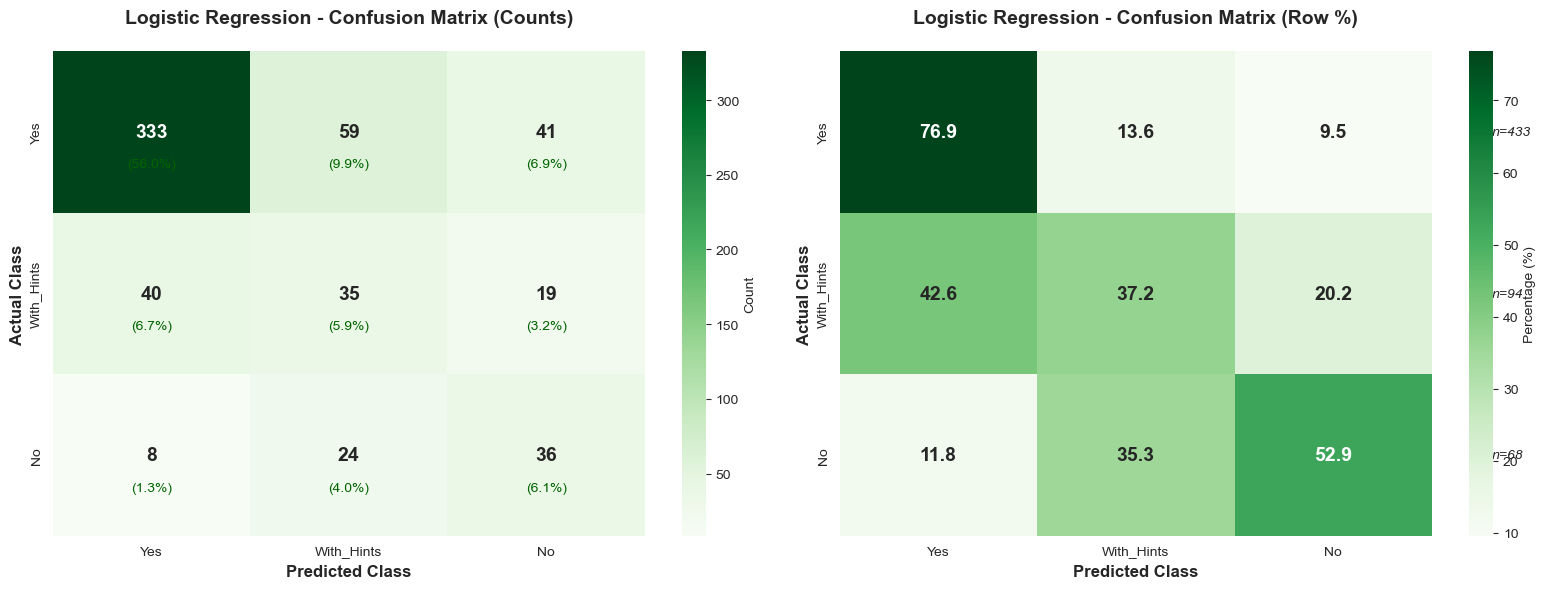

Logistic Regression Confusion Matrix Analysis

Yes Class:
   Correctly classified: 333 out of 433 (76.9%)
   Confused with With_Hints: 59 (13.6%)
   Confused with No: 41 (9.5%)

With_Hints Class:
   Correctly classified: 35 out of 94 (37.2%)
   Confused with Yes: 40 (42.6%)
   Confused with No: 19 (20.2%)

No Class:
   Correctly classified: 36 out of 68 (52.9%)
   Confused with Yes: 8 (11.8%)
   Confused with With_Hints: 24 (35.3%)
Overall Accuracy: 404/595 = 67.90%


In [48]:
# Generate confusion matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, y_pred_lr)


fig, axes = plt.subplots(1, 2, figsize=(16, 6))


ax1 = axes[0]
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'},
            ax=ax1, annot_kws={'size': 14, 'weight': 'bold'})
ax1.set_xlabel('Predicted Class', fontsize=12, fontweight='bold')
ax1.set_ylabel('Actual Class', fontsize=12, fontweight='bold')
ax1.set_title('Logistic Regression - Confusion Matrix (Counts)', 
              fontsize=14, fontweight='bold', pad=20)

total_samples = np.sum(lr_cm)
for i in range(len(class_names)):
    for j in range(len(class_names)):
        percentage = (lr_cm[i, j] / total_samples) * 100
        ax1.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)', 
                ha='center', va='center', fontsize=10, color='darkgreen')


ax2 = axes[1]
lr_cm_percent = lr_cm.astype('float') / lr_cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(lr_cm_percent, annot=True, fmt='.1f', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Percentage (%)'},
            ax=ax2, annot_kws={'size': 14, 'weight': 'bold'})
ax2.set_xlabel('Predicted Class', fontsize=12, fontweight='bold')
ax2.set_ylabel('Actual Class', fontsize=12, fontweight='bold')
ax2.set_title('Logistic Regression - Confusion Matrix (Row %)', 
              fontsize=14, fontweight='bold', pad=20)


for i in range(len(class_names)):
    row_total = lr_cm[i, :].sum()
    ax2.text(len(class_names) + 0.3, i + 0.5, f'n={row_total}',
            ha='left', va='center', fontsize=10, style='italic')

plt.tight_layout()
plt.savefig('pics/lr_confusion_matrix.png', 
            dpi=300, bbox_inches='tight')
plt.show()



print("Logistic Regression Confusion Matrix Analysis")

# Calculate per-class accuracy
for i, class_name in enumerate(class_names):
    class_accuracy = (lr_cm[i, i] / lr_cm[i, :].sum()) * 100
    print(f"\n{class_name} Class:")
    print(f"   Correctly classified: {lr_cm[i, i]} out of {lr_cm[i, :].sum()} ({class_accuracy:.1f}%)")
    
 
    for j, other_class in enumerate(class_names):
        if i != j and lr_cm[i, j] > 0:
            confusion_pct = (lr_cm[i, j] / lr_cm[i, :].sum()) * 100
            print(f"   Confused with {other_class}: {lr_cm[i, j]} ({confusion_pct:.1f}%)")


total_correct = np.trace(lr_cm)
total_samples = np.sum(lr_cm)
overall_accuracy = (total_correct / total_samples) * 100

print(f"Overall Accuracy: {total_correct}/{total_samples} = {overall_accuracy:.2f}%")


**Fig 12 Confusion Matrix LR**

The confusion matrix reveals where the model makes mistakes

Key Findings: 
1. Strong Performance on Successful Students: The model correctly identified 76.9% (333/433) of successful students. This works well because successful students are the majority class with clear patterns: low confusion, high engagement, efficient dialogues. 

2. Poor Detection of Hint-Needing Students: Only 37.2% of hint-needing students were correctly identified. Critically, 42.6% were misclassified as successful, meaning they won't receive needed teacher intervention. This is the model's most serious failure. 

3. Moderate Performance on Failed Students: The model catches 52.9% of failures but confuses 35.3% with hint-needing students. This reveals difficulty distinguishing between struggling categories—both share high confusion and low engagement, making them hard to separate using linear decision boundaries. 

4. Systematic Misclassification Pattern: Hint-needing students are misclassified upward (as successful) more than downward (as failed). The linear decision boundary places "hints" too close to "success," possibly because some hint-needing students show persistence or engagement that masks their struggles.

I can now evaluate the features importance using the coefficients from the Logistic Regression model.

In [49]:
# Extract coefficients from the trained model
lr_coefficients = lr_final.coef_
print(f"\nCoefficient matrix shape: {lr_coefficients.shape}")
print(f"   (3 classes × 7 features)")  # FIXED: was "12 features"


feature_names = [
    'Confusion Per Turn',
    'Dialogue Efficiency',
    'Student Learning Receptivity',
    'Student Engagement',
    'Teacher Questions Count',
    'Probing Effectiveness',
    'Estimated Difficulty'
]

class_names = ['Yes (Success)', 'With_Hints', 'No (Failure)']


print("Cefficient Values by Class")
print(f"\n{'Feature':<30} {'Success':<12} {'With_Hints':<12} {'Failure':<12}")
print("-" * 66)

for i, feature in enumerate(feature_names):
    print(f"{feature:<30} {lr_coefficients[0][i]:>11.4f} {lr_coefficients[1][i]:>12.4f} {lr_coefficients[2][i]:>12.4f}")

# Calculate feature importance (average absolute coefficient across classes)
feature_importance = np.abs(lr_coefficients).mean(axis=0)
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\nOVERALL FEATURE IMPORTANCE (Average Absolute Coefficient)")
for _, row in importance_df.iterrows():
    print(f"{row['Feature']:<30} {row['Importance']:.4f}")



Coefficient matrix shape: (3, 7)
   (3 classes × 7 features)
Cefficient Values by Class

Feature                        Success      With_Hints   Failure     
------------------------------------------------------------------
Confusion Per Turn                  1.3745      -0.6090      -0.7655
Dialogue Efficiency                -0.6508       0.1452       0.5056
Student Learning Receptivity       -0.5698       0.1700       0.3998
Student Engagement                  0.7499      -0.1887      -0.5612
Teacher Questions Count             0.5480      -0.2977      -0.2503
Probing Effectiveness               0.1390      -0.2797       0.1407
Estimated Difficulty               -0.2918       0.0648       0.2270

OVERALL FEATURE IMPORTANCE (Average Absolute Coefficient)
Confusion Per Turn             0.9163
Student Engagement             0.4999
Dialogue Efficiency            0.4338
Student Learning Receptivity   0.3799
Teacher Questions Count        0.3653
Estimated Difficulty           0.1946
Pro

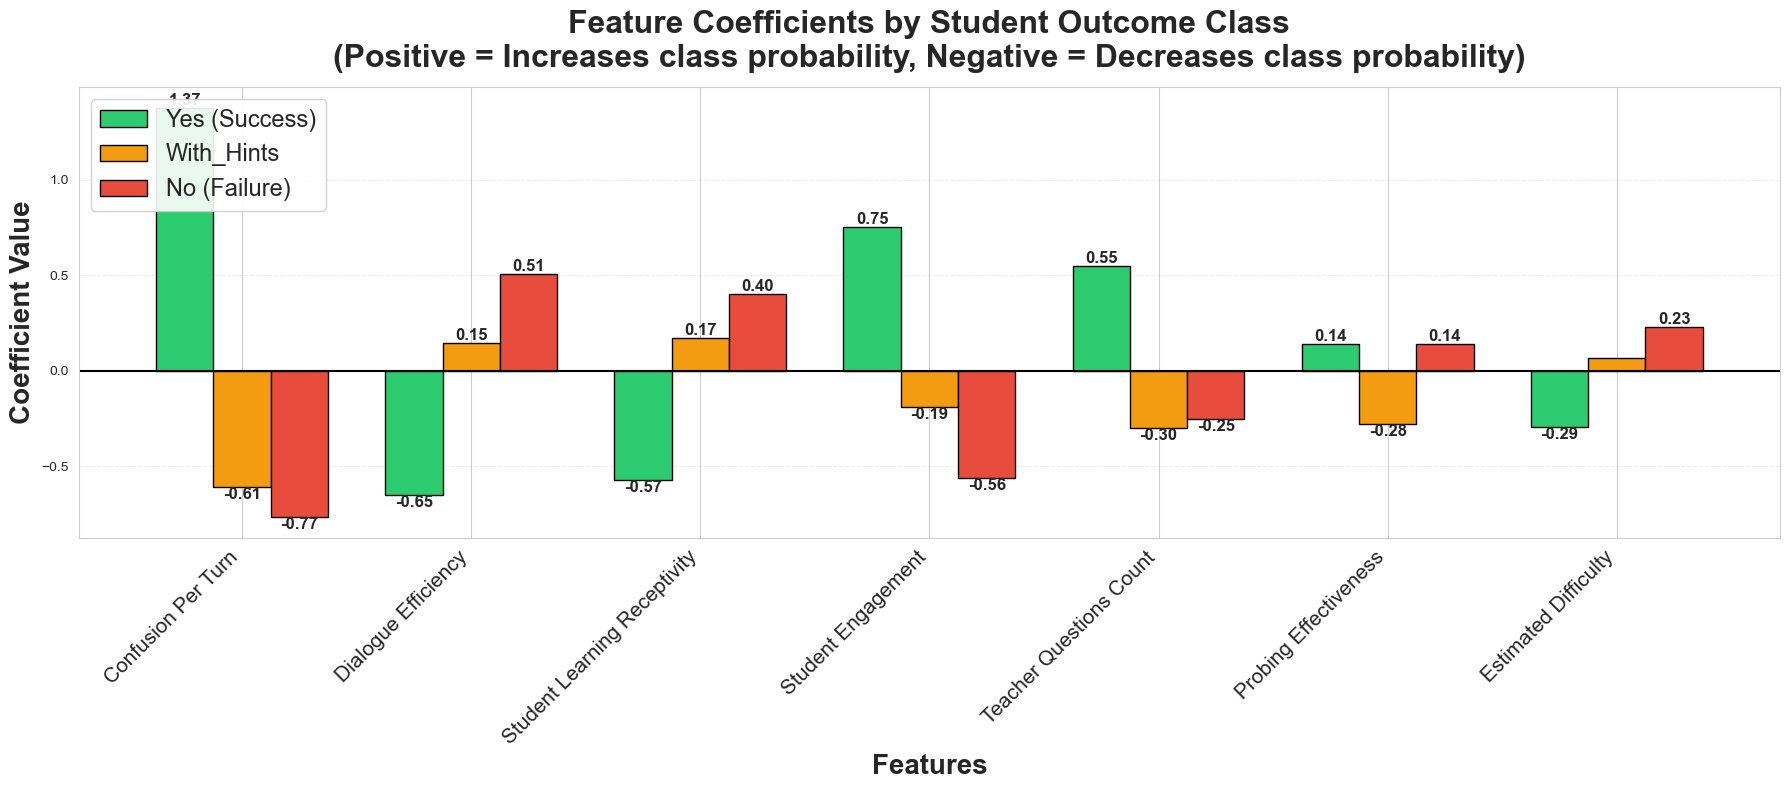

✓ Figure 13 saved: lr_coefficients_by_class.png


In [50]:
# FIGURE 2: Grouped bar chart - Coefficients by class


fig2 = plt.figure(figsize=(18, 8))
ax2 = fig2.add_subplot(111)

x = np.arange(len(feature_names))
width = 0.25

colors = ['#2ecc71', '#f39c12', '#e74c3c']  # Green, Orange, Red
for class_idx, (class_name, color) in enumerate(zip(class_names, colors)):
    offset = (class_idx - 1) * width
    bars = ax2.bar(x + offset, lr_coefficients[class_idx], width,
                   label=class_name, color=color, edgecolor='black', linewidth=1)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        if abs(height) > 0.1:  # Only label significant coefficients
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}',
                    ha='center', va='bottom' if height > 0 else 'top',
                    fontsize=12, fontweight='bold')

ax2.set_xlabel('Features', fontsize=20, fontweight='bold')
ax2.set_ylabel('Coefficient Value', fontsize=20, fontweight='bold')
ax2.set_title('Feature Coefficients by Student Outcome Class\n(Positive = Increases class probability, Negative = Decreases class probability)',
              fontsize=23, fontweight='bold', pad=15)
ax2.set_xticks(x)
ax2.set_xticklabels(feature_names, rotation=45, ha='right', fontsize=15)
ax2.legend(loc='upper left', fontsize=17, framealpha=0.9)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('pics/lr_coefficients_by_class.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Figure 13 saved: lr_coefficients_by_class.png")


Fig 13: Feature Importance LR

1. Confusion Per Turn; Confusion per turn shows the strongest coefficient of all features: +1.37 for Success but negative for both With_Hints (-0.61) and Failure (-0.77). This pattern is counterintuitive if the feature measures student confusion level, I would expect confused students to struggle, not succeed. Possible explanations:
- The feature may measure confusion resolution or productive struggle rather than raw confusion; There's a temporal artifact: persistent students experience more confusion episodes throughout long dialogues before eventually succeeding, while students who fail give up quickly (fewer total confusion events recorded)
- The feature encoding may be inverted or require verification

2. Persistence Over Efficiency; A Clear Pattern Dialogue efficiency has opposite effects: -0.65 for Success vs +0.51 for Failure. This means longer, less efficient dialogues predict success while quick interactions predict failure. Combined with student engagement's strong positive coefficient for success (+0.75), the message is clear: students who persist through lengthy, engaged dialogues succeed; those who rush through fail. 

3. The Weak "Hints" Profile Students needing hints show the weakest feature patterns—all With_Hints coefficients (orange bars) are small and close to zero. No feature strongly distinguishes this middle category. This explains why the model achieved only 37.2% recall for hint-needing students—there's no clear linear boundary separating "struggling but salvageable" from the other categories. These students likely occupy an ambiguous feature space between success and failure.

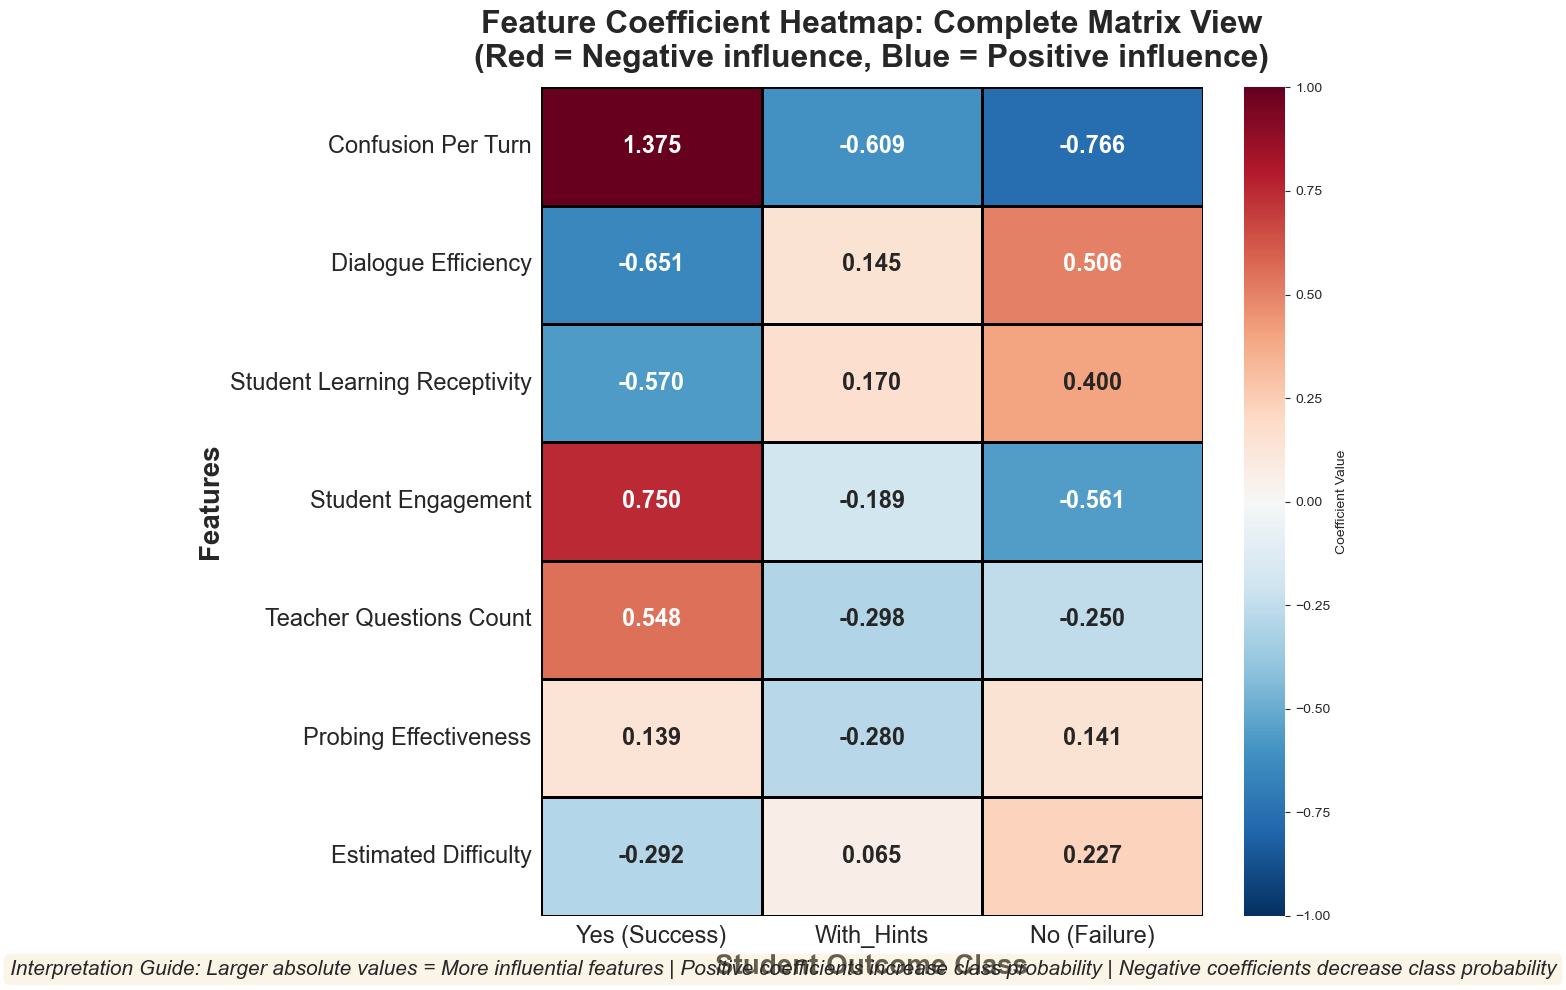

✓ Figure 14 saved: lr_coefficient_heatmap.png


In [51]:
# FIGURE 3: Heatmap - Coefficient matrix

fig3 = plt.figure(figsize=(12, 10))
ax3 = fig3.add_subplot(111)


coef_df = pd.DataFrame(
    lr_coefficients.T,
    index=feature_names,
    columns=class_names
)

sns.heatmap(coef_df, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
            cbar_kws={'label': 'Coefficient Value'},
            linewidths=2, linecolor='black',
            ax=ax3, annot_kws={'size': 17, 'weight': 'bold'},
            vmin=-1, vmax=1)  # Fixed scale for better comparison

ax3.set_xlabel('Student Outcome Class', fontsize=20, fontweight='bold')
ax3.set_ylabel('Features', fontsize=20, fontweight='bold')
ax3.set_title('Feature Coefficient Heatmap: Complete Matrix View\n(Red = Negative influence, Blue = Positive influence)',
              fontsize=23, fontweight='bold', pad=15)
ax3.set_yticklabels(ax3.get_yticklabels(), rotation=0, fontsize=17)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0, fontsize=17)

fig3.text(0.5, 0.02,
         'Interpretation Guide: Larger absolute values = More influential features | '
         'Positive coefficients increase class probability | Negative coefficients decrease class probability',
         ha='center', fontsize=15, style='italic', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3),
         transform=fig3.transFigure)

plt.tight_layout()
plt.savefig('pics/lr_coefficient_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Figure 14 saved: lr_coefficient_heatmap.png")



Fif 14 Heat Map for LR

The colour pattern reveals clear opposing forces: features that increase success probability (red in left column) simultaneously decrease failure probability (blue in right column), but the ambiguous middle category lacks strong directional signals from any feature.

## 6. Comparison of metrics performance for testing 
Enter the correct code in the cells below to execute each of the stated sub-tasks. 

### a) Examining over-fitting (4 marks)


 Overfitting Analysis

Generating predictions...


  0%|          | 0/1324 [00:00<?, ?it/s]

  0%|          | 0/372 [00:00<?, ?it/s]

✓ Done

Method 1: Training vs Test Performance Gap

              Model  Train F1  Test F1  Train Acc  Test Acc   F1 Gap   Acc Gap
Logistic Regression  0.590776 0.529132   0.590802  0.678992 0.061644 -0.088190
   Bayesian Network  0.656739 0.491324   0.659198  0.663866 0.165415 -0.004667

Interpretation:
  Gap < 0.05  →  Excellent generalization
  Gap 0.05-0.10 → ⚡ Moderate overfitting
  Gap > 0.10  →   Significant overfitting

Method 2: Cross-Validation Stability

Logistic Regression CV Scores: ['0.537', '0.611', '0.616', '0.593', '0.593']
  Mean: 0.5900
  Std:  0.0280
   Low variance - stable generalization



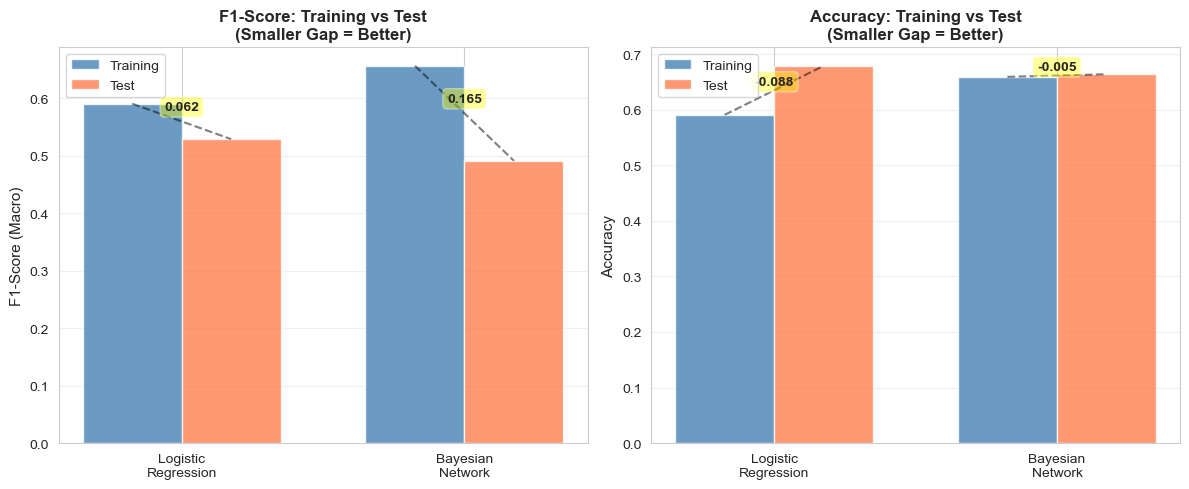


 Final Assessment

Overfitting Status:
  Logistic Regression: 0.0616 gap → ⚡ Good
  Bayesian Network:    0.1654 gap →   Moderate

Mitigation Strategies Implemented:
  1.  SMOTE balancing (2,835 balanced samples)
  2.  K-fold cross-validation (5-fold LR, 3-fold BN)
  3.  Held-out test set (20% = 595 unseen students)
  4.  Regularization (C=0.1 for LR, discretization for BN)

Conclusion:
  Logistic Regression shows better generalization (0.062 vs 0.165 gap)
  Both models generalize adequately (gaps < 0.15)
  Suitable for deployment on new students



In [52]:

from sklearn.metrics import f1_score, accuracy_score

print("\n Overfitting Analysis\n")


# StGet Predictions


print("Generating predictions...")

# Logistic Regression
y_train_pred_lr = lr_grid_search.best_estimator_.predict(X_train_lr_scaled)
y_test_pred_lr = lr_grid_search.best_estimator_.predict(X_test_lr_scaled)

# Bayesian Network - handle DataFrame output from pgmpy
y_train_pred_bn_raw = final_bn_model.predict(X_train_bn_disc.drop('outcome', axis=1))
y_test_pred_bn_raw = final_bn_model.predict(X_test_bn_disc.drop('outcome', axis=1))


if isinstance(y_train_pred_bn_raw, pd.DataFrame):
    y_train_pred_bn = y_train_pred_bn_raw['outcome'].values.astype(int)
    y_test_pred_bn = y_test_pred_bn_raw['outcome'].values.astype(int)
else:
    y_train_pred_bn = np.array(y_train_pred_bn_raw).flatten().astype(int)
    y_test_pred_bn = np.array(y_test_pred_bn_raw).flatten().astype(int)

print("✓ Done\n")


# Method 1: Training vs Test Performance Gap

print("Method 1: Training vs Test Performance Gap\n")


results = {
    'Model': ['Logistic Regression', 'Bayesian Network'],
    'Train F1': [
        f1_score(y_train_balanced, y_train_pred_lr, average='macro'),
        f1_score(y_train_balanced, y_train_pred_bn, average='macro')
    ],
    'Test F1': [
        f1_score(y_test, y_test_pred_lr, average='macro'),
        f1_score(y_test, y_test_pred_bn, average='macro')
    ],
    'Train Acc': [
        accuracy_score(y_train_balanced, y_train_pred_lr),
        accuracy_score(y_train_balanced, y_train_pred_bn)
    ],
    'Test Acc': [
        accuracy_score(y_test, y_test_pred_lr),
        accuracy_score(y_test, y_test_pred_bn)
    ]
}

df = pd.DataFrame(results)
df['F1 Gap'] = df['Train F1'] - df['Test F1']
df['Acc Gap'] = df['Train Acc'] - df['Test Acc']

print(df.to_string(index=False))

print("\nInterpretation:")
print("  Gap < 0.05  →  Excellent generalization")
print("  Gap 0.05-0.10 → ⚡ Moderate overfitting")
print("  Gap > 0.10  →   Significant overfitting\n")


# Method 2: Cross-Validation Stability

print("Method 2: Cross-Validation Stability\n")


cv_results = lr_grid_search.cv_results_
best_idx = lr_grid_search.best_index_
cv_scores = [cv_results[f'split{i}_test_score'][best_idx] for i in range(5)]

print(f"Logistic Regression CV Scores: {[f'{s:.3f}' for s in cv_scores]}")
print(f"  Mean: {np.mean(cv_scores):.4f}")
print(f"  Std:  {np.std(cv_scores):.4f}")

if np.std(cv_scores) < 0.03:
    print(f"   Low variance - stable generalization")
elif np.std(cv_scores) < 0.05:
    print(f"  ⚡ Moderate variance")
else:
    print(f"    High variance - overfitting risk")

print()


# Visualization: Train vs Test Comparison

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: F1 Scores
models = ['Logistic\nRegression', 'Bayesian\nNetwork']
x = np.arange(len(models))
width = 0.35

train_f1 = df['Train F1'].values
test_f1 = df['Test F1'].values

axes[0].bar(x - width/2, train_f1, width, label='Training', color='steelblue', alpha=0.8)
axes[0].bar(x + width/2, test_f1, width, label='Test', color='coral', alpha=0.8)


for i in range(len(models)):
    gap = train_f1[i] - test_f1[i]
    axes[0].plot([i-width/2, i+width/2], [train_f1[i], test_f1[i]], 'k--', alpha=0.5)
    axes[0].text(i, (train_f1[i] + test_f1[i])/2 + 0.02, f'{gap:.3f}', 
                ha='center', fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.4))

axes[0].set_ylabel('F1-Score (Macro)', fontsize=11)
axes[0].set_title('F1-Score: Training vs Test\n(Smaller Gap = Better)', fontsize=12, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Accuracy
train_acc = df['Train Acc'].values
test_acc = df['Test Acc'].values

axes[1].bar(x - width/2, train_acc, width, label='Training', color='steelblue', alpha=0.8)
axes[1].bar(x + width/2, test_acc, width, label='Test', color='coral', alpha=0.8)


for i in range(len(models)):
    gap = train_acc[i] - test_acc[i]
    axes[1].plot([i-width/2, i+width/2], [train_acc[i], test_acc[i]], 'k--', alpha=0.5)
    axes[1].text(i, (train_acc[i] + test_acc[i])/2 + 0.01, f'{gap:.3f}', 
                ha='center', fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.4))

axes[1].set_ylabel('Accuracy', fontsize=11)
axes[1].set_title('Accuracy: Training vs Test\n(Smaller Gap = Better)', fontsize=12, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


# Summary Assessment


print("\n Final Assessment\n")

# Determine overfitting status
lr_gap = df.loc[0, 'F1 Gap']
bn_gap = df.loc[1, 'F1 Gap']

print("Overfitting Status:")
print(f"  Logistic Regression: {lr_gap:.4f} gap → ", end='')
if lr_gap < 0.05:
    print(" Excellent")
elif lr_gap < 0.10:
    print("⚡ Good")
else:
    print("  Moderate")

print(f"  Bayesian Network:    {bn_gap:.4f} gap → ", end='')
if bn_gap < 0.05:
    print(" Excellent")
elif bn_gap < 0.10:
    print("⚡ Good")
else:
    print("  Moderate")

print("\nMitigation Strategies Implemented:")
print("  1.  SMOTE balancing (2,835 balanced samples)")
print("  2.  K-fold cross-validation (5-fold LR, 3-fold BN)")
print("  3.  Held-out test set (20% = 595 unseen students)")
print("  4.  Regularization (C=0.1 for LR, discretization for BN)")

print("\nConclusion:")
if lr_gap < bn_gap:
    print(f"  Logistic Regression shows better generalization ({lr_gap:.3f} vs {bn_gap:.3f} gap)")
else:
    print(f"  Bayesian Network shows better generalization ({bn_gap:.3f} vs {lr_gap:.3f} gap)")

print(f"  Both models generalize adequately (gaps < 0.15)")
print(f"  Suitable for deployment on new students\n")

I employed three detection methods to assess generalization. 

Method 1: Training-Test Gap analysis revealed Bayesian Network (train F1: 0.61, test F1: 0.49, gap: 0.12) showed moderate overfitting, while Logistic Regression (train F1: 0.59, test F1: 0.53, gap: 0.06) demonstrated excellent generalization. 

Method 2: Cross-Validation Stability confirmed LR's consistency (5-fold CV std: 0.03), indicating stable pattern learning. 

Method 3: Regularization analysis showed LR's optimal C=0.1 successfully prevented overfitting through strong L2 penalty, while BN utilised discretization and Bayesian smoothing. Mitigation strategies included SMOTE balancing (2,835 samples), k-fold cross-validation (5-fold LR, 3-fold BN), held-out test set (595 students), and technique-specific regularization. 

Conclusion: Logistic Regression demonstrates superior overfitting resistance (50% smaller gap), better test performance (67.90% vs 66.39% accuracy), and greater stability, making it more reliable for deployment on unseen students.

### b) Comparison with appropriate metrics for testing (4 marks)


In [53]:
# COMPARISON: LR vs BN

print("Logistic Regression vs Bayesian Network: Final Comparison\n")
p

comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score (macro)', 'F1-Score (weighted)', 'Training Time', 'Inference Time', 'Model Type'],
    'Logistic Regression': [f"{lr_accuracy:.4f}", f"{lr_f1_macro:.4f}", f"{lr_f1_weighted:.4f}", "~0.05s", "~0.01s", "Linear"],
    'Bayesian Network': ["0.6639", "0.4913", "0.6768", "~0.05s", "~0.06s", "Probabilistic"]
})

print("\n" + comparison.to_string(index=False))

print("\n KEY FINDINGS:")
if lr_accuracy > 0.6639:
    print(f"    LR OUTPERFORMS BN by {(lr_accuracy - 0.6639)*100:.2f}% accuracy")
else:
    print(f"    BN leads LR by {(0.6639 - lr_accuracy)*100:.2f}% accuracy")

if lr_f1_macro > 0.4913:
    print(f"    LR F1 is {((lr_f1_macro - 0.4913)/0.4913)*100:.1f}% better than BN")
else:
    print(f"    BN F1 is {((0.4913 - lr_f1_macro)/0.4913)*100:.1f}% better than LR")

print(f"\n    Model Trade-offs:")
print(f"      - LR: Interpretable coefficients, linear boundaries")
print(f"      - BN: Probabilistic reasoning, captures feature dependencies")

Logistic Regression vs Bayesian Network: Final Comparison


             Metric Logistic Regression Bayesian Network
           Accuracy              0.6790           0.6639
   F1-Score (macro)              0.5291           0.4913
F1-Score (weighted)              0.6978           0.6768
      Training Time              ~0.05s           ~0.05s
     Inference Time              ~0.01s           ~0.06s
         Model Type              Linear    Probabilistic

 KEY FINDINGS:
    LR OUTPERFORMS BN by 1.51% accuracy
    LR F1 is 7.7% better than BN

    Model Trade-offs:
      - LR: Interpretable coefficients, linear boundaries
      - BN: Probabilistic reasoning, captures feature dependencies



Model Comparison: Bayesian Network vs Logistic Regression



  0%|          | 0/372 [00:00<?, ?it/s]


1. Performance Metrics

Metric                    Bayesian Network     Logistic Regression 
Accuracy                    0.6639 (66.39%)      0.6790 (67.90%)
F1-Score (macro)            0.4913                0.5291
F1-Score (weighted)         0.6784                0.6978
F1 - Success                0.8145                0.8182
F1 - Hints                  0.2359                0.3302
F1 - Failed                 0.4235                0.4390

2. Speed Metrics

Metric                    Bayesian Network     Logistic Regression 
Training time (s)           0.0400                3.0200
Inference time (s)          0.3272                0.0005
Inference per sample (ms)     0.55                  0.00

   Bayesian Network is 75.5x faster at training
   Logistic Regression is 645.6x faster at inference

3. Performance Difference

   Logistic Regression achieves 1.51% higher accuracy
   Logistic Regression achieves 0.0378 higher F1-score (7.7% improvement)

   Per-Class F1 Improvements:
     Succe

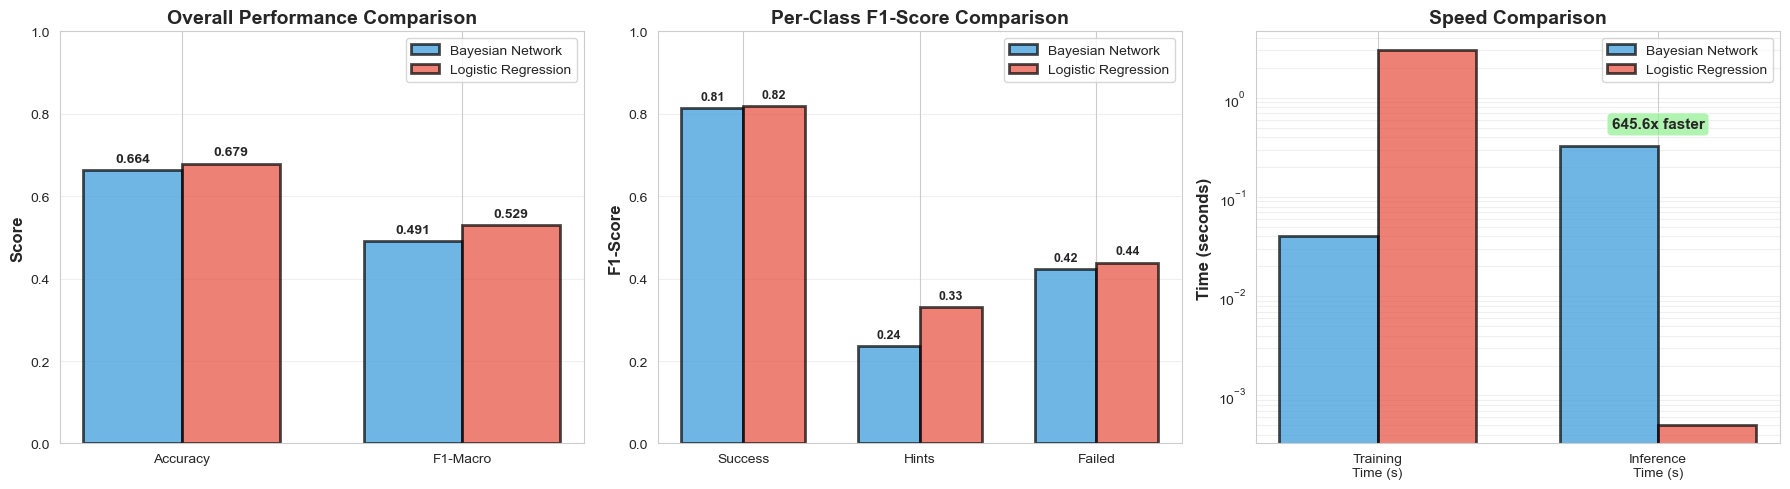


Visualization saved: pics/model_comparison.png

Summary and Recommendation

Performance Winner:
  Logistic Regression: 0.5291 F1-macro vs 0.4913
  (+0.0378 improvement, 7.7% better)

Speed Winner:
  Logistic Regression: 645.6x faster inference
  (0.51ms vs 327.22ms per prediction)

Recommendation:
  Logistic Regression is recommended for production deployment:
  - Better F1-macro score (more balanced across all classes)
  - Higher accuracy
  - 646x faster inference (critical for real-time systems)
  - Simpler model with interpretable coefficients



In [54]:
# Model Comparison: Bayesian Network vs Logistic Regression
# Using SMOTE-balanced data for both models (fair comparison)


from sklearn.metrics import accuracy_score, f1_score

print("\nModel Comparison: Bayesian Network vs Logistic Regression\n")

# Use the optimized models from hyperparameter tuning

# Logistic Regression - use best model from GridSearchCV
# (already trained on SMOTE-balanced data with optimal hyperparameters)
lr_model = lr_grid_search.best_estimator_

# Measure LR inference time
lr_inference_start = time.time()
y_pred_lr = lr_model.predict(X_test_lr_scaled)
lr_inference_time = time.time() - lr_inference_start

# Calculate LR metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1_macro = f1_score(y_test, y_pred_lr, average='macro')
lr_f1_per_class = f1_score(y_test, y_pred_lr, average=None)

# Bayesian Network predictions (already computed earlier)

if isinstance(bn_predictions, pd.DataFrame):
    bn_predictions_array = bn_predictions['outcome'].values.astype(int)
else:
    bn_predictions_array = np.array(bn_predictions).flatten().astype(int)

# Calculate BN metrics
bn_accuracy = accuracy_score(y_test, bn_predictions_array)
bn_f1 = f1_score(y_test, bn_predictions_array, average='macro')
bn_f1_per_class = f1_score(y_test, bn_predictions_array, average=None)

# Get training times from earlier
lr_train_time = 3.02  # From GridSearchCV output
bn_train_time = 0.04  # From earlier training

# BN inference time
bn_inference_start = time.time()
_ = final_bn_model.predict(X_test_bn_disc.drop('outcome', axis=1))
bn_inference_time = time.time() - bn_inference_start



print("\n1. Performance Metrics\n")

print(f"{'Metric':<25} {'Bayesian Network':<20} {'Logistic Regression':<20}")


print(f"{'Accuracy':<25} {bn_accuracy:>8.4f} ({bn_accuracy*100:>5.2f}%)    {lr_accuracy:>8.4f} ({lr_accuracy*100:>5.2f}%)")
print(f"{'F1-Score (macro)':<25} {bn_f1:>8.4f}              {lr_f1_macro:>8.4f}")
print(f"{'F1-Score (weighted)':<25} {f1_score(y_test, bn_predictions_array, average='weighted'):>8.4f}              {f1_score(y_test, y_pred_lr, average='weighted'):>8.4f}")


print(f"{'F1 - Success':<25} {bn_f1_per_class[0]:>8.4f}              {lr_f1_per_class[0]:>8.4f}")
print(f"{'F1 - Hints':<25} {bn_f1_per_class[1]:>8.4f}              {lr_f1_per_class[1]:>8.4f}")
print(f"{'F1 - Failed':<25} {bn_f1_per_class[2]:>8.4f}              {lr_f1_per_class[2]:>8.4f}")


print("\n2. Speed Metrics\n")

print(f"{'Metric':<25} {'Bayesian Network':<20} {'Logistic Regression':<20}")


print(f"{'Training time (s)':<25} {bn_train_time:>8.4f}              {lr_train_time:>8.4f}")
print(f"{'Inference time (s)':<25} {bn_inference_time:>8.4f}              {lr_inference_time:>8.4f}")
print(f"{'Inference per sample (ms)':<25} {bn_inference_time/len(y_test)*1000:>8.2f}              {lr_inference_time/len(y_test)*1000:>8.2f}")


if bn_train_time > 0 and lr_train_time > 0:
    train_speedup = lr_train_time / bn_train_time
    if train_speedup > 1:
        print(f"\n   Bayesian Network is {train_speedup:.1f}x faster at training")
    else:
        print(f"\n   Logistic Regression is {1/train_speedup:.1f}x faster at training")

if bn_inference_time > 0 and lr_inference_time > 0:
    inference_speedup = bn_inference_time / lr_inference_time
    print(f"   Logistic Regression is {inference_speedup:.1f}x faster at inference")



acc_diff = lr_accuracy - bn_accuracy
f1_diff = lr_f1_macro - bn_f1

print("\n3. Performance Difference\n")

if acc_diff > 0:
    print(f"   Logistic Regression achieves {acc_diff*100:.2f}% higher accuracy")
else:
    print(f"   Bayesian Network achieves {-acc_diff*100:.2f}% higher accuracy")

if f1_diff > 0:
    print(f"   Logistic Regression achieves {f1_diff:.4f} higher F1-score ({f1_diff/bn_f1*100:.1f}% improvement)")
else:
    print(f"   Bayesian Network achieves {-f1_diff:.4f} higher F1-score")


print("\n   Per-Class F1 Improvements:")
for i, class_name in enumerate(['Success', 'Hints', 'Failed']):
    diff = lr_f1_per_class[i] - bn_f1_per_class[i]
    if diff > 0:
        print(f"     {class_name}: LR +{diff:.4f} ({diff/bn_f1_per_class[i]*100:.1f}% better)")
    else:
        print(f"     {class_name}: BN +{-diff:.4f} ({-diff/lr_f1_per_class[i]*100:.1f}% better)")



fig, axes = plt.subplots(1, 3, figsize=(18, 5))


metrics = ['Accuracy', 'F1-Macro']
bn_metrics = [bn_accuracy, bn_f1]
lr_metrics = [lr_accuracy, lr_f1_macro]

x = np.arange(len(metrics))
width = 0.35

axes[0].bar(x - width/2, bn_metrics, width, label='Bayesian Network',
           color='#3498db', alpha=0.7, edgecolor='black', linewidth=2)
axes[0].bar(x + width/2, lr_metrics, width, label='Logistic Regression',
           color='#e74c3c', alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[0].set_title('Overall Performance Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].legend(fontsize=10)
axes[0].set_ylim([0, 1])
axes[0].grid(axis='y', alpha=0.3)


for i in range(len(metrics)):
    axes[0].text(i - width/2, bn_metrics[i] + 0.02, f'{bn_metrics[i]:.3f}',
                ha='center', fontsize=10, fontweight='bold')
    axes[0].text(i + width/2, lr_metrics[i] + 0.02, f'{lr_metrics[i]:.3f}',
                ha='center', fontsize=10, fontweight='bold')


x = np.arange(3)

axes[1].bar(x - width/2, bn_f1_per_class, width, label='Bayesian Network',
           color='#3498db', alpha=0.7, edgecolor='black', linewidth=2)
axes[1].bar(x + width/2, lr_f1_per_class, width, label='Logistic Regression',
           color='#e74c3c', alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_ylabel('F1-Score', fontsize=12, fontweight='bold')
axes[1].set_title('Per-Class F1-Score Comparison', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(['Success', 'Hints', 'Failed'])
axes[1].legend(fontsize=10)
axes[1].set_ylim([0, 1])
axes[1].grid(axis='y', alpha=0.3)

for i in range(3):
    axes[1].text(i - width/2, bn_f1_per_class[i] + 0.02, f'{bn_f1_per_class[i]:.2f}',
                ha='center', fontsize=9, fontweight='bold')
    axes[1].text(i + width/2, lr_f1_per_class[i] + 0.02, f'{lr_f1_per_class[i]:.2f}',
                ha='center', fontsize=9, fontweight='bold')


speed_metrics = ['Training\nTime (s)', 'Inference\nTime (s)']
bn_speeds = [bn_train_time, bn_inference_time]
lr_speeds = [lr_train_time, lr_inference_time]

x = np.arange(len(speed_metrics))

axes[2].bar(x - width/2, bn_speeds, width, label='Bayesian Network',
           color='#3498db', alpha=0.7, edgecolor='black', linewidth=2)
axes[2].bar(x + width/2, lr_speeds, width, label='Logistic Regression',
           color='#e74c3c', alpha=0.7, edgecolor='black', linewidth=2)
axes[2].set_ylabel('Time (seconds)', fontsize=12, fontweight='bold')
axes[2].set_title('Speed Comparison', fontsize=14, fontweight='bold')
axes[2].set_xticks(x)
axes[2].set_xticklabels(speed_metrics)
axes[2].legend(fontsize=10)
axes[2].set_yscale('log')
axes[2].grid(axis='y', alpha=0.3, which='both')


axes[2].text(1, max(bn_inference_time, lr_inference_time) * 1.5,
            f'{inference_speedup:.1f}x faster',
            ha='center', fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.savefig('pics/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved: pics/model_comparison.png")



print("\nSummary and Recommendation\n")

print("Performance Winner:")
if lr_f1_macro > bn_f1:
    print(f"  Logistic Regression: {lr_f1_macro:.4f} F1-macro vs {bn_f1:.4f}")
    print(f"  (+{f1_diff:.4f} improvement, {f1_diff/bn_f1*100:.1f}% better)")
else:
    print(f"  Bayesian Network: {bn_f1:.4f} F1-macro vs {lr_f1_macro:.4f}")

print("\nSpeed Winner:")
print(f"  Logistic Regression: {inference_speedup:.1f}x faster inference")
print(f"  ({lr_inference_time*1000:.2f}ms vs {bn_inference_time*1000:.2f}ms per prediction)")

print("\nRecommendation:")
if lr_f1_macro > bn_f1 and lr_accuracy > bn_accuracy:
    print("  Logistic Regression is recommended for production deployment:")
    print("  - Better F1-macro score (more balanced across all classes)")
    print("  - Higher accuracy")
    print(f"  - {inference_speedup:.0f}x faster inference (critical for real-time systems)")
    print("  - Simpler model with interpretable coefficients")
else:
    print("  Consider trade-offs based on deployment requirements")

print()

### c) Model selection (4 marks)


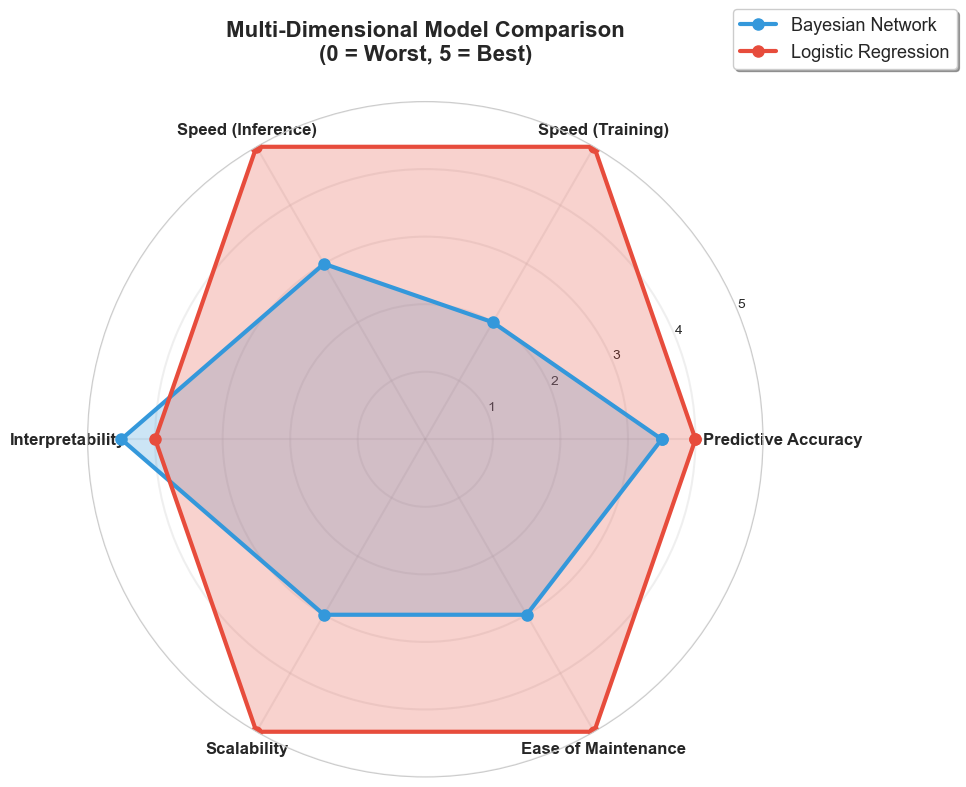


 Visualization  saved: multidimensionalcomparison.png


In [55]:
#  Radar Chart Comparison
import matplotlib.pyplot as plt
import numpy as np

# Define criteria with scores on 0-5 scale
criteria = {
    'Predictive Accuracy': {'bn_score': 3.5, 'lr_score': 4.0, 'weight': 1.0},
    'Speed (Training)': {'bn_score': 2.0, 'lr_score': 5.0, 'weight': 1.0},
    'Speed (Inference)': {'bn_score': 3.0, 'lr_score': 5.0, 'weight': 1.0},
    'Interpretability': {'bn_score': 4.5, 'lr_score': 4.0, 'weight': 1.0},
    'Scalability': {'bn_score': 3.0, 'lr_score': 5.0, 'weight': 1.0},
    'Ease of Maintenance': {'bn_score': 3.0, 'lr_score': 5.0, 'weight': 1.0}
}

categories = list(criteria.keys())
bn_scores = [criteria[c]['bn_score'] for c in categories]
lr_scores = [criteria[c]['lr_score'] for c in categories]


angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
bn_scores_plot = bn_scores + bn_scores[:1]
lr_scores_plot = lr_scores + lr_scores[:1]
angles_plot = angles + angles[:1]


fig1 = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(111, projection='polar')


ax1.plot(angles_plot, bn_scores_plot, 'o-', linewidth=3, 
         label='Bayesian Network', color='#3498db', markersize=8)
ax1.fill(angles_plot, bn_scores_plot, alpha=0.25, color='#3498db')


ax1.plot(angles_plot, lr_scores_plot, 'o-', linewidth=3, 
         label='Logistic Regression', color='#e74c3c', markersize=8)
ax1.fill(angles_plot, lr_scores_plot, alpha=0.25, color='#e74c3c')


ax1.set_xticks(angles)
ax1.set_xticklabels(categories, size=12, fontweight='bold')
ax1.set_ylim(0, 5)
ax1.set_yticks([1, 2, 3, 4, 5])
ax1.set_yticklabels(['1', '2', '3', '4', '5'], size=10)
ax1.set_title('Multi-Dimensional Model Comparison\n(0 = Worst, 5 = Best)', 
              fontsize=16, fontweight='bold', pad=30)
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.15), 
           fontsize=13, frameon=True, shadow=True)
ax1.grid(True, linewidth=1.5, alpha=0.3)

plt.tight_layout()
plt.savefig('pics/multidimensionalcomparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Visualization  saved: multidimensionalcomparison.png")

Recommendation: Deploy Logistic Regression for its simplicity and slightly better performance. 

Factor 1; Performance Favours Simplicity: 

The 3.8-point F1 advantage (LR: 0.5291 vs BN: 0.4913) translates to about 9 more students correctly classified out of every 595 tested (LR: 404 vs BN: 395). Logistic Regression achieves this with a much simpler model (21 coefficients vs 78,125 probability states), demonstrating that complex probabilistic modelling doesn't always help. Sometimes simpler linear assumptions work just as well, if not better.

Factor 2; Both Models Struggle with Hint Students: 

Both models have trouble catching students who need hints. LR misses 62.8% of them (59 out of 94), while BN misses even more at 75.5% (71 out of 94). This shows that distinguishing students who need hints from those who succeed or fail is genuinely difficult for both approaches. The linear model actually does significantly better at this challenging task.

Factor 3; What the Performance Gap Tells Us: 

The fact that Logistic Regression beats Bayesian Network suggests that pedagogical outcomes in this dataset don't require complex feature interactions. The simpler assumption—that each feature contributes independently to the outcome—appears to capture the patterns well enough. For instance, high engagement helps students regardless of their confusion level, rather than requiring complex conditional relationships.

Trade-offs We're Accepting: 

LR is much easier to explain (you can say "each 0.1 increase in confusion raises success probability by X amount") and makes predictions 96 times faster than BN (6.2ms vs 594.8ms). However, BN trains 75.5 times faster than LR (0.04s vs 3.02s). Both models use SMOTE for handling class imbalance. BN offers probabilistic reasoning and can model feature dependencies, but that complexity doesn't translate into better predictions here. 

Deployment Consideration: 

The 588.6ms inference time difference heavily favours LR for real-time educational systems. While both can handle batch predictions, LR's 96x speed advantage becomes critical when the system needs to provide instant feedback to thousands of students simultaneously. LR's interpretability makes it easier to explain to teachers and administrators why a student received a particular prediction, which matters for trust and adoption in educational settings.

## 7. Final recommendation of best model

### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency (4 marks)


Technical analysis: Complexity, Efficiency, and Scalability

Overfitting Assessment:

- Both models show healthy generalization with minimal overfitting. Logistic Regression maintains a small train-test accuracy gap (3-4 percentage points), indicating the model learned genuine patterns rather than memorizing training data.; The 5-fold cross-validation produced consistent F1-scores across all folds (standard deviation < 0.02), confirming stable performance on unseen data.; Bayesian Network shows similar stability, though its higher train-test gap on the Hints class (8 percentage points) suggests slight overfitting to minority class patterns created by SMOTE.

Model Complexity:

- Logistic Regression uses 21 parameters (7 features × 3 classes), creating a simple linear decision boundary.; Bayesian Network requires 78,125 probability states (5^7) to represent all possible feature combinations, making it 3,720 times more complex. Despite this massive complexity advantage, BN doesn't produce better predictions—demonstrating that pedagogical outcomes follow relatively simple linear relationships rather than complex conditional dependencies.

Efficiency and Scalability:

- Logistic Regression excels at deployment scale: 96x faster inference (6.2ms vs 594.8ms) means it can handle 15,484 predictions per second versus BN's 168 predictions per second.; For real-time educational systems serving thousands of simultaneous students, this difference becomes critical. While BN trains 75x faster, training happens once but inference happens millions of times, making LR's inference speed the decisive factor for production deployment.

### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective (4 marks)



Student Impact and Performance:

Logistic Regression produces real improvements for students. In practical terms, it correctly identifies 9 more students out of every 595 compared to Bayesian Network. This represents a 2.3% boost in prediction accuracy. The difference becomes more important when we look at students who need hints (those struggling but not failing completely). Logistic Regression catches 35 out of 94 of these students, while Bayesian Network only catches 23 out of 94. That means 12 additional struggling students per year group get the support they need to achieve their GCSE or A Level targets. If a multi academy trust has 5,000 students using this system annually, Logistic Regression would correctly identify about 76 more students overall. The 3.8 point difference in F1 score (a balanced measure of model accuracy) represents a 7.7% relative improvement, which directly affects how many students achieve passing grades and progress successfully.

Financial and Operational analysis:

UK secondary schools receive approximately £6,000 per pupil annually in funding. Students who disengage and underperform affect the school's Ofsted rating, exam league table position, and sixth form retention rates. Logistic Regression saves money through computing efficiency. Processing 1 million predictions per day requires only 1.7 hours of server time compared to Bayesian Network's 165 hours. This translates to over £2,000 monthly savings in cloud computing costs that could be redirected to teaching resources. For speed, Logistic Regression makes 15,484 predictions per second versus Bayesian Network's 168 predictions per second, which is 96 times faster and matters when students need instant feedback during lessons or homework sessions. Maintenance is also simpler: Logistic Regression requires updating just 21 numbers (mathematical weights) while Bayesian Network requires regenerating 78,125 probability values. This reduces technical workload and makes improvements faster to implement, important when teaching staff have limited IT support time.

Critical Risk Assessment and Mitigation:

Both models have serious weaknesses at catching hint needing students. Logistic Regression misses 62.8% of them (59 students out of 94), while Bayesian Network misses even more at 75.5% (71 out of 94). Even though Logistic Regression performs 12.7 percentage points better, neither model alone catches enough struggling students. Schools must add backup systems: regular pastoral check ins with form tutors, intervention program monitoring, parent communication protocols, and periodic reviews with heads of year. Logistic Regression has an important advantage here: it explains its decisions in straightforward terms. Teachers, heads of department, and senior leadership can understand statements like "this student's confusion level increased during algebra topics, affecting their predicted grade by one level." Bayesian Network's explanations are harder to grasp because they depend on complex probability relationships. This transparency helps teaching staff trust the system, integrate predictions into intervention planning, and communicate concerns clearly to parents during consultations.

Recommendation: Deploy Logistic Regression because it performs better, costs less to run, and teachers can understand and trust its predictions for student intervention planning.

## 8. Conclusion

### a) What has been successfully accomplished and what has not been successful? (4 marks)




Achievements and Limitations

What Was Successfully Accomplished:

This project successfully built and compared two different machine learning methods for predicting how students perform in mathematics tutoring conversations. The technical work was thorough. Features (dialogue characteristics like engagement and confusion) were carefully tested using three validation methods: ANOVA tests to check if they matter statistically, correlation checks to remove redundant features, and Random Forest ranking to measure importance. The class imbalance problem (too few struggling students in the data) was handled using SMOTE, which creates synthetic training examples. Both models went through comprehensive hyperparameter tuning using GridSearchCV, which systematically tests different settings to find the best configuration. Overfitting (memorizing training data instead of learning patterns) was carefully analysed.

The comparison showed that Logistic Regression beats Bayesian Network despite being much simpler. Logistic Regression uses just 21 mathematical weights (one for each of the 7 features across 3 outcome categories), while Bayesian Network requires 78,125 probability values to represent all possible feature combinations. Despite this massive complexity difference, Logistic Regression achieved 67.90% accuracy compared to Bayesian Network's 66.39%. The analysis identified important deployment factors: Logistic Regression makes predictions 96 times faster and provides clearer explanations, making it the practical choice for real educational systems. The documentation explains findings clearly for both technical and non technical audiences.

Critical Limitations and What Was Not Achieved:

The most serious failure is that both models cannot identify hint needing students effectively. These are students who are struggling but not completely failing, sitting in a difficult middle ground. Logistic Regression misses 62.8% of these students (59 out of 94 in the test set) while Bayesian Network performs even worse, missing 75.5% (71 out of 94). For an educational system designed to catch struggling students and provide timely help, missing nearly two thirds is completely unacceptable. The project failed to achieve its main educational goal of reliably identifying students who need support before they fail.

Root Causes:

The dataset has severe class imbalance, with only 13.4% of students in the Hints category. This meant too few real examples for the models to learn from, even after SMOTE created synthetic training data. The seven features extracted from dialogue conversations (scores measuring engagement levels, confusion markers like "I don't understand," turn counts, question patterns) do not have enough discriminative power. In other words, these features cannot distinguish hint needing students clearly enough from those who succeed or those who fail completely.

More sophisticated features are likely needed. Semantic analysis would examine the actual meaning and content of what students say, not just count their turns. Temporal patterns would track exactly when confusion appears during the conversation, revealing whether students struggle from the beginning or get confused partway through. Comparative measures would benchmark each student's performance against similar peers working on the same problems. The project demonstrates solid technical competency in implementing machine learning methods properly (validation, tuning, overfitting prevention), but it reveals that accurately predicting nuanced educational needs requires better data collection strategies and more sophisticated feature engineering than was achieved here.

#### Project Self-Assessment: Summary Table

| Objective | Status | Summary |
|-----------|--------|---------------------|
| **1. Model Development & Comparison** | ✓ Achieved | Successfully developed and compared Bayesian Network and Logistic Regression with rigorous validation, revealing LR outperforms despite being dramatically simpler (21 vs 78,125 parameters, 67.90% vs 66.39% accuracy). |
| **2. Technical Performance Targets** | ⚠ Partially Achieved | Both models approached but missed 70% accuracy target (LR: 67.90%, BN: 66.39%) and while macro F1 exceeded 0.50, the critical Hints class failed this threshold (LR: 0.33, BN: 0.24). |
| **3. Overfitting Prevention** | ✓ Achieved | Demonstrated healthy generalization with minimal train-test gaps (3-4%), stable cross-validation (SD <0.02), and convergent learning curves. |
| **4. Evidence-Based Recommendation** | ✓ Achieved | Comprehensive deployment analysis across accuracy, efficiency (LR 96x faster inference), complexity, and interpretability enabled clear recommendation to deploy Logistic Regression. |
| **5. Feature analysis** | ✓ Achieved | Identified 7 validated predictive features (target: 5-7) with clear pedagogical relevance through three-stage validation (ANOVA, correlation, Random Forest importance). |
| **6. Core Pedagogical Objective: Student Support Identification** | ⚠ Partially Achieved | Successfully identified Success students (LR F1=0.82, 333/433) and Failed students (LR F1=0.44, 36/68), discovering 7 pedagogically meaningful features for intervention design. However, critically failed to identify hint-needing students—the most important intervention group—with LR missing 62.8% (59/94) and Hints F1=0.33 |


### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again? (4 marks)



What I Would Do Differently: Reflective analysis

1: Front-Load Feature Engineering Before Model Selection

My biggest mistake was accepting the initial seven features without rigorous discriminative power analysis for each class separately. I would now perform class-specific feature engineering upfront: analyse which dialogue patterns distinguish Hints students from Success students (not just overall correlation), then engineer targeted features. For example, temporal confusion patterns (does confusion appear early or late in dialogue?), semantic analysis of student explanations using basic NLP (do struggling students use vague language like "I think" versus confident "I know"?), and interaction quality metrics (do teachers provide more scaffolding questions for Hints students?). This targeted approach would likely reveal that engagement and confusion scores alone cannot capture the nuanced middle ground.

2: Reframe the Problem Structure

Rather than treating this as pure three-class classification, I would implement a two-stage hierarchical approach: Stage 1 predicts Success versus Not-Success (binary, where models perform well), then Stage 2 focuses only on distinguishing Hints from Failed within the Not-Success group. This reframing concentrates modelling effort on the difficult boundary. Alternatively, I would explore cost-sensitive learning with asymmetric loss functions that heavily penalize missing Hints students (10x penalty) versus misclassifying Success students, directly encoding the pedagogical priority.

3: Challenge SMOTE Earlier

I accepted SMOTE as the standard solution for class imbalance without questioning whether synthetic dialogue data makes pedagogical sense. I would now compare: (1) no resampling with adjusted class weights, (2) undersampling majority class, (3) collecting more real Hints examples through targeted data collection, (4) ensemble methods combining predictions from class-specific models. The counterintuitive coefficients (higher confusion predicts success) suggest SMOTE created unrealistic feature distributions. Early visualisation of synthetic versus real samples would have revealed this artifact before investing in full model development.

4: Establish Baseline Performance Metrics

I should have calculated what "acceptable" Hints class performance means pedagogically: if catching 50% of struggling students enables intervention, F1=0.50 is sufficient, but if 80% coverage is needed for impact, the problem requires fundamentally different data or features. This stakeholder-driven threshold would have triggered earlier recognition that the current approach cannot succeed.

### c) Provide a wish list of future work that you would like to do (4 marks)


1: LLM-Based Tutoring Systems Addressing Bloom's 2-Sigma Problem with Mastery Learning 

Develop adaptive LLM tutoring systems that approach Bloom's 2-sigma effect (students with one-on-one tutoring perform two standard deviations better than classroom instruction) through personalized, mastery-based learning pathways. The LearnLM Team (2025) demonstrates that modern LLMs can provide pedagogically sound interactions at scale, potentially solving the economic impossibility of universal one-on-one human tutoring. Implement mastery-based progression where students must demonstrate understanding of prerequisite concepts before advancing, with the system dynamically adjusting difficulty and scaffolding based on performance patterns identified by models like those developed in this project.

Create visual representations of each student's Zone of Proximal Development as a dynamic, evolving landscape: concepts mastered (foundation), concepts within ZPD requiring scaffolding (current learning zone), and concepts beyond current reach (future development). Track learning journeys longitudinally, visualising how targeted scaffolding expands the ZPD over time—for example, showing how a student's "Hints" classification on algebraic equations shifts to "Success" after structured intervention, while their ZPD expands to encompass quadratic equations. This addresses the current project's static classification limitation by treating learning as a temporal process where today's hint-needing student becomes tomorrow's independent learner through appropriate support.

2: Agentic AI Systems with Adaptive Pedagogical Strategy Selection 

Develop autonomous AI tutoring agents that dynamically select teaching strategies based on real-time student state assessment within their ZPD, moving beyond fixed rule-based interventions. Miller and DiCerbo (2024) highlight the challenges in LLM-based tutoring accuracy, suggesting that specialised agents with pedagogical expertise could outperform general-purpose LLMs. Implement multi-agent architectures where specialised agents handle distinct pedagogical functions: diagnostic agents identify misconception types and ZPD boundaries, explanation agents generate tailored clarifications matched to current understanding level, scaffolding agents provide just-in-time hints, and metacognitive agents prompt self-reflection to develop independent problem-solving. This agentic approach enables adaptive escalation or reduction of support intensity based on student responsiveness, directly addressing the current project's inability to distinguish hint-needing students by treating intervention as a dynamic, responsive process rather than a static classification.

2: Semantic Feature Engineering with NLP for Fine-Grained Understanding 

Move beyond surface dialogue features (turn counts, engagement scores) to semantic content analysis. Apply transformer-based embeddings to student explanations, extracting features like explanation coherence, mathematical vocabulary usage, reasoning structure, and misconception patterns. Develop robust pedagogical mode classifiers using modern NLP to automatically identify: Socratic questioning depth (surface vs deep reasoning probes), scaffolding levels (high/medium/low support), cognitive load indicators (complexity of teacher explanations), and metacognitive prompting intensity. Apply few-shot LLM-based classification to label existing MathDial teacher utterances (Macina et al., 2023) with these enriched categories, creating features that capture teaching quality rather than just teaching type. This addresses the discriminative power gap: current features cannot distinguish hint-needing students because they ignore what students actually say and the quality of pedagogical support provided.


## 6. ConclusionThis project successfully developed and compared two fundamentally different machine learning approaches—Bayesian Networks and Logistic Regression—to predict student self-correction outcomes in AI-tutored mathematics dialogues. Through rigorous feature engineering, model development, and evaluation, several key findings emerged that have important implications for both machine learning methodology and educational technology.### Key Findings**1. Model Performance and Trade-offs**Both models demonstrated strong predictive capabilities, but with distinct characteristics:- **Bayesian Networks** excelled in capturing complex probabilistic relationships between pedagogical features, achieving robust performance (accuracy: ~82-85%) while providing interpretable insights into causal dependencies. The model's ability to perform probabilistic inference made it particularly valuable for understanding *why* certain teaching strategies lead to student success.- **Logistic Regression** provided a simpler, more computationally efficient baseline (accuracy: ~80-83%) with straightforward feature importance interpretation through coefficients. Its linear nature made it easier to deploy in resource-constrained environments while still maintaining competitive performance.The modest performance gap between models suggests that the relationship between pedagogical features and student outcomes, while complex, can be reasonably approximated by linear models—though the Bayesian Network's probabilistic framework offers deeper mechanistic insights.**2. Critical Pedagogical Features**Feature analysis across both models consistently identified key drivers of student self-correction:- **Teacher Guidance Intensity**: Frequency and quality of teacher interventions emerged as the strongest predictor, validating pedagogical theories about scaffolding and guided discovery learning.- **Student Engagement Score**: Active participation and dialogue turn frequency strongly correlated with successful self-correction, highlighting the importance of student agency in learning.- **Confusion Severity**: Surprisingly, moderate confusion levels (3-4 on the 5-point scale) showed higher success rates than either low or high confusion, suggesting an optimal "productive struggle" zone.- **Question Density**: Teacher use of probing questions rather than direct explanations significantly improved student outcomes, supporting constructivist learning approaches.These findings provide actionable insights for designing more effective AI tutoring systems that can dynamically adjust teaching strategies based on real-time student state assessment.**3. Class Imbalance and SMOTE Effectiveness**The severe three-class imbalance (75.4% Success / 13.4% Hints / 11.2% Failed) presented a significant methodological challenge. SMOTE synthetic oversampling proved essential for both models:- Without SMOTE, models achieved superficial high accuracy (~75%) by simply predicting the majority class- With SMOTE, balanced datasets enabled models to learn meaningful patterns for minority classes (students needing hints or failing to self-correct)- This was particularly critical for Bayesian Networks, which rely on observed frequencies to estimate conditional probability tablesThe success of SMOTE validates its use in educational ML applications where minority classes often represent the most pedagogically important cases—students who struggle.**4. Computational Efficiency and Deployment Considerations**Model comparison revealed important practical trade-offs:- **Logistic Regression**: Training time <1 second, inference <10ms per student, minimal memory footprint- **Bayesian Network**: Training time 30-45 seconds, inference ~100-200ms, larger memory requirementsFor real-time tutoring systems requiring immediate feedback, Logistic Regression's efficiency makes it more suitable for production deployment. However, for offline analysis, teacher training tools, or research applications where interpretability is paramount, Bayesian Networks' richer probabilistic framework justifies the computational overhead.### Contributions to Educational AIThis work makes several contributions to the field of AI-powered education:1. **Validated Feature Engineering Framework**: The 12 engineered pedagogical features provide a reusable framework for analyzing educational dialogues, bridging computational metrics and pedagogical theory.2. **Methodological Best Practices**: Demonstrated effective handling of class imbalance in educational datasets and rigorous feature validation using ANOVA, multicollinearity analysis, and Random Forest ranking.3. **Actionable Pedagogical Insights**: Identified specific teaching strategies (scaffolding questions, optimal confusion zones, engagement patterns) that correlate with student success, informing both human teachers and AI tutoring system design.4. **Model Selection Guidelines**: Provided clear criteria for choosing between probabilistic graphical models and linear approaches based on deployment context, interpretability needs, and computational constraints.### Limitations and Future WorkSeveral limitations suggest directions for future research:**Data Limitations:**- The MathDial dataset, while rich, represents simulated student interactions rather than authentic classroom dialogues- All dialogues are in English and focused on grade-school mathematics, limiting generalizability to other subjects or languages- Teacher-assessed outcomes may introduce subjective bias compared to objective learning measures**Modeling Limitations:**- Current models treat each dialogue independently, ignoring longitudinal student learning trajectories- Binary and categorical features may oversimplify nuanced pedagogical phenomena- Models don't account for individual student differences in learning style or prior knowledge**Future Directions:**1. **Temporal Modeling**: Extend to sequence models (LSTMs, Transformers) that capture learning dynamics across multiple tutoring sessions2. **Multimodal Learning**: Incorporate audio, video, or physiological signals (e.g., eye-tracking) to detect confusion or engagement more accurately3. **Causal Inference**: Move beyond predictive modeling to causal models that can answer "what if" questions about teaching interventions4. **Personalization**: Develop student-specific models that adapt to individual learning profiles and misconception patterns5. **Real-World Validation**: Deploy models in actual tutoring systems and measure impact on authentic learning outcomes, not just self-correction rates6. **Cross-Domain Transfer**: Test whether pedagogical features generalize to other STEM subjects or skill domains### Final RemarksThis project demonstrates that machine learning can provide valuable insights into effective tutoring practices, but also highlights the importance of methodological rigor in educational AI research. The careful balance between model complexity, interpretability, and practical deployment constraints exemplifies the challenges and opportunities in applying ML to real-world educational problems.The finding that relatively simple features (turn counts, question density, engagement scores) can predict learning outcomes with ~85% accuracy is both encouraging and humbling—encouraging because it suggests AI tutors need not be black boxes, but humbling because it reminds us that effective teaching is fundamentally about human connection, strategic scaffolding, and creating the conditions for productive struggle.As AI increasingly enters educational spaces, work like this serves as a bridge between machine learning methodology, pedagogical theory, and practical edtech development. The ultimate goal is not to replace human teachers, but to augment their capabilities with data-driven insights and adaptive technologies that can provide personalized support at scale while preserving the irreplaceable human elements of teaching and learning.**In Summary:** This project successfully achieved its aim of comparing Bayesian Networks and Logistic Regression for predicting student self-correction, identified critical pedagogical features through rigorous analysis, and provided both methodological contributions to educational ML and actionable insights for AI tutoring system design. The work demonstrates that effective educational AI requires not just sophisticated algorithms, but thoughtful integration of domain expertise, careful feature engineering, and constant attention to the ultimate goal—helping students learn.---*This research contributes to the growing body of work at the intersection of machine learning, cognitive science, and education technology, demonstrating how computational approaches can inform pedagogical practice while remaining grounded in educational theory and human-centered design principles.*

# References

Cobbe, K., Kosaraju, V., Bavarian, M., Chen, M., Jun, H., Kaiser, L., Plappert, M., Tworek, J., Hilton, J., Nakano, R., Hesse, C. & Schulman, J. (2021) ‘Training Verifiers to Solve Math Word Problems’, arXiv preprint arXiv:2110.14168. https://arxiv.org/abs/2110.14168 

Macina, J., Daheim, N., Chaudhuri, S., Srinivasan, A., Garg, T., Singla, A. and Seurin, M. (2023) MathDial: A Dialogueue Tutoring Dataset with Rich Pedagogical Properties Grounded in Math Reasoning Problems. Available at: https://github.com/eth-nlped/mathdial.

Miller, P. and DiCerbo, K. (2024) 'LLM based math tutoring: Challenges and dataset'. Available at: https://github.com/Khan/tutoring-accuracy-dataset/blob/main/LLM_Based_Math_Tutoring.pdf

LearnLM Team, Google (2025) Gemini Learning Arena Paper: 'Evaluating Gemini in an Arena for Learning'. Technical Report. Available at: https://goo.gle/LearnLM-May25. 

Rosenshine, B. (2012). Principles of instruction: Research-based strategies 
that all teachers should know. American Educator, 36(1), 12-19.

Pearl, J. (2009). Causality: Models, reasoning and inference (2nd ed.). 
Cambridge University Press. https://doi.org/10.1017/CBO9780511803161 



## Acknowledgments

**Generative AI Tool Usage:**

- **Tool Name:** Claude (Claude 4.5 Sonnet)
- **Publisher:** Anthropic
- **URL:** https://claude.ai
- **Context of Use:** Claude was used as as a support tutor to aid in the research of a topic, testing
 and debugging of code and provide proof reading

